# **DELHIVERY CASESTUDY**

**INTRODUCTION:**

Delhivery, India's leading and rapidly growing integrated player, has set its sights on creating
the commerce operating system.
They achieve this by utilizing world-class infrastructure, ensuring the highest quality in
logistics operations, and harnessing cutting-edge engineering and technology capabilities.



**Why this case study?**

Delhivery aims to establish itself as the premier player in the logistics industry. This case study is of paramount importance as it aligns with the company's core objectives and operational excellence.

It provides a practical framework for understanding and processing data, which is integral to their operations. By leveraging data engineering pipelines and data analysis techniques, Delhivery can achieve several critical goals.

First, it allows them to ensure data integrity and quality by addressing missing values and structuring the dataset appropriately.

Second, it enables the extraction of valuable features from raw data, which can be utilized for building accurate forecasting models.

Moreover, it facilitates the identification of patterns, insights, and actionable recommendations crucial for optimizing their logistics operations.

Byconducting hypothesis testing and outlier detection, Delhivery can refine their processes and further enhance the quality of service they provide.

**REQUIREMENT:**

The company wants to understand and process the data coming out of data engineering pipelines:

Clean, sanitize and manipulate data to get useful features out of raw fields

Make sense out of the raw data and help the data science team to build forecasting models on it.



**Column Profiling:**
1. data - tells whether the data is testing or training data
2. trip_creation_time – Timestamp of trip creation
3. route_schedule_uuid – Unique ID for a particular route schedule
4. route_type – Transportation type
a. FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck
is making no other pickups or drop-offs along the way
b. Carting: Handling system consisting of small vehicles (carts)
5. trip_uuid - Unique ID given to a particular trip (A trip may include different source and
destination centers)
6. source_center - Source ID of trip origin
7. source_name - Source Name of trip origin
8. destination_cente – Destination ID
9. destination_name – Destination Name
10. od_start_time – Trip start time

11. od_end_time – Trip end time
12. start_scan_to_end_scan – Time taken to deliver from source to destination
13. is_cutoff – Unknown field
14. cutoff_factor – Unknown field
15. cutoff_timestamp – Unknown field
16. actual_distance_to_destination – Distance in kms between source and destination
warehouse
17. actual_time – Actual time taken to complete the delivery (Cumulative)
18. osrm_time – An open-source routing engine time calculator which computes the
shortest path between points in a given map (Includes usual traffic, distance through
major and minor roads) and gives the time (Cumulative)
19. osrm_distance – An open-source routing engine which computes the shortest path
between points in a given map (Includes usual traffic, distance through major and minor
roads) (Cumulative)
20. factor – Unknown field
21. segment_actual_time – This is a segment time. Time taken by the subset of the
package delivery
22. segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the
package delivery
23. segment_osrm_distance – This is the OSRM distance. Distance covered by subset of
the package delivery
24. segment_factor – Unknown field

Dataset_Link: [Delhivery_dataset](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181)

In [ ]:
#Downloading yulu dataset
!wget 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv'

--2025-04-17 15:27:39--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.10, 108.157.172.183, 108.157.172.173, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55617130 (53M) [text/plain]
Saving to: ‘delhivery_data.csv.7’

delhivery_data.csv. 100%[===================>]  53.04M   130MB/s    in 0.4s    

2025-04-17 15:27:39 (130 MB/s) - ‘delhivery_data.csv.7’ saved [55617130/55617130]



In [ ]:
# Import relevant Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from scipy.stats import norm,zscore,boxcox,probplot
from scipy.stats import ttest_ind,ttest_rel,mannwhitneyu,wilcoxon
from scipy.stats import shapiro,levene,kstest,anderson
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , MinMaxScaler , OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading the data into dataframe object
df=pd.read_csv("delhivery_data.csv")

In [ ]:
# Look at the sample data(5 rows)
df.sample(5)

data          trip_creation_time  \
17050   training  2018-09-25 00:19:51.827914   
115321      test  2018-09-29 20:31:20.702110   
28505       test  2018-10-01 19:52:39.279305   
47310   training  2018-09-14 23:27:14.832581   
119701  training  2018-09-17 18:31:01.410333   

                                      route_schedule_uuid route_type  \
17050   thanos::sroute:3f001d56-e933-4ba1-a7cf-26828f7...    Carting   
115321  thanos::sroute:c43d6907-8ae2-422e-810a-7d987f0...    Carting   
28505   thanos::sroute:ed5b80be-7abf-424d-b8cd-d81556a...        FTL   
47310   thanos::sroute:fd97aca9-b705-41ea-8516-68783e9...    Carting   
119701  thanos::sroute:0f0eca7d-26f1-4397-9673-7e2052c...        FTL   

                      trip_uuid source_center  \
17050   trip-153783479182752278  IND561202AAB   
115321  trip-153825308070173608  IND562132AAA   
28505   trip-153842355927905780  IND305001AAC   
47310   trip-153696763483233009  IND110085AAB   
119701  trip-153720906140991477  IND389001AAA   

                             source_name destination_center  \
17050    Pavagada_PnukndRD_D (Karnataka)       IND515134AAA   
115321  Bangalore_Nelmngla_H (Karnataka)       IND560048AAB   
28505       Ajmer_FoySGRRD_I (Rajasthan)       IND342602AAC   
47310           Delhi_Rohini_DPC (Delhi)       IND000000ACB   
119701               Godhra_DC (Gujarat)       IND389151AAA   

                             destination_name               od_start_time  \
17050   Puttaprthi_Gokulam_D (Andhra Pradesh)  2018-09-25 05:18:14.468556   
115321         Bengaluru_Hoodi_IP (Karnataka)  2018-09-29 20:31:20.702110   
28505        Bilara_Central_DPP_2 (Rajasthan)  2018-10-01 19:52:39.279305   
47310           Gurgaon_Bilaspur_HB (Haryana)  2018-09-14 23:27:14.832581   
119701                     Dahod_DC (Gujarat)  2018-09-18 03:19:20.170218   

        ...     cutoff_timestamp  actual_distance_to_destination  actual_time  \
17050   ...  2018-09-25 06:53:31                       13.116235         57.0   
115321  ...  2018-09-29 21:29:29                       29.171307         48.0   
28505   ...  2018-10-02 01:29:32                       22.269198         27.0   
47310   ...  2018-09-15 00:29:20                       45.788262         78.0   
119701  ...  2018-09-18 03:50:34                       62.364330         88.0   

        osrm_time osrm_distance    factor  segment_actual_time  \
17050        20.0       18.0668  2.850000                 57.0   
115321       39.0       35.1308  1.230769                  6.0   
28505        16.0       23.9683  1.687500                 27.0   
47310        56.0       58.9640  1.392857                 19.0   
119701       51.0       69.1742  1.725490                 30.0   

        segment_osrm_time  segment_osrm_distance  segment_factor  
17050                20.0                18.0668        2.850000  
115321                4.0                 3.1329        1.500000  
28505                16.0                23.9683        1.687500  
47310                15.0                16.0119        1.266667  
119701               13.0                17.6274        2.307692  

[5 rows x 24 columns]

**DATA EXPLORATION**

In [ ]:
# No. of rows and columns
df.shape

(144867, 24)

In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
# Basic Info: Column names, column data type, number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

STATISTICAL SUMMARY

In [ ]:
#provide statistical summary of numerical columns
df.describe().T

count        mean          std         min  \
start_scan_to_end_scan          144867.0  961.262986  1037.012769   20.000000   
cutoff_factor                   144867.0  232.926567   344.755577    9.000000   
actual_distance_to_destination  144867.0  234.073372   344.990009    9.000045   
actual_time                     144867.0  416.927527   598.103621    9.000000   
osrm_time                       144867.0  213.868272   308.011085    6.000000   
osrm_distance                   144867.0  284.771297   421.119294    9.008200   
factor                          144867.0    2.120107     1.715421    0.144000   
segment_actual_time             144867.0   36.196111    53.571158 -244.000000   
segment_osrm_time               144867.0   18.507548    14.775960    0.000000   
segment_osrm_distance           144867.0   22.829020    17.860660    0.000000   
segment_factor                  144867.0    2.218368     4.847530  -23.444444   

                                       25%         50%          75%  \
start_scan_to_end_scan          161.000000  449.000000  1634.000000   
cutoff_factor                    22.000000   66.000000   286.000000   
actual_distance_to_destination   23.355874   66.126571   286.708875   
actual_time                      51.000000  132.000000   513.000000   
osrm_time                        27.000000   64.000000   257.000000   
osrm_distance                    29.914700   78.525800   343.193250   
factor                            1.604264    1.857143     2.213483   
segment_actual_time              20.000000   29.000000    40.000000   
segment_osrm_time                11.000000   17.000000    22.000000   
segment_osrm_distance            12.070100   23.513000    27.813250   
segment_factor                    1.347826    1.684211     2.250000   

                                        max  
start_scan_to_end_scan          7898.000000  
cutoff_factor                   1927.000000  
actual_distance_to_destination  1927.447705  
actual_time                     4532.000000  
osrm_time                       1686.000000  
osrm_distance                   2326.199100  
factor                            77.387097  
segment_actual_time             3051.000000  
segment_osrm_time               1611.000000  
segment_osrm_distance           2191.403700  
segment_factor                   574.250000

In [ ]:
df.describe(include=object).T

count unique  \
data                 144867      2   
trip_creation_time   144867  14817   
route_schedule_uuid  144867   1504   
route_type           144867      2   
trip_uuid            144867  14817   
source_center        144867   1508   
source_name          144574   1498   
destination_center   144867   1481   
destination_name     144606   1468   
od_start_time        144867  26369   
od_end_time          144867  26369   
cutoff_timestamp     144867  93180   

                                                                   top    freq  
data                                                          training  104858  
trip_creation_time                          2018-09-22 04:55:04.835022     101  
route_schedule_uuid  thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...    1812  
route_type                                                         FTL   99660  
trip_uuid                                      trip-153759210483476123     101  
source_center                                             IND000000ACB   23347  
source_name                              Gurgaon_Bilaspur_HB (Haryana)   23347  
destination_center                                        IND000000ACB   15192  
destination_name                         Gurgaon_Bilaspur_HB (Haryana)   15192  
od_start_time                               2018-09-21 18:37:09.322207      81  
od_end_time                                 2018-09-24 09:59:15.691618      81  
cutoff_timestamp                                   2018-09-24 05:19:20      40

DUPLICATE DETECTION

In [ ]:
df[df.duplicated()]

Empty DataFrame
Columns: [data, trip_creation_time, route_schedule_uuid, route_type, trip_uuid, source_center, source_name, destination_center, destination_name, od_start_time, od_end_time, start_scan_to_end_scan, is_cutoff, cutoff_factor, cutoff_timestamp, actual_distance_to_destination, actual_time, osrm_time, osrm_distance, factor, segment_actual_time, segment_osrm_time, segment_osrm_distance, segment_factor]
Index: []

[0 rows x 24 columns]

The dataset does not contain any duplicates.

NULL DETECTION

In [ ]:
df.isna().any()

data                              False
trip_creation_time                False
route_schedule_uuid               False
route_type                        False
trip_uuid                         False
source_center                     False
source_name                        True
destination_center                False
destination_name                   True
od_start_time                     False
od_end_time                       False
start_scan_to_end_scan            False
is_cutoff                         False
cutoff_factor                     False
cutoff_timestamp                  False
actual_distance_to_destination    False
actual_time                       False
osrm_time                         False
osrm_distance                     False
factor                            False
segment_actual_time               False
segment_osrm_time                 False
segment_osrm_distance             False
segment_factor                    False
dtype: bool

From above data, we can see source_name,destination_name columns contain null values.

In [ ]:
#no. of missing values in the dataset
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [ ]:
#percentage of missing data in the columns containing null values
def missing_data(df):
    total_missing_df = df.isnull().sum().sort_values(ascending =False)
    percent_missing_df = (df.isnull().sum()/df.isna().count()*100).sort_values(ascending=False)
    missing_data_df = pd.concat([total_missing_df, percent_missing_df], axis=1, keys=['Total', 'Percent'])
    return missing_data_df

missing_pct = missing_data(df)
missing_pct[missing_pct['Total']>0]

Total   Percent
source_name         293  0.202254
destination_name    261  0.180165

**HANDLING NULL VALUES**

columns_to_impute = ['source_name', 'destination_name']
imputer = SimpleImputer(strategy='constant', fill_value='unknown')
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

but 'unknown' transactions will be more and to be omitted while analyzing ... Hence no use of imputing....

In [ ]:
df[(df.source_name.isna())&(df.destination_name.isna())]

data          trip_creation_time  \
68006  training  2018-09-26 22:21:56.619259   
68007  training  2018-09-26 22:21:56.619259   
68008  training  2018-09-26 22:21:56.619259   

                                     route_schedule_uuid route_type  \
68006  thanos::sroute:cfb575b8-df26-48f5-8427-6f48f9d...        FTL   
68007  thanos::sroute:cfb575b8-df26-48f5-8427-6f48f9d...        FTL   
68008  thanos::sroute:cfb575b8-df26-48f5-8427-6f48f9d...        FTL   

                     trip_uuid source_center source_name destination_center  \
68006  trip-153800051661903546  IND331022A1B         NaN       IND331001A1C   
68007  trip-153800051661903546  IND331022A1B         NaN       IND331001A1C   
68008  trip-153800051661903546  IND331022A1B         NaN       IND331001A1C   

      destination_name               od_start_time  ...  \
68006              NaN  2018-09-27 03:19:14.797080  ...   
68007              NaN  2018-09-27 03:19:14.797080  ...   
68008              NaN  2018-09-27 03:19:14.797080  ...   

                 cutoff_timestamp  actual_distance_to_destination  \
68006         2018-09-27 05:01:28                       25.178605   
68007         2018-09-27 03:33:17                       45.101167   
68008  2018-09-27 03:19:19.935198                       50.844665   

       actual_time  osrm_time osrm_distance    factor  segment_actual_time  \
68006         26.0       23.0       25.7246  1.130435                 26.0   
68007        114.0       44.0       54.6110  2.590909                 88.0   
68008        128.0       49.0       60.9205  2.612245                 13.0   

       segment_osrm_time  segment_osrm_distance  segment_factor  
68006               23.0                25.7246        1.130435  
68007               21.0                28.8863        4.190476  
68008                4.0                 6.3096        3.250000  

[3 rows x 24 columns]

In [ ]:
ddd = df.copy()

In [ ]:
missing_source_name = ddd.loc[ddd['source_name'].isnull(), 'source_center'].unique()
missing_source_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [ ]:
missing_destination_name = ddd.loc[ddd['destination_name'].isnull(), 'destination_center'].unique()
missing_destination_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [ ]:
np.in1d(missing_source_name, missing_destination_name).all()

np.False_

In [ ]:
for _ in missing_source_name:
    unique_source_name = ddd.loc[ddd['source_center'] == _, 'source_name'].unique()
    if pd.isna(unique_source_name):
        print("Source Center :", _, "-" * 5, "Source Name :", 'NA')
    else :
        print("Source Center :", _, "-" * 5, "Source Name :", unique_source_name)

Source Center : IND342902A1B ----- Source Name : NA
Source Center : IND577116AAA ----- Source Name : NA
Source Center : IND282002AAD ----- Source Name : NA
Source Center : IND465333A1B ----- Source Name : NA
Source Center : IND841301AAC ----- Source Name : NA
Source Center : IND509103AAC ----- Source Name : NA
Source Center : IND126116AAA ----- Source Name : NA
Source Center : IND331022A1B ----- Source Name : NA
Source Center : IND505326AAB ----- Source Name : NA
Source Center : IND852118A1B ----- Source Name : NA


In [ ]:
for _ in missing_destination_name:
    unique_destination_name = ddd.loc[ddd['destination_center'] == _, 'destination_name'].unique()
    if pd.isna(unique_destination_name):
        print("Destination Center :", _, "-" * 5, "Destination Name :", 'NA')
    else :
        print("Destination Center :", _, "-" * 5, "Destination Name :", unique_destination_name)

Destination Center : IND342902A1B ----- Destination Name : NA
Destination Center : IND577116AAA ----- Destination Name : NA
Destination Center : IND282002AAD ----- Destination Name : NA
Destination Center : IND465333A1B ----- Destination Name : NA
Destination Center : IND841301AAC ----- Destination Name : NA
Destination Center : IND505326AAB ----- Destination Name : NA
Destination Center : IND852118A1B ----- Destination Name : NA
Destination Center : IND126116AAA ----- Destination Name : NA
Destination Center : IND509103AAC ----- Destination Name : NA
Destination Center : IND221005A1A ----- Destination Name : NA
Destination Center : IND250002AAC ----- Destination Name : NA
Destination Center : IND331001A1C ----- Destination Name : NA
Destination Center : IND122015AAC ----- Destination Name : NA


In [ ]:
count = 1
for i in missing_destination_name:
    ddd.loc[ddd['destination_center'] == i, 'destination_name'] = ddd.loc[ddd['destination_center'] == i,
                                     'destination_name'].replace(np.nan, f'location_{count}')
    count += 1

In [ ]:
d = {}
for i in missing_source_name:
    d[i] = ddd.loc[ddd['destination_center'] == i, 'destination_name'].unique()
for idx, val in d.items():
    if len(val) == 0:
        d[idx] = [f'location_{count}']
        count += 1
d2 = {}
for idx, val in d.items():
    d2[idx] = val[0]
for i, v in d2.items():
    print(i, v)

IND342902A1B location_1
IND577116AAA location_2
IND282002AAD location_3
IND465333A1B location_4
IND841301AAC location_5
IND509103AAC location_9
IND126116AAA location_8
IND331022A1B location_14
IND505326AAB location_6
IND852118A1B location_7


In [ ]:
for i in missing_source_name:
    ddd.loc[ddd['source_center'] == i, 'source_name'] = ddd.loc[ddd['source_center'] == i, 'source_name'].replace(np.nan, d2[i])

In [ ]:
ddd.source_name.value_counts()

source_name
Gurgaon_Bilaspur_HB (Haryana)            23347
Bangalore_Nelmngla_H (Karnataka)          9975
Bhiwandi_Mankoli_HB (Maharashtra)         9088
Pune_Tathawde_H (Maharashtra)             4061
Hyderabad_Shamshbd_H (Telangana)          3340
                                         ...  
Allahabad_Mirapati_L (Uttar Pradesh)         1
Vadodara_Karelibaug_DC (Gujarat)             1
Islampure_ShbdnDPP_D (West Bengal)           1
Soro_UttarDPP_D (Orissa)                     1
Islampure_Central_DPP_2 (West Bengal)        1
Name: count, Length: 1508, dtype: int64

In [ ]:
ddd.destination_name.value_counts()

destination_name
Gurgaon_Bilaspur_HB (Haryana)        15192
Bangalore_Nelmngla_H (Karnataka)     11019
Bhiwandi_Mankoli_HB (Maharashtra)     5492
Hyderabad_Shamshbd_H (Telangana)      5142
Kolkata_Dankuni_HB (West Bengal)      4892
                                     ...  
Koppa_Sangetha_D (Karnataka)             1
Dhuri_DMComDPP_D (Punjab)                1
Sidhmukh_MnbzrDPP_D (Rajasthan)          1
Mumbai_Sanpada_CP (Maharashtra)          1
Chennai_Mylapore (Tamil Nadu)            1
Name: count, Length: 1481, dtype: int64

even if we replace these nulls with some values, those are not gonna have any impact on the data.... so we can drop it as well..

In [ ]:
#dropping missing values
df = df.dropna()
df.isna().sum().any()

np.False_

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_schedule_uuid             144316 non-null  object 
 3   route_type                      144316 non-null  object 
 4   trip_uuid                       144316 non-null  object 
 5   source_center                   144316 non-null  object 
 6   source_name                     144316 non-null  object 
 7   destination_center              144316 non-null  object 
 8   destination_name                144316 non-null  object 
 9   od_start_time                   144316 non-null  object 
 10  od_end_time                     144316 non-null  object 
 11  start_scan_to_end_scan          144316 non-null  float64
 12  is_cutoff            

**Insights:**

Only two fields have a tiny fraction of missing values, less than 0.05% of the whole dataset.

Since we have plenty of data to work with, we're choosing to just get rid of the missing values instead of trying to guess them using methods like using the average or most common value.

I'm dropping the missing values to keep things simple and not mess up how the features are spread out. But if a lot more data was missing, we could have used other methods like guessing based on what's there or using the most common values.


In [ ]:
# Dropping unknown fields

unknown_fields = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
df = df.drop(columns = unknown_fields)

In [ ]:
df.shape

(144316, 19)

After dropping 5 unknown columns, the shape of datset is (144867, 19)

In [ ]:
#checking the unique values for columns
for _ in df.columns:
    print()
    print(f'Total Unique Values in {_} column are :- {df[_].nunique()}')
    print(f'Unique Values in {_} column are :-\n {df[_].unique()}')
    print()
    print('-'*120)

Streaming output truncated to the last 5000 lines.
 2.3203400e+01 2.2950800e+01 3.2815400e+01 2.6084500e+01 2.7570100e+01
 2.4054500e+01 2.2227200e+01 2.3316400e+01 2.5201500e+01 4.1515000e+01
 5.7630700e+01 4.8286500e+01 2.7160600e+01 2.6408000e+01 6.1528300e+01
 3.7574300e+01 2.5164200e+01 2.1434300e+01 3.1651700e+01 3.0005700e+01
 3.6744200e+01 2.8114400e+01 2.6342300e+01 2.7741500e+01 2.6681100e+01
 2.1506900e+01 2.8827600e+01 1.8354000e+00 2.4568400e+01 2.3966200e+01
 3.0900200e+01 2.3363200e+01 3.9851000e+00 2.6467000e+01 4.7240200e+01
 8.0009000e+00 3.1175700e+01 2.0348700e+01 3.0881800e+01 2.5096900e+01
 5.5202100e+01 1.8024800e+01 6.3666000e+00 1.4128100e+01 3.7585000e+00
 1.6992000e+01 1.2727500e+01 2.5763400e+01 4.8100800e+01 3.2612100e+01
 2.3242600e+01 2.4435000e+01 3.0459800e+01 5.5821100e+01 1.7258600e+01
 3.1637500e+01 3.0574500e+01 2.7156600e+01 1.5382900e+01 8.1682000e+00
 8.7164000e+00 6.4481000e+00 1.4311800e+01 2.4482000e+00 1.2874300e+01
 3.9738590e+02 1.1807600e+

**Changing the Datatype of Columns**

In [ ]:
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
dtype: object

In [ ]:
# Converting the datatypes to category for columns like data and route_type as they only have 2 values.
df['data'] = df['data'].astype('category')
df['route_type'] = df['route_type'].astype('category')

# Converting time columns to datetime format
datetime_cols = ['trip_creation_time', 'od_start_time', 'od_end_time']
for _ in datetime_cols:
    df[_] = pd.to_datetime(df[_])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  category      
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  category      
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetime64[n

In [ ]:
# Time period of data
df['trip_creation_time'].max(), df['trip_creation_time'].min() , df['trip_creation_time'].max()-df['trip_creation_time'].min()

(Timestamp('2018-10-03 23:59:42.701692'),
 Timestamp('2018-09-12 00:00:16.535741'),
 Timedelta('21 days 23:59:26.165951'))

In [ ]:
# Time period of data
df['od_start_time'].max(), df['od_start_time'].min(), df['od_start_time'].max() - df['od_start_time'].min()


(Timestamp('2018-10-06 04:27:23.392375'),
 Timestamp('2018-09-12 00:00:16.535741'),
 Timedelta('24 days 04:27:06.856634'))

In [ ]:
# Time period of data
df['od_end_time'].max(), df['od_end_time'].min(), df['od_end_time'].max() - df['od_end_time'].min()

(Timestamp('2018-10-08 03:00:24.353479'),
 Timestamp('2018-09-12 00:50:10.814399'),
 Timedelta('26 days 02:10:13.539080'))

In [ ]:
data_time_frame =  df['od_end_time'].max() - df['trip_creation_time'].min()
data_time_frame

Timedelta('26 days 03:00:07.817738')

# **Exploratory Data Analysis**

In [ ]:
cp = ['gray','red','dimgrey','tomato','dimgray','orangered','k','salmon','gray','red','dimgrey','tomato','dimgray','orangered','k','salmon']

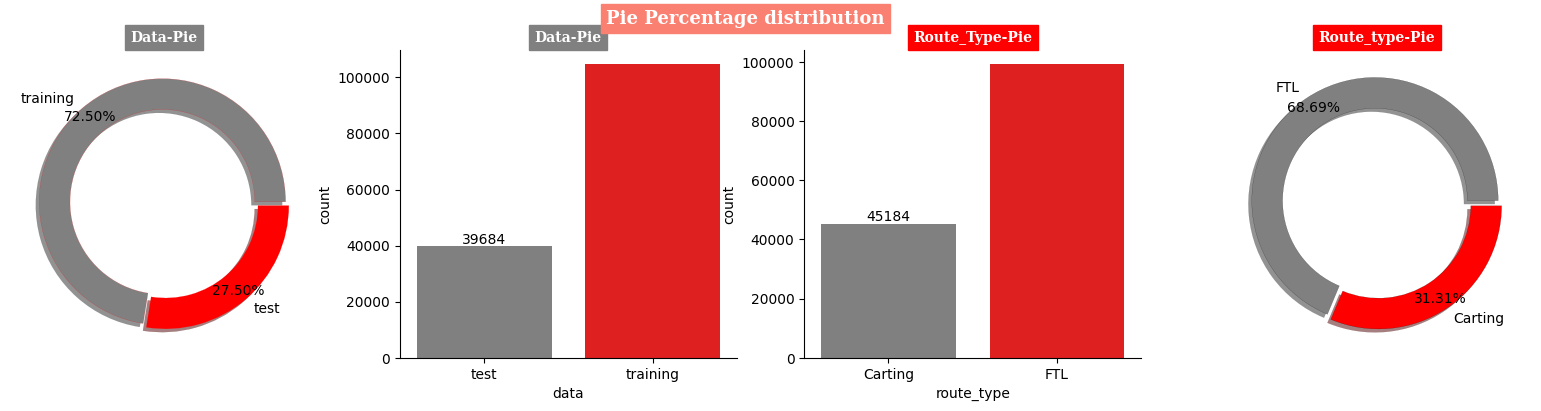

In [ ]:
plt.figure(figsize=(20,4))
plt.suptitle('Pie Percentage distribution',fontsize=13,fontfamily='serif',fontweight='bold',backgroundcolor=cp[-1],color='w')

plt.subplot(141)
plt.pie(df['data'].value_counts(), labels=df['data'].value_counts().index, colors=cp,counterclock=True , explode=(0.02,0.02) , autopct='%.2f%%', pctdistance=0.905,
       textprops={'color':'k','fontsize':10} , shadow=True, radius=1,wedgeprops=dict(edgecolor='r',linewidth=0.1,width=0.25))
plt.title('Data-Pie',fontsize=10,fontfamily='serif',fontweight='bold',backgroundcolor=cp[0],color='w')

plt.subplot(142)
a = sns.barplot(x=df['data'].value_counts().index, y=df['data'].value_counts(), palette=cp)
a.bar_label(a.containers[0], label_type='edge',fmt='%d')
plt.title('Data-Pie',fontsize=10,fontfamily='serif',fontweight='bold',backgroundcolor=cp[0],color='w')

plt.subplot(143)
b = sns.barplot(x=df['route_type'].value_counts().index, y=df['route_type'].value_counts(), palette=cp)
b.bar_label(b.containers[0], label_type='edge',fmt='%d')
plt.title('Route_Type-Pie',fontsize=10,fontfamily='serif',fontweight='bold',backgroundcolor=cp[1],color='w')

plt.subplot(144)
plt.pie(df['route_type'].value_counts(), labels=df['route_type'].value_counts().index, colors=cp,counterclock=True , explode=(0.03,0.02) , autopct='%.2f%%', pctdistance=0.905,
       textprops={'color':'k','fontsize':10} , shadow=True, radius=1,wedgeprops=dict(edgecolor='k',linewidth=0.1,width=0.25))
plt.title('Route_type-Pie',fontsize=10,fontfamily='serif',fontweight='bold',backgroundcolor=cp[1],color='w')

sns.despine()
plt.show()

From above, we can say that our dataset contains 72.38% training data, 27.62% test data.

FTL(Full Truck Load) route-type is preferred when compared to Carting.

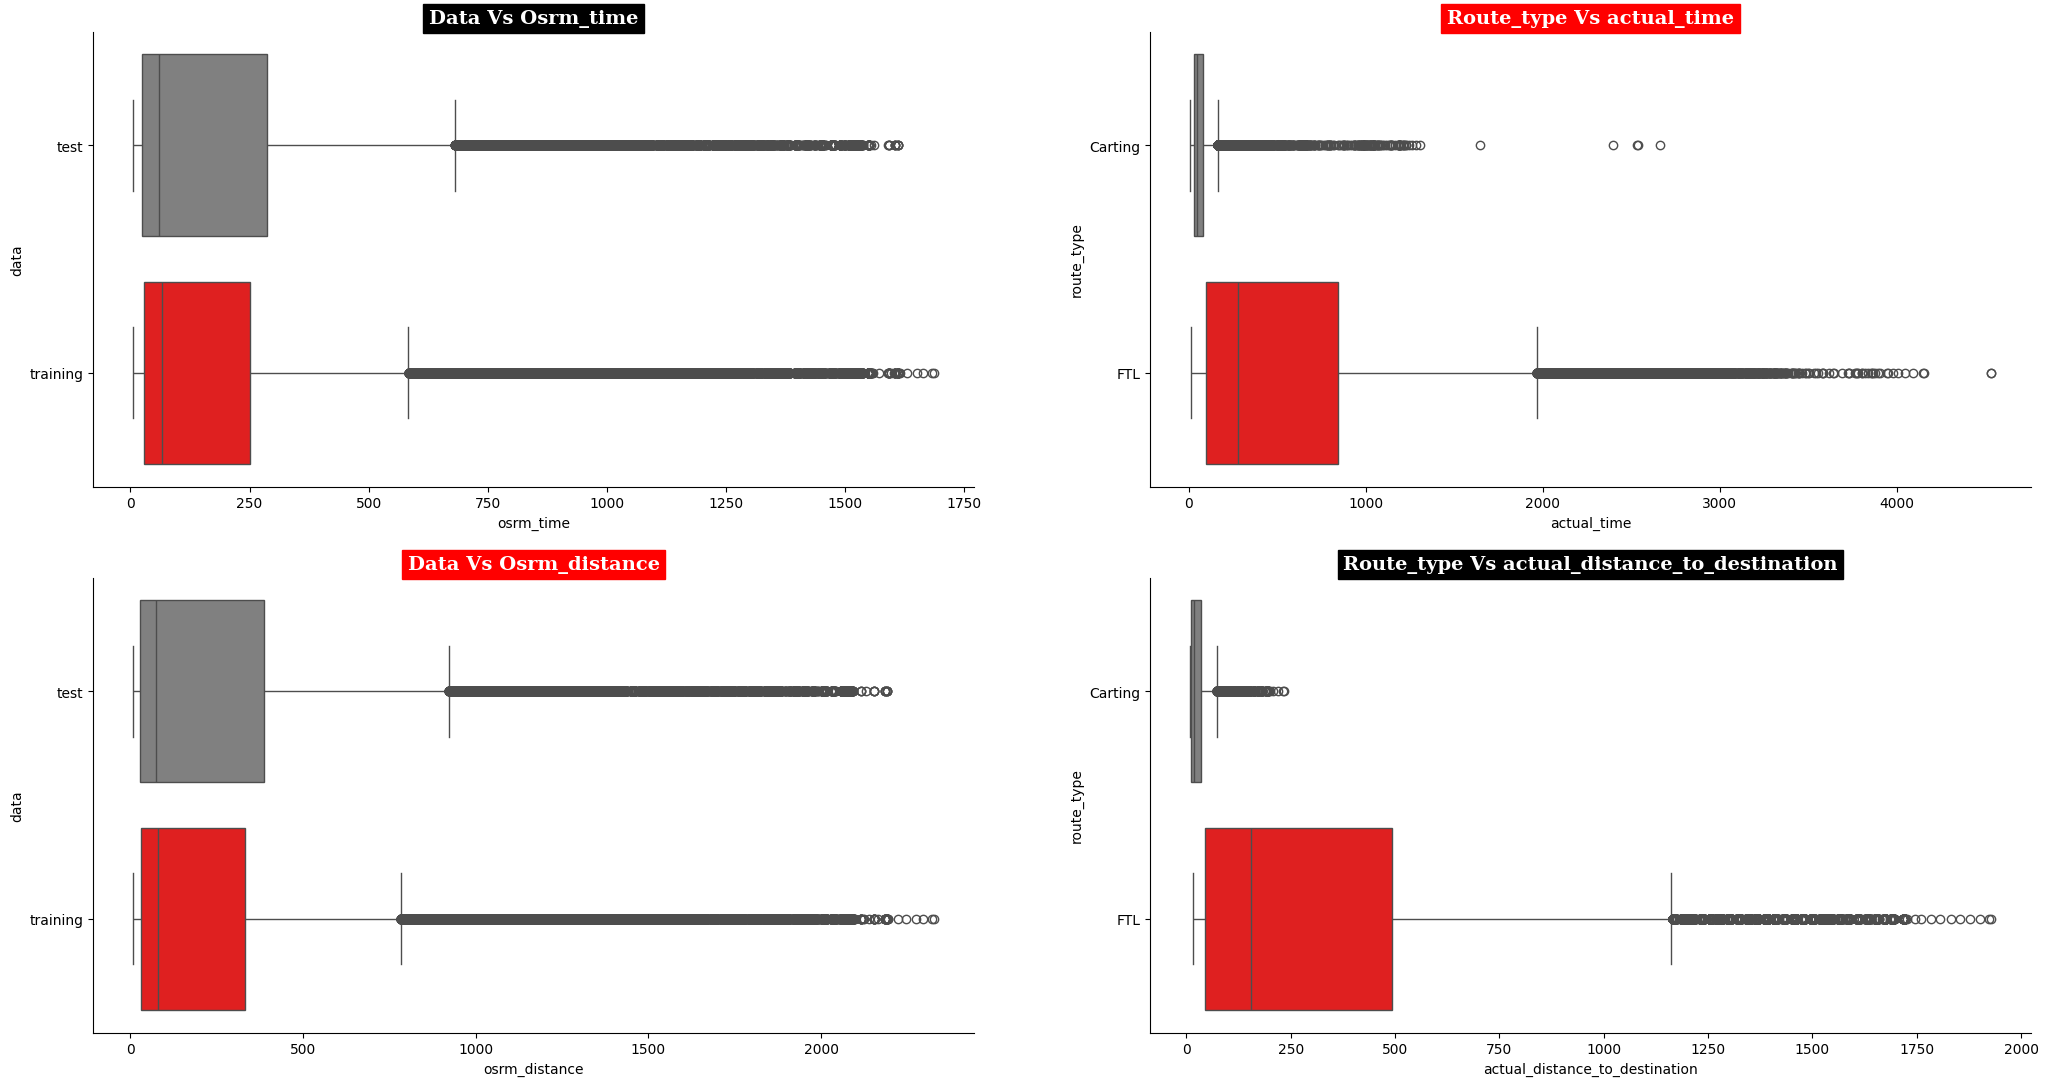

In [ ]:
plt.figure(figsize=(25,13))
plt.style.use('default')

plt.subplot(221)
sns.boxplot(data=df,y='data',x='osrm_time',palette=cp)
plt.title('Data Vs Osrm_time',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='k',color='w')

plt.subplot(222)
sns.boxplot(data=df,y='route_type',x='actual_time',palette=cp)
plt.title('Route_type Vs actual_time',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='r',color='w')

plt.subplot(223)
sns.boxplot(data=df,y='data',x='osrm_distance',palette=cp)
plt.title('Data Vs Osrm_distance',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='r',color='w')

plt.subplot(224)
sns.boxplot(data=df,y='route_type',x='actual_distance_to_destination',palette=cp)
plt.title('Route_type Vs actual_distance_to_destination',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='k',color='w')
sns.despine()
plt.show()

**Observations:**

Both training and test data have the same range of osrm time recorded
FTL route type has more actual time compared to Carting.

This can also be since FTL is used a lot more than carting in the data available to us.

Both training and test data have the same range of osrm distance recorded
FTL route type has more actual distance compared to Carting.

This can also be since FTL is used a lot more than carting in the data available to us

# **Merging of rows and aggregation of fields**

Since delivery details of one package is divided into several rows (think of it as
connecting flights to reach a particular destination).

Now think about...

● How should we treat their fields if we combine these rows?

● What aggregation would make sense if we merge?

● What would happen to the numeric fields if we merge the rows?

1. Grouping by segment

a. Create a unique identifier for different segments of a trip based on the
combination of the trip_uuid, source_center, and destination_center and
name it as segment_key.

b. You can use inbuilt functions like groupby and aggregations like
cumsum() to merge the rows in columns segment_actual_time,
segment_osrm_distance, segment_osrm_time based on the
segment_key.

c. This way you’ll get new columns named segment_actual_time_sum,
segment_osrm_distance_sum, segment_osrm_time_sum.

In [ ]:
# Grouping by segment
# Creating a unique identifier for each segment of a trip

segment_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

df['segment_key'] = df['trip_uuid'] + '+' + df['source_center'] + '+' + df['destination_center']

for col in segment_cols:
    df[col + '_sum'] = df.groupby('segment_key')[col].cumsum()

df[['segment_key', 'segment_actual_time', 'segment_actual_time_sum','segment_osrm_distance', 'segment_osrm_distance_sum','segment_osrm_time', 'segment_osrm_time_sum']]

segment_key  \
0       trip-153741093647649320+IND388121AAA+IND388620AAB   
1       trip-153741093647649320+IND388121AAA+IND388620AAB   
2       trip-153741093647649320+IND388121AAA+IND388620AAB   
3       trip-153741093647649320+IND388121AAA+IND388620AAB   
4       trip-153741093647649320+IND388121AAA+IND388620AAB   
...                                                   ...   
144862  trip-153746066843555182+IND131028AAB+IND000000ACB   
144863  trip-153746066843555182+IND131028AAB+IND000000ACB   
144864  trip-153746066843555182+IND131028AAB+IND000000ACB   
144865  trip-153746066843555182+IND131028AAB+IND000000ACB   
144866  trip-153746066843555182+IND131028AAB+IND000000ACB   

        segment_actual_time  segment_actual_time_sum  segment_osrm_distance  \
0                      14.0                     14.0                11.9653   
1                      10.0                     24.0                 9.7590   
2                      16.0                     40.0                10.8152   
3                      21.0                     61.0                13.0224   
4                       6.0                     67.0                 3.9153   
...                     ...                      ...                    ...   
144862                 12.0                     92.0                 8.1858   
144863                 26.0                    118.0                17.3725   
144864                 20.0                    138.0                20.7053   
144865                 17.0                    155.0                18.8885   
144866                268.0                    423.0                 8.8088   

        segment_osrm_distance_sum  segment_osrm_time  segment_osrm_time_sum  
0                         11.9653               11.0                   11.0  
1                         21.7243                9.0                   20.0  
2                         32.5395                7.0                   27.0  
3                         45.5619               12.0                   39.0  
4                         49.4772                5.0                   44.0  
...                           ...                ...                    ...  
144862                    65.3487               12.0                   94.0  
144863                    82.7212               21.0                  115.0  
144864                   103.4265               34.0                  149.0  
144865                   122.3150               27.0                  176.0  
144866                   131.1238                9.0                  185.0  

[144316 rows x 7 columns]

2. Aggregating at segment level

a. Create a dictionary named create_segment_dict, that defines how to
aggregate and select values.

i. You can keep the first and last values for some
numeric/categorical fields if aggregating them won’t make sense.

b. Further group the data by segment_key because you want to perform
aggregation operations for different segments of each trip based on the
segment_key value.

c. The aggregation functions specified in the create_segment_dict are
applied to each group of rows with the same segment_key.

d. Sort the resulting DataFrame segment, by two criteria:

i. First, it sorts by segment_key to ensure that segments are
ordered consistently.

ii. Second, it sorts by od_end_time in ascending order, ensuring that
segments within the same trip are ordered by their end times
from earliest to latest.

In [ ]:
# Aggregating at segment level & Creating a dictionary for aggregation at segment level

segment_dict = {
  'trip_uuid' : 'first',
  'data': 'first',
  'route_type': 'first',
  'trip_creation_time': 'first',
  'source_name': 'first',
  'destination_name': 'last',
  'od_start_time': 'first',
  'od_end_time': 'last',
  'start_scan_to_end_scan': 'first',
  'actual_distance_to_destination': 'last',
  'actual_time': 'last',
  'osrm_time': 'last',
  'osrm_distance': 'last',
  'segment_actual_time' : 'sum',
  'segment_osrm_time' : 'sum',
  'segment_osrm_distance' : 'sum',
  'segment_actual_time_sum': 'last',
  'segment_osrm_time_sum': 'last',
  'segment_osrm_distance_sum': 'last',
}

# Grouping by segment_key and aggregating
segment_agg_data = df.groupby('segment_key').agg(segment_dict).reset_index()
segment_agg_data = segment_agg_data.sort_values(by=['segment_key','od_end_time'])
segment_agg_data

segment_key  \
0      trip-153671041653548748+IND209304AAA+IND000000ACB   
1      trip-153671041653548748+IND462022AAA+IND209304AAA   
2      trip-153671042288605164+IND561203AAB+IND562101AAA   
3      trip-153671042288605164+IND572101AAA+IND561203AAB   
4      trip-153671043369099517+IND000000ACB+IND160002AAC   
...                                                  ...   
26217  trip-153861115439069069+IND628204AAA+IND627657AAA   
26218  trip-153861115439069069+IND628613AAA+IND627005AAA   
26219  trip-153861115439069069+IND628801AAA+IND628204AAA   
26220  trip-153861118270144424+IND583119AAA+IND583101AAA   
26221  trip-153861118270144424+IND583201AAA+IND583119AAA   

                     trip_uuid      data route_type  \
0      trip-153671041653548748  training        FTL   
1      trip-153671041653548748  training        FTL   
2      trip-153671042288605164  training    Carting   
3      trip-153671042288605164  training    Carting   
4      trip-153671043369099517  training        FTL   
...                        ...       ...        ...   
26217  trip-153861115439069069      test    Carting   
26218  trip-153861115439069069      test    Carting   
26219  trip-153861115439069069      test    Carting   
26220  trip-153861118270144424      test        FTL   
26221  trip-153861118270144424      test        FTL   

              trip_creation_time                         source_name  \
0     2018-09-12 00:00:16.535741  Kanpur_Central_H_6 (Uttar Pradesh)   
1     2018-09-12 00:00:16.535741  Bhopal_Trnsport_H (Madhya Pradesh)   
2     2018-09-12 00:00:22.886430   Doddablpur_ChikaDPP_D (Karnataka)   
3     2018-09-12 00:00:22.886430       Tumkur_Veersagr_I (Karnataka)   
4     2018-09-12 00:00:33.691250       Gurgaon_Bilaspur_HB (Haryana)   
...                          ...                                 ...   
26217 2018-10-03 23:59:14.390954  Tirchchndr_Shnmgprm_D (Tamil Nadu)   
26218 2018-10-03 23:59:14.390954   Peikulam_SriVnktpm_D (Tamil Nadu)   
26219 2018-10-03 23:59:14.390954        Eral_Busstand_D (Tamil Nadu)   
26220 2018-10-03 23:59:42.701692       Sandur_WrdN1DPP_D (Karnataka)   
26221 2018-10-03 23:59:42.701692                  Hospet (Karnataka)   

                            destination_name              od_start_time  \
0              Gurgaon_Bilaspur_HB (Haryana) 2018-09-12 16:39:46.858469   
1         Kanpur_Central_H_6 (Uttar Pradesh) 2018-09-12 00:00:16.535741   
2          Chikblapur_ShntiSgr_D (Karnataka) 2018-09-12 02:03:09.655591   
3          Doddablpur_ChikaDPP_D (Karnataka) 2018-09-12 00:00:22.886430   
4             Chandigarh_Mehmdpur_H (Punjab) 2018-09-14 03:40:17.106733   
...                                      ...                        ...   
26217  Thisayanvilai_UdnkdiRD_D (Tamil Nadu) 2018-10-04 02:29:04.272194   
26218    Tirunelveli_VdkkuSrt_I (Tamil Nadu) 2018-10-04 04:16:39.894872   
26219     Tirchchndr_Shnmgprm_D (Tamil Nadu) 2018-10-04 01:44:53.808000   
26220                 Bellary_Dc (Karnataka) 2018-10-04 03:58:40.726547   
26221          Sandur_WrdN1DPP_D (Karnataka) 2018-10-04 02:51:44.712656   

                     od_end_time  start_scan_to_end_scan  \
0     2018-09-13 13:40:23.123744                  1260.0   
1     2018-09-12 16:39:46.858469                   999.0   
2     2018-09-12 03:01:59.598855                    58.0   
3     2018-09-12 02:03:09.655591                   122.0   
4     2018-09-14 17:34:55.442454                   834.0   
...                          ...                     ...   
26217 2018-10-04 03:31:11.183797                    62.0   
26218 2018-10-04 05:47:45.162682                    91.0   
26219 2018-10-04 02:29:04.272194                    44.0   
26220 2018-10-04 08:46:09.166940                   287.0   
26221 2018-10-04 03:58:40.726547                    66.0   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                          383.759164        732.0      329.0       446.5496   
1               

The rows have been merged based on the unique segment_key, which is a combination of trip_uuid, source_center, and destination_center.

The aggregated dataset reflects the total values for each segment of the trip.

# **Feature Engineering**

Extract features from the below fields:

1. Calculate time taken between od_start_time and od_end_time and keep it as a
feature named od_time_diff_hour. Drop the original columns, if required.

2. Destination Name: Split and extract features out of destination. City-place-code
(State)

3. Source Name: Split and extract features out of destination. City-place-code
(State)

4. Trip_creation_time: Extract features like month, year, day, etc.

In [ ]:
# 1. Calculating time difference between od_start_time and od_end_time
segment_agg_data['od_total_time']=(segment_agg_data['od_end_time'] - segment_agg_data['od_start_time'])
segment_agg_data['od_time_diff_hour'] = (segment_agg_data['od_total_time']).dt.total_seconds()/3600
segment_agg_data

segment_key  \
0      trip-153671041653548748+IND209304AAA+IND000000ACB   
1      trip-153671041653548748+IND462022AAA+IND209304AAA   
2      trip-153671042288605164+IND561203AAB+IND562101AAA   
3      trip-153671042288605164+IND572101AAA+IND561203AAB   
4      trip-153671043369099517+IND000000ACB+IND160002AAC   
...                                                  ...   
26217  trip-153861115439069069+IND628204AAA+IND627657AAA   
26218  trip-153861115439069069+IND628613AAA+IND627005AAA   
26219  trip-153861115439069069+IND628801AAA+IND628204AAA   
26220  trip-153861118270144424+IND583119AAA+IND583101AAA   
26221  trip-153861118270144424+IND583201AAA+IND583119AAA   

                     trip_uuid      data route_type  \
0      trip-153671041653548748  training        FTL   
1      trip-153671041653548748  training        FTL   
2      trip-153671042288605164  training    Carting   
3      trip-153671042288605164  training    Carting   
4      trip-153671043369099517  training        FTL   
...                        ...       ...        ...   
26217  trip-153861115439069069      test    Carting   
26218  trip-153861115439069069      test    Carting   
26219  trip-153861115439069069      test    Carting   
26220  trip-153861118270144424      test        FTL   
26221  trip-153861118270144424      test        FTL   

              trip_creation_time                         source_name  \
0     2018-09-12 00:00:16.535741  Kanpur_Central_H_6 (Uttar Pradesh)   
1     2018-09-12 00:00:16.535741  Bhopal_Trnsport_H (Madhya Pradesh)   
2     2018-09-12 00:00:22.886430   Doddablpur_ChikaDPP_D (Karnataka)   
3     2018-09-12 00:00:22.886430       Tumkur_Veersagr_I (Karnataka)   
4     2018-09-12 00:00:33.691250       Gurgaon_Bilaspur_HB (Haryana)   
...                          ...                                 ...   
26217 2018-10-03 23:59:14.390954  Tirchchndr_Shnmgprm_D (Tamil Nadu)   
26218 2018-10-03 23:59:14.390954   Peikulam_SriVnktpm_D (Tamil Nadu)   
26219 2018-10-03 23:59:14.390954        Eral_Busstand_D (Tamil Nadu)   
26220 2018-10-03 23:59:42.701692       Sandur_WrdN1DPP_D (Karnataka)   
26221 2018-10-03 23:59:42.701692                  Hospet (Karnataka)   

                            destination_name              od_start_time  \
0              Gurgaon_Bilaspur_HB (Haryana) 2018-09-12 16:39:46.858469   
1         Kanpur_Central_H_6 (Uttar Pradesh) 2018-09-12 00:00:16.535741   
2          Chikblapur_ShntiSgr_D (Karnataka) 2018-09-12 02:03:09.655591   
3          Doddablpur_ChikaDPP_D (Karnataka) 2018-09-12 00:00:22.886430   
4             Chandigarh_Mehmdpur_H (Punjab) 2018-09-14 03:40:17.106733   
...                                      ...                        ...   
26217  Thisayanvilai_UdnkdiRD_D (Tamil Nadu) 2018-10-04 02:29:04.272194   
26218    Tirunelveli_VdkkuSrt_I (Tamil Nadu) 2018-10-04 04:16:39.894872   
26219     Tirchchndr_Shnmgprm_D (Tamil Nadu) 2018-10-04 01:44:53.808000   
26220                 Bellary_Dc (Karnataka) 2018-10-04 03:58:40.726547   
26221          Sandur_WrdN1DPP_D (Karnataka) 2018-10-04 02:51:44.712656   

                     od_end_time  start_scan_to_end_scan  ...  osrm_time  \
0     2018-09-13 13:40:23.123744                  1260.0  ...      329.0   
1     2018-09-12 16:39:46.858469                   999.0  ...      388.0   
2     2018-09-12 03:01:59.598855                    58.0  ...       26.0   
3     2018-09-12 02:03:09.655591                   122.0  ...       42.0   
4     2018-09-14 17:34:55.442454                   834.0  ...      212.0   
...                          ...                     ...  ...        ...   
26217 2018-10-04 03:31:11.183797                    62.0  ...       41.0   
26218 2018-10-04 05:47:45.162682                    91.0  ...       48.0   
26219 2018-10-04 02:29:04.272194                    44.0  ...       14.0   
26220 2018-10-04 08:46:09.166940                   287.0  ...       42.0   
26221 2018-10-04 03:58:40.726547                    66.0  ...

In [ ]:
de = segment_agg_data.copy()

In [ ]:
# using regex pattern to seperate the city,place,state
def extract_info(name):
    pattern = r'^(?P<city>[^\s_]+)_?(?P<place>[^\(\)]*)\s?\((?P<state>[A-Za-z\s&]+)\)$'
    match = re.match(pattern, name)
    if match:
        city = match.group('city').strip()
        place = match.group('place').strip() if match.group('place') else city
        state = match.group('state').strip()
        return city, place, state
    else:
        return None, None, None

In [ ]:
de[['source_city', 'source_place', 'source_state']] = de['source_name'].apply(lambda x: pd.Series(extract_info(x)))
de[['destination_city', 'destination_place', 'destination_state']] = de['destination_name'].apply(lambda x: pd.Series(extract_info(x)))
de

segment_key  \
0      trip-153671041653548748+IND209304AAA+IND000000ACB   
1      trip-153671041653548748+IND462022AAA+IND209304AAA   
2      trip-153671042288605164+IND561203AAB+IND562101AAA   
3      trip-153671042288605164+IND572101AAA+IND561203AAB   
4      trip-153671043369099517+IND000000ACB+IND160002AAC   
...                                                  ...   
26217  trip-153861115439069069+IND628204AAA+IND627657AAA   
26218  trip-153861115439069069+IND628613AAA+IND627005AAA   
26219  trip-153861115439069069+IND628801AAA+IND628204AAA   
26220  trip-153861118270144424+IND583119AAA+IND583101AAA   
26221  trip-153861118270144424+IND583201AAA+IND583119AAA   

                     trip_uuid      data route_type  \
0      trip-153671041653548748  training        FTL   
1      trip-153671041653548748  training        FTL   
2      trip-153671042288605164  training    Carting   
3      trip-153671042288605164  training    Carting   
4      trip-153671043369099517  training        FTL   
...                        ...       ...        ...   
26217  trip-153861115439069069      test    Carting   
26218  trip-153861115439069069      test    Carting   
26219  trip-153861115439069069      test    Carting   
26220  trip-153861118270144424      test        FTL   
26221  trip-153861118270144424      test        FTL   

              trip_creation_time                         source_name  \
0     2018-09-12 00:00:16.535741  Kanpur_Central_H_6 (Uttar Pradesh)   
1     2018-09-12 00:00:16.535741  Bhopal_Trnsport_H (Madhya Pradesh)   
2     2018-09-12 00:00:22.886430   Doddablpur_ChikaDPP_D (Karnataka)   
3     2018-09-12 00:00:22.886430       Tumkur_Veersagr_I (Karnataka)   
4     2018-09-12 00:00:33.691250       Gurgaon_Bilaspur_HB (Haryana)   
...                          ...                                 ...   
26217 2018-10-03 23:59:14.390954  Tirchchndr_Shnmgprm_D (Tamil Nadu)   
26218 2018-10-03 23:59:14.390954   Peikulam_SriVnktpm_D (Tamil Nadu)   
26219 2018-10-03 23:59:14.390954        Eral_Busstand_D (Tamil Nadu)   
26220 2018-10-03 23:59:42.701692       Sandur_WrdN1DPP_D (Karnataka)   
26221 2018-10-03 23:59:42.701692                  Hospet (Karnataka)   

                            destination_name              od_start_time  \
0              Gurgaon_Bilaspur_HB (Haryana) 2018-09-12 16:39:46.858469   
1         Kanpur_Central_H_6 (Uttar Pradesh) 2018-09-12 00:00:16.535741   
2          Chikblapur_ShntiSgr_D (Karnataka) 2018-09-12 02:03:09.655591   
3          Doddablpur_ChikaDPP_D (Karnataka) 2018-09-12 00:00:22.886430   
4             Chandigarh_Mehmdpur_H (Punjab) 2018-09-14 03:40:17.106733   
...                                      ...                        ...   
26217  Thisayanvilai_UdnkdiRD_D (Tamil Nadu) 2018-10-04 02:29:04.272194   
26218    Tirunelveli_VdkkuSrt_I (Tamil Nadu) 2018-10-04 04:16:39.894872   
26219     Tirchchndr_Shnmgprm_D (Tamil Nadu) 2018-10-04 01:44:53.808000   
26220                 Bellary_Dc (Karnataka) 2018-10-04 03:58:40.726547   
26221          Sandur_WrdN1DPP_D (Karnataka) 2018-10-04 02:51:44.712656   

                     od_end_time  start_scan_to_end_scan  ...  \
0     2018-09-13 13:40:23.123744                  1260.0  ...   
1     2018-09-12 16:39:46.858469                   999.0  ...   
2     2018-09-12 03:01:59.598855                    58.0  ...   
3     2018-09-12 02:03:09.655591                   122.0  ...   
4     2018-09-14 17:34:55.442454                   834.0  ...   
...                          ...                     ...  ...   
26217 2018-10-04 03:31:11.183797                    62.0  ...   
26218 2018-10-04 05:47:45.162682                    91.0  ...   
26219 2018-10-04 02:29:04.272194                    44.0  ...   
26220 2018-10-04 08:46:09.166940                   287.0  ...   
26221 2018-10-04 03:58:40.726547                    66.0  ...   

       segment_osrm_time_sum  segment_osrm_distance_sum  \
0                      534.0                   670.6205  

In [ ]:
de[(de['source_place']=='') | (de['destination_place']=='')]

segment_key  \
7      trip-153671052974046625+IND583101AAA+IND583201AAA   
9      trip-153671052974046625+IND583201AAA+IND583119AAA   
19     trip-153671110078355292+IND121004AAB+IND121001AAA   
33     trip-153671173668736946+IND110043AAA+IND110078AAA   
80     trip-153671320807895983+IND121004AAB+IND121102AAA   
...                                                  ...   
26118  trip-153860849934816308+IND110078AAA+IND110043AAA   
26153  trip-153860958923357924+IND842003AAB+IND482002AAA   
26180  trip-153861007249500192+IND842001AAA+IND846004AAA   
26181  trip-153861007249500192+IND846004AAA+IND847103AAA   
26221  trip-153861118270144424+IND583201AAA+IND583119AAA   

                     trip_uuid      data route_type  \
7      trip-153671052974046625  training        FTL   
9      trip-153671052974046625  training        FTL   
19     trip-153671110078355292  training    Carting   
33     trip-153671173668736946  training    Carting   
80     trip-153671320807895983  training    Carting   
...                        ...       ...        ...   
26118  trip-153860849934816308      test    Carting   
26153  trip-153860958923357924      test    Carting   
26180  trip-153861007249500192      test        FTL   
26181  trip-153861007249500192      test        FTL   
26221  trip-153861118270144424      test        FTL   

              trip_creation_time                            source_name  \
7     2018-09-12 00:02:09.740725                 Bellary_Dc (Karnataka)   
9     2018-09-12 00:02:09.740725                     Hospet (Karnataka)   
19    2018-09-12 00:11:40.783923           FBD_Balabhgarh_DPC (Haryana)   
33    2018-09-12 00:22:16.687619                Delhi_Nangli_IP (Delhi)   
80    2018-09-12 00:46:48.079257           FBD_Balabhgarh_DPC (Haryana)   
...                          ...                                    ...   
26118 2018-10-03 23:14:59.348414                      Janakpuri (Delhi)   
26153 2018-10-03 23:33:09.233829  Jabalpur_Adhartal_IP (Madhya Pradesh)   
26180 2018-10-03 23:41:12.495257            Muzaffrpur_Bbganj_I (Bihar)   
26181 2018-10-03 23:41:12.495257                      Darbhanga (Bihar)   
26221 2018-10-03 23:59:42.701692                     Hospet (Karnataka)   

                    destination_name              od_start_time  \
7                 Hospet (Karnataka) 2018-09-12 00:02:09.740725   
9      Sandur_WrdN1DPP_D (Karnataka) 2018-09-12 02:34:10.515593   
19               Faridabad (Haryana) 2018-09-12 00:11:40.783923   
33                 Janakpuri (Delhi) 2018-09-12 00:22:16.687619   
80                  Palwal (Haryana) 2018-09-12 00:46:48.079257   
...                              ...                        ...   
26118        Delhi_Nangli_IP (Delhi) 2018-10-04 01:32:14.530264   
26153      Jabalpur (Madhya Pradesh) 2018-10-03 23:33:09.233829   
26180              Darbhanga (Bihar) 2018-10-03 23:41:12.495257   
26181      Benipur_Javahar_D (Bihar) 2018-10-04 02:17:56.235080   
26221  Sandur_WrdN1DPP_D (Karnataka) 2018-10-04 02:51:44.712656   

                     od_end_time  start_scan_to_end_scan  ...  \
7     2018-09-12 02:34:10.515593                   152.0  ...   
9     2018-09-12 03:54:43.114421                    80.0  ...   
19    2018-09-12 00:50:10.814399                    38.0  ...   
33    2018-09-12 01:29:19.277412                    67.0  ...   
80    2018-09-12 01:53:32.471405                    66.0  ...   
...                          ...                     ...  ...   
26118 2018-10-04 03:05:32.479193                    93.0  ...   
26153 2018-10-04 07:48:23.711056                   495.0  ...   
26180 2018-10-04 02:17:56.235080                   156.0  ...   
26181 2018-10-04 04:20:42.531207                   122.0  ...   
26221 2018-10-04 03:58:40.726547                    66.0  ...   

       segment_osrm_time_sum  segment_osrm_distance_sum  \
7                       45.0                    63.6461   
9                       26.0                    29.5697   

In [ ]:
de.loc[de['source_place']=='','source_place']=de['source_city']
de.loc[de['destination_place']=='','destination_place']=de['destination_city']

In [ ]:
de.isna().sum()

segment_key                       0
trip_uuid                         0
data                              0
route_type                        0
trip_creation_time                0
source_name                       0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_actual_time_sum           0
segment_osrm_time_sum             0
segment_osrm_distance_sum         0
od_total_time                     0
od_time_diff_hour                 0
source_city                       0
source_place                      0
source_state                      0
destination_city                  0
destination_place                 0
destination_state                 0
dtype: int64

In [ ]:
de.loc[de.source_city=='Bangalore','source_city']='Bengaluru'
de.loc[de.destination_city=='Bangalore','destination_city']='Bengaluru'

In [ ]:
de['source_state'].unique()

array(['Uttar Pradesh', 'Madhya Pradesh', 'Karnataka', 'Haryana',
       'Maharashtra', 'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana',
       'Andhra Pradesh', 'Rajasthan', 'Assam', 'West Bengal', 'Punjab',
       'Chandigarh', 'Goa', 'Uttarakhand', 'Jharkhand', 'Pondicherry',
       'Orissa', 'Himachal Pradesh', 'Kerala', 'Arunachal Pradesh',
       'Bihar', 'Meghalaya', 'Chhattisgarh', 'Jammu & Kashmir',
       'Dadra and Nagar Haveli', 'Mizoram', 'Tripura', 'Nagaland'],
      dtype=object)

In [ ]:
de['source_state'].value_counts()

source_state
Maharashtra               3565
Karnataka                 3445
Tamil Nadu                2130
Haryana                   2039
Uttar Pradesh             1818
Telangana                 1474
Gujarat                   1401
West Bengal               1368
Andhra Pradesh            1310
Rajasthan                 1162
Punjab                    1052
Bihar                     1048
Delhi                      818
Kerala                     762
Madhya Pradesh             740
Assam                      484
Uttarakhand                369
Jharkhand                  301
Orissa                     248
Himachal Pradesh           223
Chandigarh                 160
Goa                         86
Chhattisgarh                52
Arunachal Pradesh           48
Jammu & Kashmir             47
Pondicherry                 30
Dadra and Nagar Haveli      15
Meghalaya                   13
Mizoram                      8
Nagaland                     5
Tripura                      1
Name: count, dtype: int64

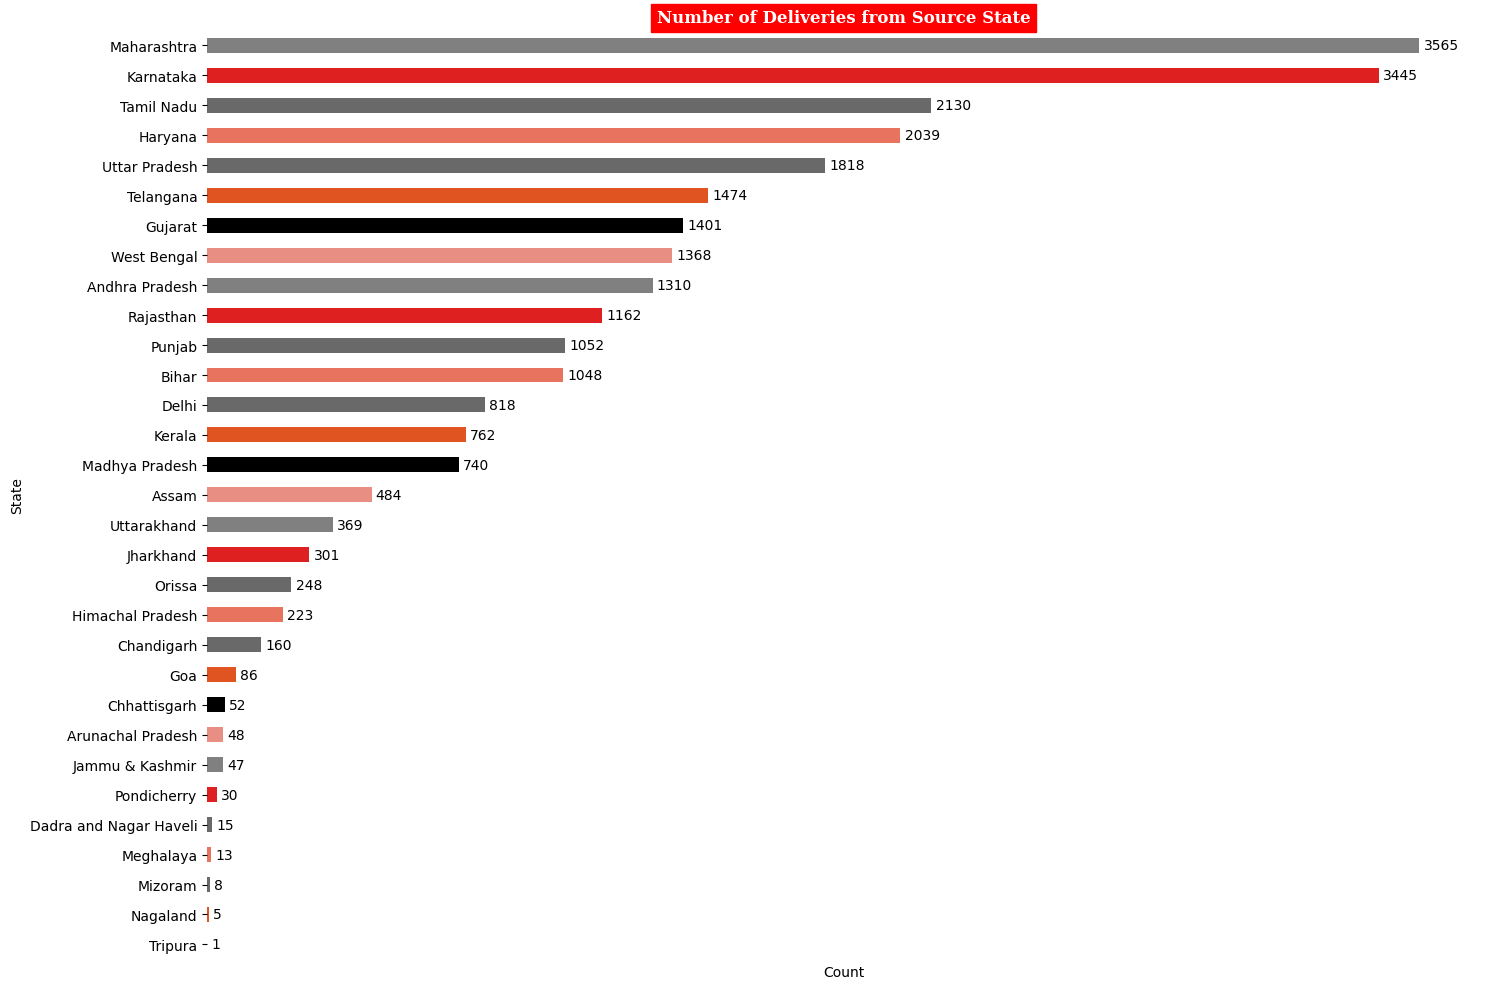

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame of state counts
state_counts = de['source_state'].value_counts().to_frame().reset_index()
state_counts.columns = ['State', 'Count']

# Plot setup
plt.figure(figsize=(15,10))
a = sns.barplot(y='State', x='Count', data=state_counts, palette=cp, width=0.5)

# Add labels to each bar
for container in a.containers:
    a.bar_label(container, label_type='edge', padding=3, fontsize=10)

# Styling
plt.xticks([])
plt.ylabel('State')
plt.xlabel('Count')
plt.title('Number of Deliveries from Source State',
          fontsize=12, fontfamily='serif', fontweight='bold',
          backgroundcolor='red', color='white')

plt.tight_layout()
sns.despine(bottom=True, left=True)
plt.show()

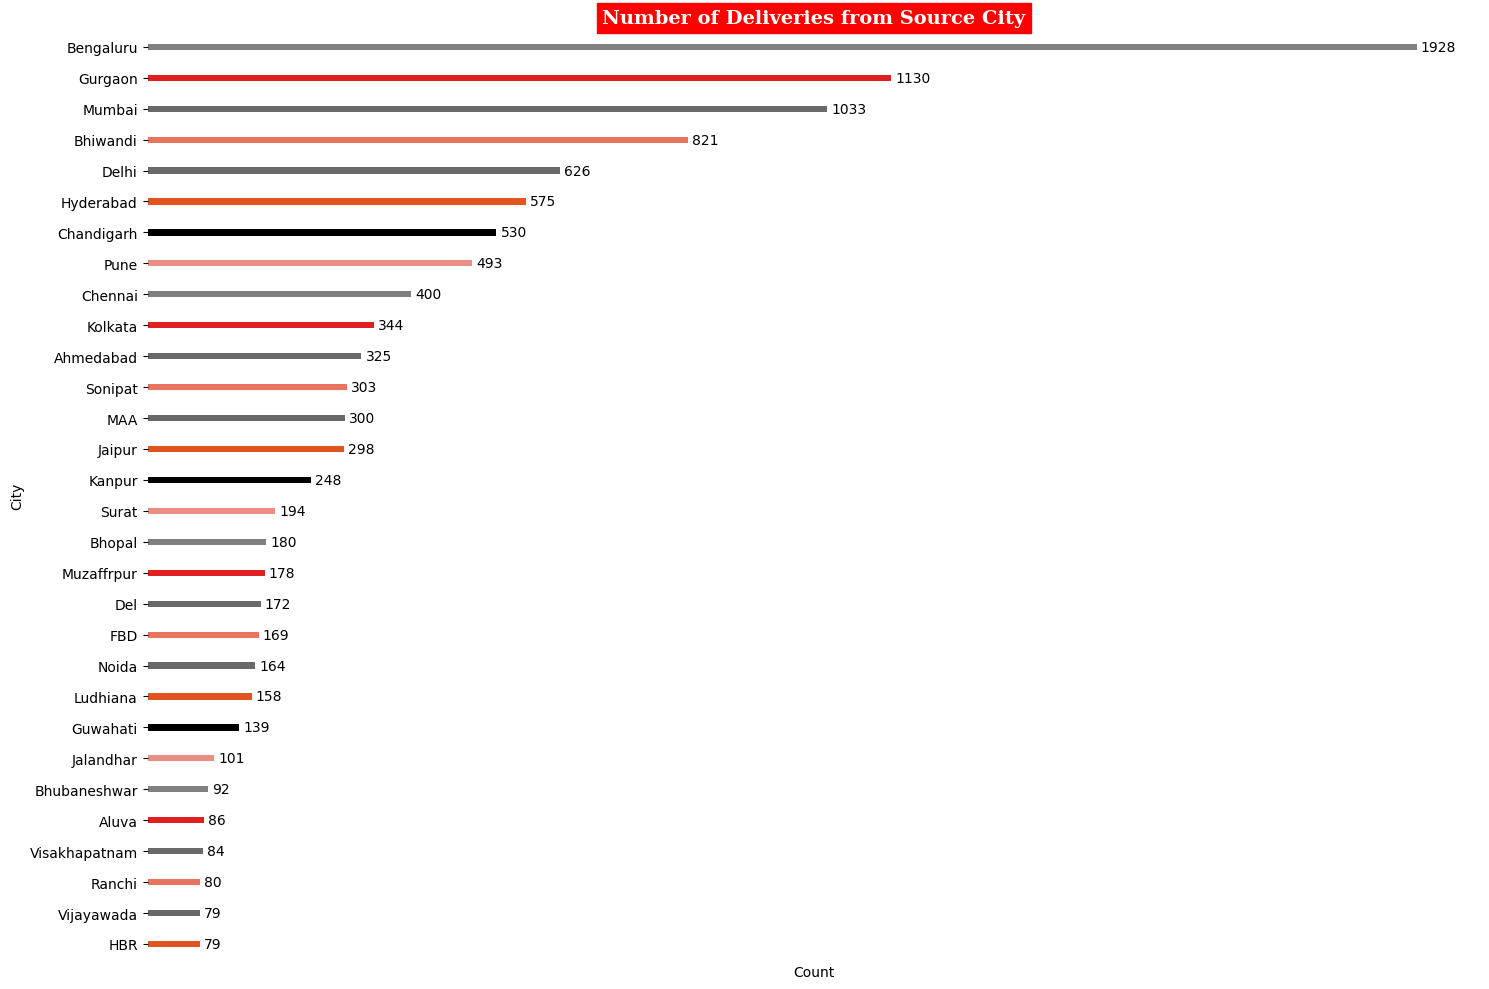

In [ ]:
city_counts = de['source_city'].value_counts().to_frame().reset_index()[:30]
city_counts.columns = ['City', 'Count']

plt.figure(figsize=(15,10))
a = sns.barplot(y='City', x='Count', data=city_counts,palette=cp,width=0.2)
for container in a.containers:
    a.bar_label(container, label_type='edge', padding=3, fontsize=10)
plt.xticks([])
plt.ylabel('City')
plt.xlabel('Count')
plt.title('Number of Deliveries from Source City',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='r',color='w')
plt.tight_layout()
sns.despine(bottom=True,left=True)
plt.show()

**Source State contributors**

Maharashtra, Karnataka ,Tamil Nadu, Haryana, and Uttar Pradesh are the top contributors where maximum bookings are recorded in this month indicating significant engagement.

**Source City contributors**

Cities like Bengaluru, Gurgaon, Mumbai, Bhiwandi, Delhi, Hyderabad where the major no.of booking are recorded.

In [ ]:
de['destination_state'].unique()

array(['Haryana', 'Uttar Pradesh', 'Karnataka', 'Punjab', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Andhra Pradesh', 'Telangana',
       'Rajasthan', 'Madhya Pradesh', 'Assam', 'West Bengal',
       'Chandigarh', 'Dadra and Nagar Haveli', 'Orissa', 'Uttarakhand',
       'Bihar', 'Jharkhand', 'Pondicherry', 'Goa', 'Himachal Pradesh',
       'Kerala', 'Arunachal Pradesh', 'Mizoram', 'Chhattisgarh',
       'Jammu & Kashmir', 'Meghalaya', 'Nagaland', 'Tripura',
       'Daman & Diu'], dtype=object)

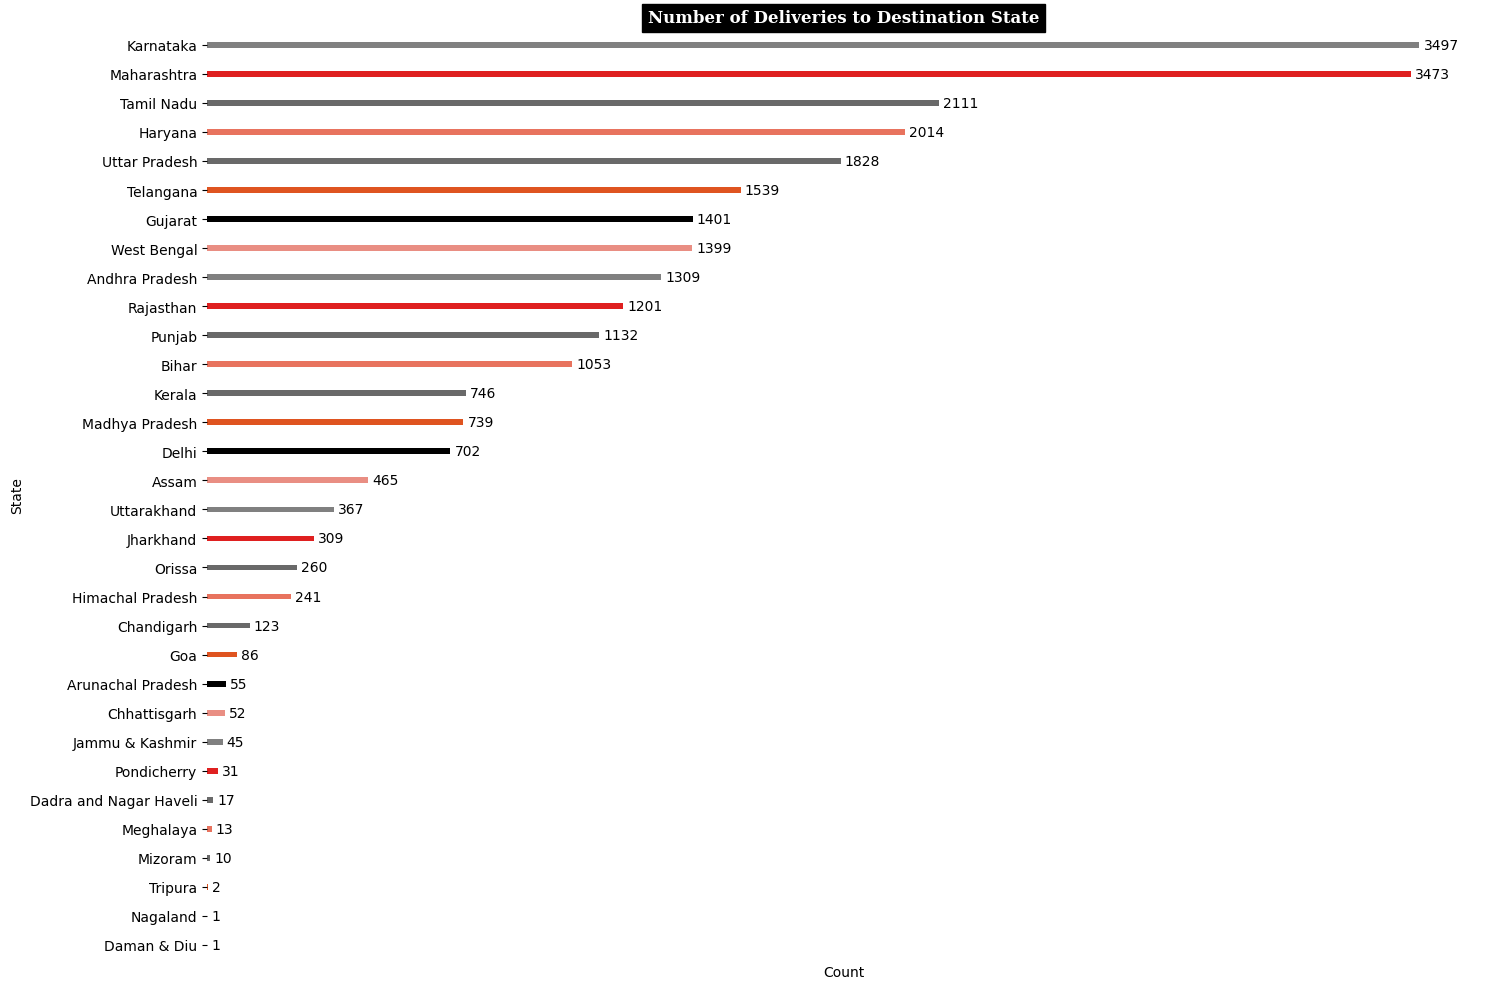

In [ ]:
state_counts = de['destination_state'].value_counts().to_frame().reset_index()
state_counts.columns = ['State', 'Count']

plt.figure(figsize=(15,10))
a = sns.barplot(y='State', x='Count', data=state_counts,palette=cp,width=0.2)
for container in a.containers:
    a.bar_label(container, label_type='edge', padding=3, fontsize=10)
plt.xticks([])
plt.ylabel('State')
plt.xlabel('Count')
plt.title('Number of Deliveries to Destination State',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='k',color='w')
plt.tight_layout()
sns.despine(bottom=True,left=True)
plt.show()

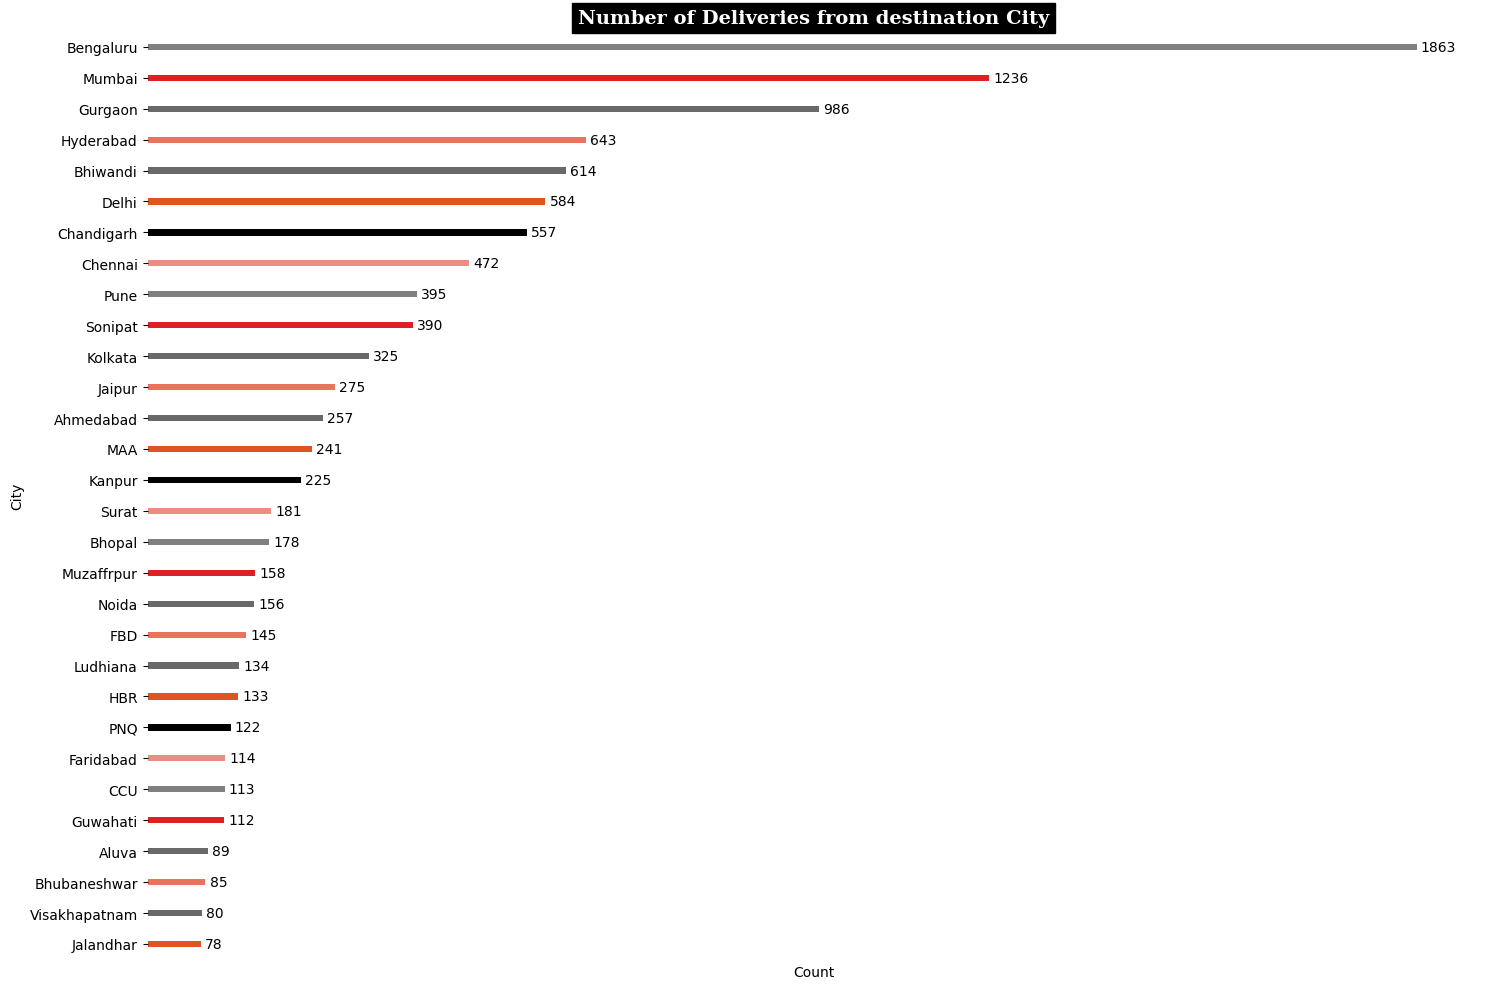

In [ ]:
city_counts = de['destination_city'].value_counts().to_frame().reset_index()[:30]
city_counts.columns = ['City', 'Count']

plt.figure(figsize=(15,10))
a = sns.barplot(y='City', x='Count', data=city_counts,palette=cp,width=0.2)
for container in a.containers:
    a.bar_label(container, label_type='edge', padding=3, fontsize=10)
plt.xticks([])
plt.ylabel('City')
plt.xlabel('Count')
plt.title('Number of Deliveries from destination City',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='k',color='w')
plt.tight_layout()
sns.despine(bottom=True,left=True)
plt.show()

**Destination State**

States like Karnataka, Maharashtra, Tamil Nadu, Haryana, and Uttar Pradesh where maximum packages are received in this month indicating significant engagement.

**Destination City**

Cities like Bengaluru, Mumbai, Gurgaon, Bhiwandi, Hyderabad, Delhi where the major no.of booking are received.

In [ ]:
np.set_printoptions(threshold=np.inf)
de['corridor'] = de['source_name'] +' <---> '+ de['destination_name']
de['corridor'].value_counts()

corridor
Bangalore_Nelmngla_H (Karnataka) <---> Bengaluru_KGAirprt_HB (Karnataka)     151
Bangalore_Nelmngla_H (Karnataka) <---> Bengaluru_Bomsndra_HB (Karnataka)     127
Bengaluru_Bomsndra_HB (Karnataka) <---> Bengaluru_KGAirprt_HB (Karnataka)    121
Bengaluru_KGAirprt_HB (Karnataka) <---> Bangalore_Nelmngla_H (Karnataka)     108
Pune_Tathawde_H (Maharashtra) <---> Bhiwandi_Mankoli_HB (Maharashtra)        107
                                                                            ... 
Naraingarh_Ward2DPP_D (Haryana) <---> Chandigarh_Mehmdpur_H (Punjab)           1
Berhampore_Central_I_2 (West Bengal) <---> Nowda_ArhamDPP_D (West Bengal)      1
Malappuram_Munduprm_D (Kerala) <---> Thachnttukra_Nattukal_D (Kerala)          1
Mahasamund_RajpurRD_D (Chhattisgarh) <---> Durg_Bhilai_DC (Chhattisgarh)       1
Kolhapur_Central_H_2 (Maharashtra) <---> Surat_HUB (Gujarat)                   1
Name: count, Length: 2741, dtype: int64

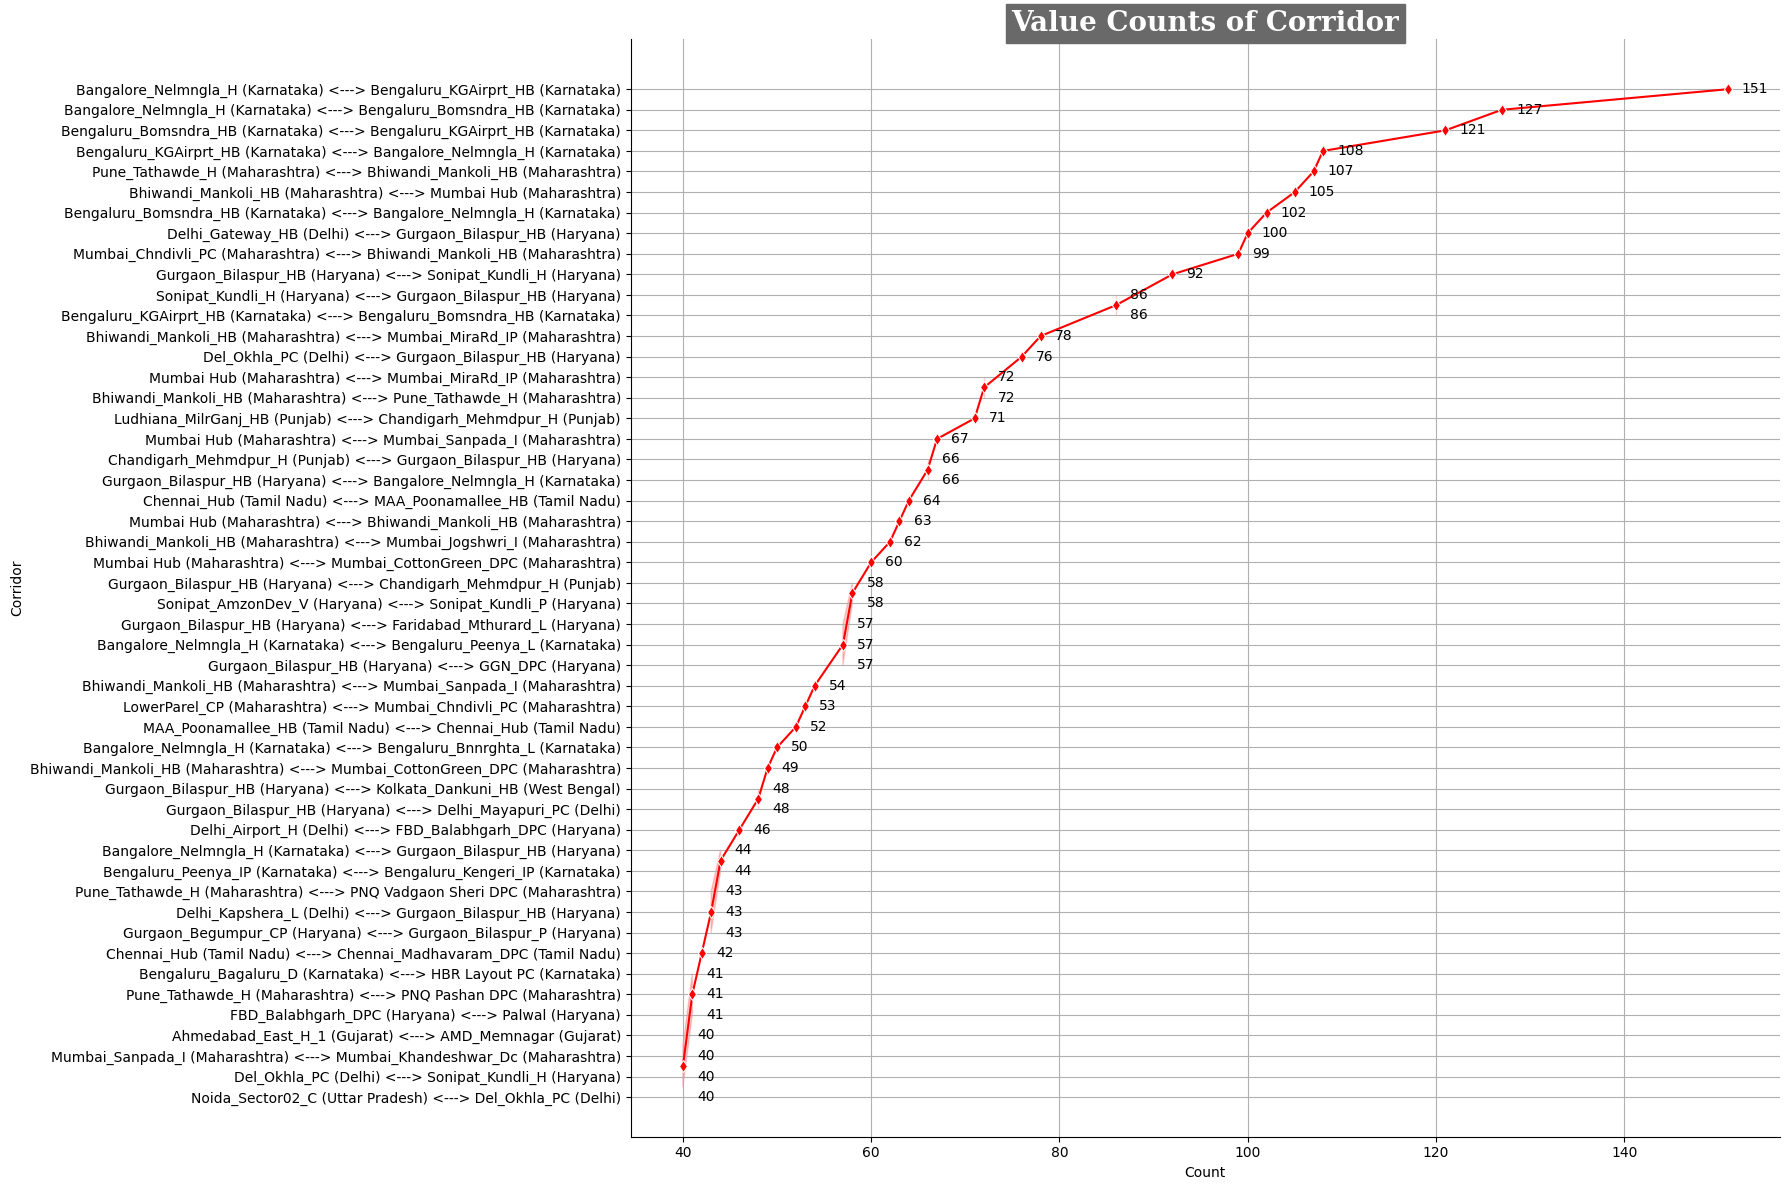

In [ ]:
corridor_counts = de['corridor'].value_counts()[:50]

plt.figure(figsize=(18,12))
#corridor_counts.plot(kind='line', marker='d', color='r')
sns.lineplot(y=corridor_counts.index, x=corridor_counts.values, marker='d', color='r')
plt.title('Value Counts of Corridor',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor='dimgrey',color='w')
plt.ylabel('Corridor')
plt.xlabel('Count')
plt.tight_layout()
sns.despine()
plt.grid(True)

for i, count in enumerate(corridor_counts.values):
    plt.text(count+1.5, corridor_counts.index[i], str(count), ha='left', va='center')

plt.show()

**Insights:**

The route between Bangalore_Nelamangala_H to Bengaluru_KGAirport_HB,Bengaluru_Bomsndra_HB sees the highest package volume, with 151 and 127 packages sent respectively.

Bengaluru_Bommasandra_HB to Bengaluru_KGAirport_HB is also popular, with 121 packages sent.

Bengaluru_KGAirport_HB to Bangalore_Nelamangala_H has moderate activity, with 108 packages sent.

The data indicates Bengaluru's importance as a transportation hub Corridor within Karnataka, handling significant package traffic.

In [ ]:
de['state_corridor'] = de['source_state']+'--'+de['source_city'] +' <---> '+ de['destination_state']+'--'+de['destination_city']
de['state_corridor'].value_counts()

state_corridor
Karnataka--Bengaluru <---> Karnataka--Bengaluru    1413
Maharashtra--Mumbai <---> Maharashtra--Mumbai       622
Maharashtra--Bhiwandi <---> Maharashtra--Mumbai     512
Maharashtra--Mumbai <---> Maharashtra--Bhiwandi     345
Telangana--Hyderabad <---> Telangana--Hyderabad     316
                                                   ... 
Maharashtra--Bhiwandi <---> Punjab--Chandigarh        1
Punjab--Abohar <---> Punjab--Malout                   1
Punjab--Malout <---> Punjab--Muktsar                  1
Uttar Pradesh--Ghaziabad <---> Haryana--Gurgaon       1
West Bengal--Chanchal <---> West Bengal--Samsi        1
Name: count, Length: 2302, dtype: int64

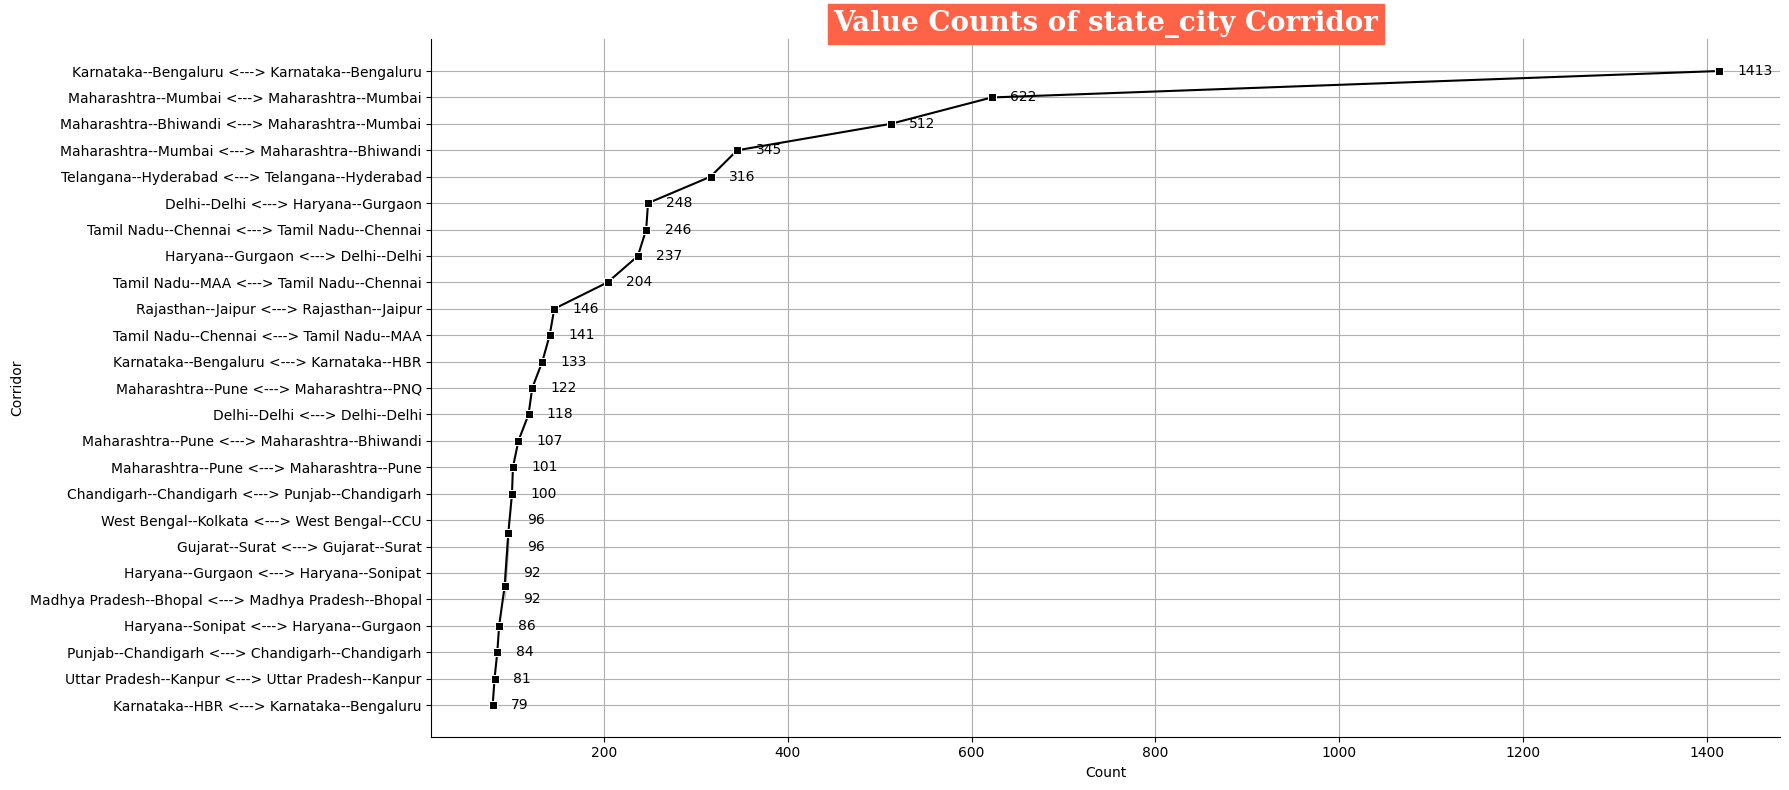

In [ ]:
state_corridor_counts = de['state_corridor'].value_counts()[:25]

plt.figure(figsize=(18,8))
sns.lineplot(y=state_corridor_counts.index, x=state_corridor_counts.values, marker='s', color='k')
plt.title('Value Counts of state_city Corridor',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor='tomato',color='w')
plt.ylabel('Corridor')
plt.xlabel('Count')
plt.tight_layout()
sns.despine()
plt.grid(True)

for i, count in enumerate(state_corridor_counts.values):
    plt.text(count+20, state_corridor_counts.index[i], str(count), ha='left', va='center')

plt.show()

In [ ]:
de['city_corridor'] = de['source_city']+'--'+de['source_place'] +' <---> '+ de['destination_city']+'--'+de['destination_place']
display(de['city_corridor'].value_counts())

city_corridor
Bengaluru--Nelmngla_H <---> Bengaluru--KGAirprt_HB       151
Bengaluru--Nelmngla_H <---> Bengaluru--Bomsndra_HB       127
Bengaluru--Bomsndra_HB <---> Bengaluru--KGAirprt_HB      121
Bengaluru--KGAirprt_HB <---> Bengaluru--Nelmngla_H       108
Pune--Tathawde_H <---> Bhiwandi--Mankoli_HB              107
                                                        ... 
Naraingarh--Ward2DPP_D <---> Chandigarh--Mehmdpur_H        1
Berhampore--Central_I_2 <---> Nowda--ArhamDPP_D            1
Malappuram--Munduprm_D <---> Thachnttukra--Nattukal_D      1
Mahasamund--RajpurRD_D <---> Durg--Bhilai_DC               1
Kolhapur--Central_H_2 <---> Surat--HUB                     1
Name: count, Length: 2741, dtype: int64

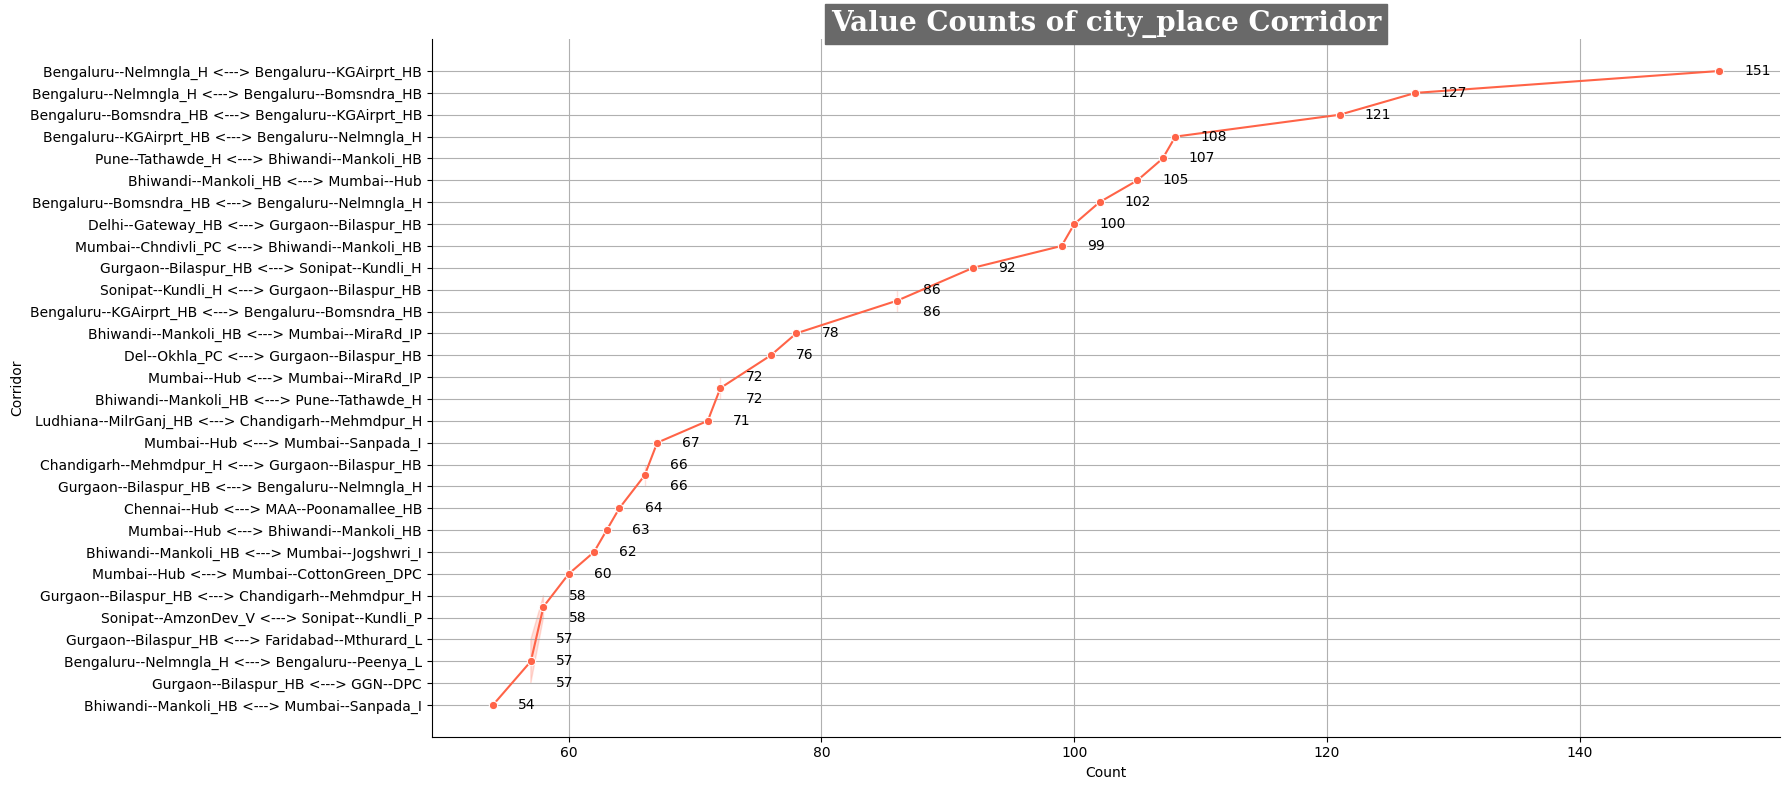

In [ ]:
city_corridor_counts = de['city_corridor'].value_counts()[:30]

plt.figure(figsize=(18,8))
sns.lineplot(y=city_corridor_counts.index, x=city_corridor_counts.values, marker='o', color='tomato')
plt.title('Value Counts of city_place Corridor',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor='dimgray',color='w')
plt.ylabel('Corridor')
plt.xlabel('Count')
plt.tight_layout()
sns.despine()
plt.grid(True)

for i, count in enumerate(city_corridor_counts.values):
    plt.text(count+2, city_corridor_counts.index[i], str(count), ha='left', va='center')

plt.show()

**Insights:**

Maharashtra, Karnataka, Haryana, and Tamil Nadu serve as key starting and ending locations for delivery services.

Mumbai, Gurgaon, Delhi, and Bengaluru are major metropolitan centers from where many deliveries originate.

A large proportion of nationwide deliveries are destined for Mumbai, Bengaluru, Gurgaon, and Delhi.

In [ ]:
# 4. Extracting features like month, year, day, etc. from Trip_creation_time
de['trip_creation_month'] = de['trip_creation_time'].dt.month
de['trip_creation_year'] = de['trip_creation_time'].dt.year
de['trip_creation_day'] = de['trip_creation_time'].dt.day
de['trip_creation_hour'] = de['trip_creation_time'].dt.hour
de['trip_creation_weekday'] = de['trip_creation_time'].dt.weekday
de['trip_creation_week'] = de['trip_creation_time'].dt.isocalendar().week
de

segment_key  \
0      trip-153671041653548748+IND209304AAA+IND000000ACB   
1      trip-153671041653548748+IND462022AAA+IND209304AAA   
2      trip-153671042288605164+IND561203AAB+IND562101AAA   
3      trip-153671042288605164+IND572101AAA+IND561203AAB   
4      trip-153671043369099517+IND000000ACB+IND160002AAC   
...                                                  ...   
26217  trip-153861115439069069+IND628204AAA+IND627657AAA   
26218  trip-153861115439069069+IND628613AAA+IND627005AAA   
26219  trip-153861115439069069+IND628801AAA+IND628204AAA   
26220  trip-153861118270144424+IND583119AAA+IND583101AAA   
26221  trip-153861118270144424+IND583201AAA+IND583119AAA   

                     trip_uuid      data route_type  \
0      trip-153671041653548748  training        FTL   
1      trip-153671041653548748  training        FTL   
2      trip-153671042288605164  training    Carting   
3      trip-153671042288605164  training    Carting   
4      trip-153671043369099517  training        FTL   
...                        ...       ...        ...   
26217  trip-153861115439069069      test    Carting   
26218  trip-153861115439069069      test    Carting   
26219  trip-153861115439069069      test    Carting   
26220  trip-153861118270144424      test        FTL   
26221  trip-153861118270144424      test        FTL   

              trip_creation_time                         source_name  \
0     2018-09-12 00:00:16.535741  Kanpur_Central_H_6 (Uttar Pradesh)   
1     2018-09-12 00:00:16.535741  Bhopal_Trnsport_H (Madhya Pradesh)   
2     2018-09-12 00:00:22.886430   Doddablpur_ChikaDPP_D (Karnataka)   
3     2018-09-12 00:00:22.886430       Tumkur_Veersagr_I (Karnataka)   
4     2018-09-12 00:00:33.691250       Gurgaon_Bilaspur_HB (Haryana)   
...                          ...                                 ...   
26217 2018-10-03 23:59:14.390954  Tirchchndr_Shnmgprm_D (Tamil Nadu)   
26218 2018-10-03 23:59:14.390954   Peikulam_SriVnktpm_D (Tamil Nadu)   
26219 2018-10-03 23:59:14.390954        Eral_Busstand_D (Tamil Nadu)   
26220 2018-10-03 23:59:42.701692       Sandur_WrdN1DPP_D (Karnataka)   
26221 2018-10-03 23:59:42.701692                  Hospet (Karnataka)   

                            destination_name              od_start_time  \
0              Gurgaon_Bilaspur_HB (Haryana) 2018-09-12 16:39:46.858469   
1         Kanpur_Central_H_6 (Uttar Pradesh) 2018-09-12 00:00:16.535741   
2          Chikblapur_ShntiSgr_D (Karnataka) 2018-09-12 02:03:09.655591   
3          Doddablpur_ChikaDPP_D (Karnataka) 2018-09-12 00:00:22.886430   
4             Chandigarh_Mehmdpur_H (Punjab) 2018-09-14 03:40:17.106733   
...                                      ...                        ...   
26217  Thisayanvilai_UdnkdiRD_D (Tamil Nadu) 2018-10-04 02:29:04.272194   
26218    Tirunelveli_VdkkuSrt_I (Tamil Nadu) 2018-10-04 04:16:39.894872   
26219     Tirchchndr_Shnmgprm_D (Tamil Nadu) 2018-10-04 01:44:53.808000   
26220                 Bellary_Dc (Karnataka) 2018-10-04 03:58:40.726547   
26221          Sandur_WrdN1DPP_D (Karnataka) 2018-10-04 02:51:44.712656   

                     od_end_time  start_scan_to_end_scan  ...  \
0     2018-09-13 13:40:23.123744                  1260.0  ...   
1     2018-09-12 16:39:46.858469                   999.0  ...   
2     2018-09-12 03:01:59.598855                    58.0  ...   
3     2018-09-12 02:03:09.655591                   122.0  ...   
4     2018-09-14 17:34:55.442454                   834.0  ...   
...                          ...                     ...  ...   
26217 2018-10-04 03:31:11.183797                    62.0  ...   
26218 2018-10-04 05:47:45.162682                    91.0  ...   
26219 2018-10-04 02:29:04.272194                    44.0  ...   
26220 2018-10-04 08:46:09.166940                   287.0  ...   
26221 2018-10-04 03:58:40.726547                    66.0  ...   

       destination_state                                           corridor  \
0                Haryana  Kanpur_Cent

# **In-Depth Analysis**

In [ ]:
new_df = de.copy()

In [ ]:
create_trip_dict={
  'data' : 'first',
  'route_type' : 'first',
  'od_start_time':'first',
  'od_end_time':'last',
  'od_time_diff_hour' : 'sum',
  'trip_creation_time' : 'first',
  'trip_creation_month' : 'first',
  'trip_creation_year' : 'first',
  'trip_creation_day' : 'first',
  'trip_creation_hour' : 'first',
  'trip_creation_weekday' : 'first',
  'trip_creation_week' : 'first',
  'start_scan_to_end_scan' : 'sum',
  'actual_distance_to_destination' : 'sum',
  'actual_time' : 'sum',
  'osrm_time' : 'sum',
  'osrm_distance' : 'sum',
  'segment_actual_time': 'sum',
  'segment_osrm_time': 'sum',
  'segment_osrm_distance': 'sum',
  'segment_actual_time_sum': 'sum',
  'segment_osrm_time_sum': 'sum',
  'segment_osrm_distance_sum': 'sum',
  'source_name': 'first',
  'source_city':'first',
  'source_state':'first',
  'source_place':'first',
  'destination_name': 'first',
  'destination_city':'first',
  'destination_state':'first',
  'destination_place':'first',
  'corridor':'first',
  'state_corridor':'first',
  'city_corridor':'first'
  }

trip_agg_df = new_df.groupby('trip_uuid').agg(create_trip_dict).reset_index()
trip_agg_df


trip_uuid      data route_type  \
0      trip-153671041653548748  training        FTL   
1      trip-153671042288605164  training    Carting   
2      trip-153671043369099517  training        FTL   
3      trip-153671046011330457  training    Carting   
4      trip-153671052974046625  training        FTL   
...                        ...       ...        ...   
14782  trip-153861095625827784      test    Carting   
14783  trip-153861104386292051      test    Carting   
14784  trip-153861106442901555      test    Carting   
14785  trip-153861115439069069      test    Carting   
14786  trip-153861118270144424      test        FTL   

                   od_start_time                od_end_time  \
0     2018-09-12 16:39:46.858469 2018-09-12 16:39:46.858469   
1     2018-09-12 02:03:09.655591 2018-09-12 02:03:09.655591   
2     2018-09-14 03:40:17.106733 2018-09-14 03:40:17.106733   
3     2018-09-12 00:01:00.113710 2018-09-12 01:41:29.809822   
4     2018-09-12 00:02:09.740725 2018-09-12 03:54:43.114421   
...                          ...                        ...   
14782 2018-10-03 23:55:56.258533 2018-10-04 06:41:25.409035   
14783 2018-10-03 23:57:23.863155 2018-10-04 00:57:59.294434   
14784 2018-10-04 02:51:27.075797 2018-10-04 02:51:27.075797   
14785 2018-10-03 23:59:14.390954 2018-10-04 02:29:04.272194   
14786 2018-10-04 03:58:40.726547 2018-10-04 03:58:40.726547   

       od_time_diff_hour         trip_creation_time  trip_creation_month  \
0              37.668497 2018-09-12 00:00:16.535741                    9   
1               3.026865 2018-09-12 00:00:22.886430                    9   
2              65.572709 2018-09-12 00:00:33.691250                    9   
3               1.674916 2018-09-12 00:01:00.113710                    9   
4              11.972484 2018-09-12 00:02:09.740725                    9   
...                  ...                        ...                  ...   
14782           4.300482 2018-10-03 23:55:56.258533                   10   
14783           1.009842 2018-10-03 23:57:23.863155                   10   
14784           7.035331 2018-10-03 23:57:44.429324                   10   
14785           5.808548 2018-10-03 23:59:14.390954                   10   
14786           5.906793 2018-10-03 23:59:42.701692                   10   

       trip_creation_year  trip_creation_day  ...  source_city   source_state  \
0                    2018                 12  ...       Kanpur  Uttar Pradesh   
1                    2018                 12  ...   Doddablpur      Karnataka   
2                    2018                 12  ...      Gurgaon        Haryana   
3                    2018                 12  ...       Mumbai    Maharashtra   
4                    2018                 12  ...      Bellary      Karnataka   
...                   ...                ...  ...          ...            ...   
14782                2018                  3  ...   Chandigarh         Punjab   
14783                2018                  3  ...          FBD        Haryana   
14784                2018                  3  ...       Kanpur  Uttar Pradesh   
14785                2018                  3  ...  Tirunelveli     Tamil Nadu   
14786                2018                  3  ...       Sandur      Karnataka   

         source_place                    destination_name  destination_city  \
0         Central_H_6       Gurgaon_Bilaspur_HB (Haryana)           Gurgaon   
1          ChikaDPP_D   Chikblapur_ShntiSgr_D (Karnataka)        Chikblapur   
2         Bilaspur_HB      Chandigarh_Mehmdpur_H (Punjab)        Chandigarh   
3                 Hub      Mumbai_MiraRd_IP (Maharashtra)            Mumbai   
4                  Dc                  Hospet (Karnataka)            Hospet   
...               ...                                 ...               ...   
14782      Mehmdpur_H                Zirakpur_DC (Punjab)          Zirakpur   
14783  Balabhgarh_DPC      Faridabad_Blbgarh_DC (Haryana)         Faridabad   
14784 

In [ ]:
numerical_columns = trip_agg_df.select_dtypes(include=[np.float32, np.float64])
numerical_columns.describe().T

count        mean         std        min  \
od_time_diff_hour               14787.0    8.840187   10.978880   0.391024   
start_scan_to_end_scan          14787.0  529.429025  658.254936  23.000000   
actual_distance_to_destination  14787.0  164.090196  305.502982   9.002461   
actual_time                     14787.0  356.306012  561.517936   9.000000   
osrm_time                       14787.0  160.990938  271.459495   6.000000   
osrm_distance                   14787.0  203.887411  370.565564   9.072900   
segment_actual_time             14787.0  353.059174  556.365911   9.000000   
segment_osrm_time               14787.0  180.511598  314.679279   6.000000   
segment_osrm_distance           14787.0  222.705466  416.846279   9.072900   
segment_actual_time_sum         14787.0  353.059174  556.365911   9.000000   
segment_osrm_time_sum           14787.0  180.511598  314.679279   6.000000   
segment_osrm_distance_sum       14787.0  222.705466  416.846279   9.072900   

                                       25%         50%         75%  \
od_time_diff_hour                 2.494975    4.661846   10.558962   
start_scan_to_end_scan          149.000000  279.000000  632.000000   
actual_distance_to_destination   22.777099   48.287894  163.591258   
actual_time                      67.000000  148.000000  367.000000   
osrm_time                        29.000000   60.000000  168.000000   
osrm_distance                    30.756900   65.302800  206.644200   
segment_actual_time              66.000000  147.000000  364.000000   
segment_osrm_time                30.000000   65.000000  184.000000   
segment_osrm_distance            32.578850   69.784200  216.560600   
segment_actual_time_sum          66.000000  147.000000  364.000000   
segment_osrm_time_sum            30.000000   65.000000  184.000000   
segment_osrm_distance_sum        32.578850   69.784200  216.560600   

                                        max  
od_time_diff_hour                131.642533  
start_scan_to_end_scan          7898.000000  
actual_distance_to_destination  2186.531787  
actual_time                     6265.000000  
osrm_time                       2032.000000  
osrm_distance                   2840.081000  
segment_actual_time             6230.000000  
segment_osrm_time               2564.000000  
segment_osrm_distance           3523.632400  
segment_actual_time_sum         6230.000000  
segment_osrm_time_sum           2564.000000  
segment_osrm_distance_sum       3523.632400

In [ ]:
trip_agg_df.describe(include = object).T

count unique  \
trip_uuid          14787  14787   
source_name        14787    930   
source_city        14787    713   
source_state       14787     29   
source_place       14787    788   
destination_name   14787   1042   
destination_city   14787    851   
destination_state  14787     32   
destination_place  14787    866   
corridor           14787   1737   
state_corridor     14787   1366   
city_corridor      14787   1737   

                                                                 top  freq  
trip_uuid                                    trip-153861118270144424     1  
source_name                            Gurgaon_Bilaspur_HB (Haryana)  1052  
source_city                                                Bengaluru  1700  
source_state                                             Maharashtra  2714  
source_place                                             Bilaspur_HB  1052  
destination_name                       Gurgaon_Bilaspur_HB (Haryana)   745  
destination_city                                           Bengaluru  1633  
destination_state                                        Maharashtra  2569  
destination_place                                        Bilaspur_HB   745  
corridor           Bangalore_Nelmngla_H (Karnataka) <---> Bengalu...   151  
state_corridor       Karnataka--Bengaluru <---> Karnataka--Bengaluru  1333  
city_corridor      Bengaluru--Nelmngla_H <---> Bengaluru--KGAirpr...   151

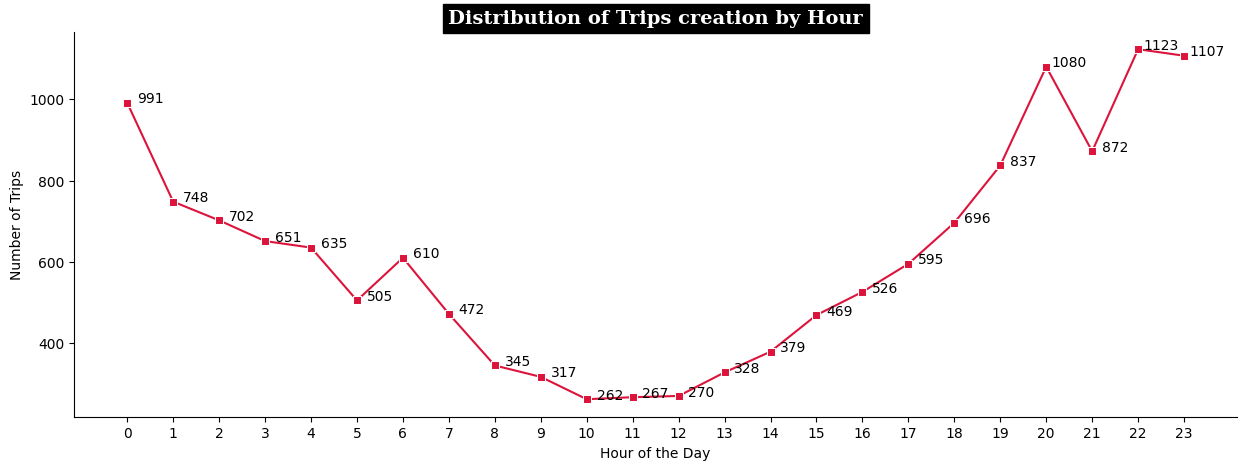

In [ ]:
trip_df = trip_agg_df.copy()
trip_creation_by_hour = trip_df.groupby(by='trip_creation_hour')['trip_uuid'].count().reset_index()

plt.figure(figsize=(15,5))
sns.lineplot(data=trip_creation_by_hour, x='trip_creation_hour', y='trip_uuid', marker='s', color='crimson')
plt.xticks(np.arange(0, 24))

for i, count in enumerate(trip_creation_by_hour['trip_uuid']):
    plt.text(trip_creation_by_hour['trip_creation_hour'][i]+0.5, count, count, ha='center')

plt.title('Distribution of Trips creation by Hour',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='k',color='w')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
sns.despine()
plt.show()

In [ ]:
trip_df.trip_creation_year.value_counts()

trip_creation_year
2018    14787
Name: count, dtype: int64

In [ ]:
trip_df.trip_creation_month.value_counts()

trip_creation_month
9     13011
10     1776
Name: count, dtype: int64

In [ ]:
trip_df['trip_creation_month'].value_counts(normalize = True) * 100

trip_creation_month
9     87.98945
10    12.01055
Name: proportion, dtype: float64

In [ ]:
trip_df.trip_creation_week.value_counts()

trip_creation_week
38    5001
39    4402
37    3608
40    1776
Name: count, dtype: Int64

In [ ]:
trip_df.trip_creation_weekday.value_counts(ascending=True)

trip_creation_weekday
6    1753
0    1980
1    2035
4    2057
3    2103
5    2128
2    2731
Name: count, dtype: int64

In [ ]:
trip_df['trip_creation_day_week'] = trip_df['trip_creation_time'].dt.day_name()

In [ ]:
trip_df.trip_creation_day.value_counts()

trip_creation_day
18    791
15    783
13    750
12    747
21    740
22    740
17    722
14    712
20    703
25    695
26    683
19    674
24    658
27    650
23    631
3     627
16    616
28    605
29    605
1     600
2     549
30    506
Name: count, dtype: int64

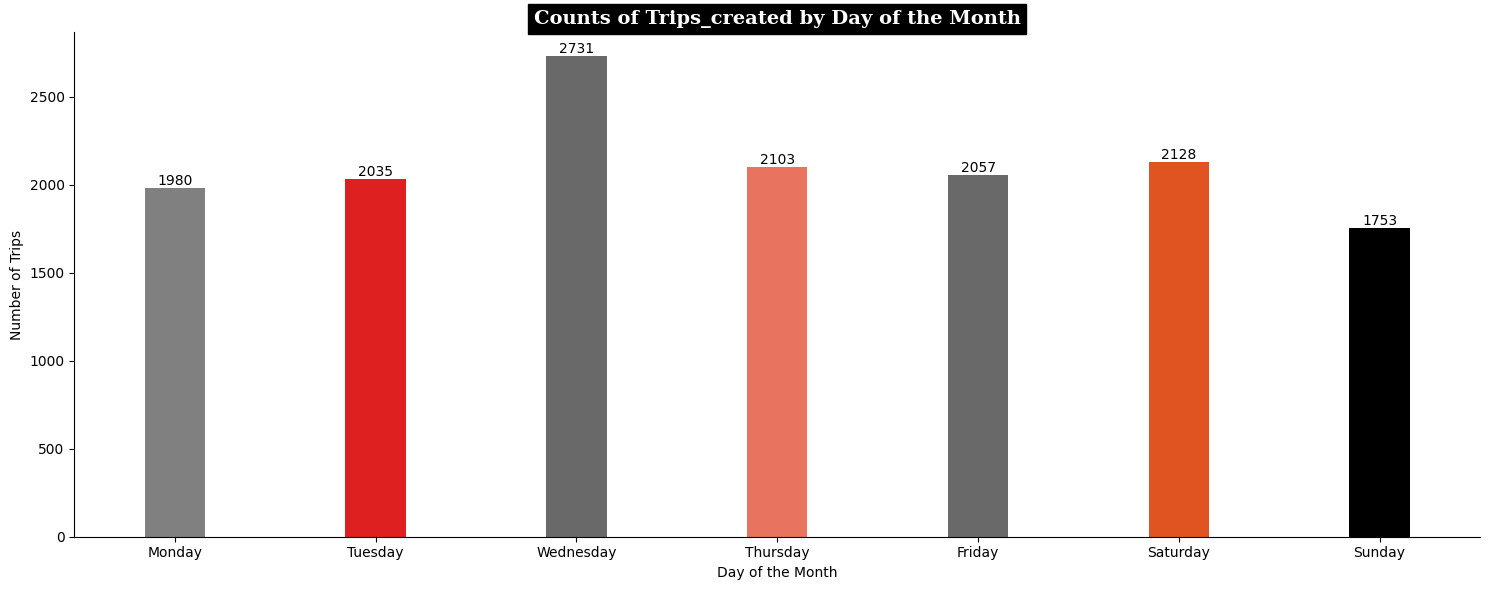

In [ ]:
plt.figure(figsize=(15,6))

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = trip_df['trip_creation_day_week'].value_counts().reindex(weekday_order)

sns.barplot(x=day_counts.index, y=day_counts.values, palette=cp,width=0.3)
for i, count in enumerate(day_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.title('Counts of Trips_created by Day of the Month',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='k',color='w')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Trips')
plt.tight_layout()
sns.despine()
plt.show()

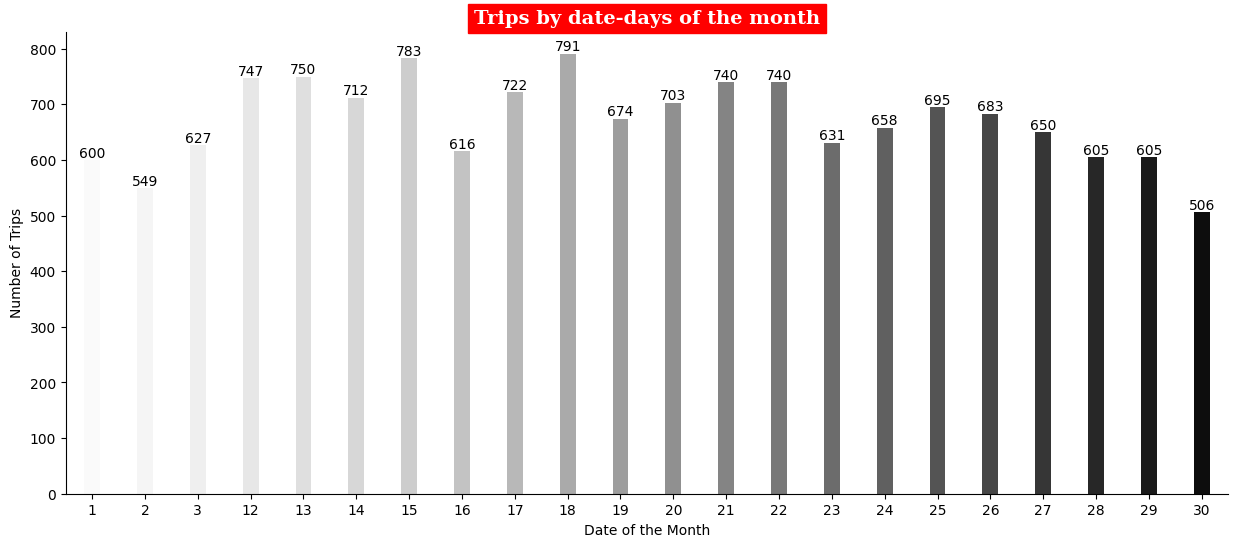

In [ ]:
trip_df['trip_creation_dayofdate'] = trip_df['trip_creation_time'].dt.day
trips_by_dateday = trip_df.groupby(by = 'trip_creation_dayofdate')['trip_uuid'].count().to_frame().reset_index()

plt.figure(figsize = (15, 6))
sns.barplot(data =trip_df,x = trips_by_dateday['trip_creation_dayofdate'],y = trips_by_dateday['trip_uuid'], palette='Greys',width=0.3)
for i, count in enumerate(trips_by_dateday['trip_uuid']):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.title('Trips by date-days of the month',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='r',color='w')
plt.xlabel('Date of the Month')
plt.ylabel('Number of Trips')
sns.despine()
plt.show()

# **Outlier treatment**

In [ ]:
numerical_columns

od_time_diff_hour  start_scan_to_end_scan  \
0              37.668497                  2259.0   
1               3.026865                   180.0   
2              65.572709                  3933.0   
3               1.674916                   100.0   
4              11.972484                   717.0   
...                  ...                     ...   
14782           4.300482                   257.0   
14783           1.009842                    60.0   
14784           7.035331                   421.0   
14785           5.808548                   347.0   
14786           5.906793                   353.0   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                          824.732854       1562.0      717.0       991.3523   
1                           73.186911        143.0       68.0        85.1110   
2                         1927.404273       3347.0     1740.0      2354.0665   
3                           17.175274         59.0       15.0        19.6800   
4                          127.448500        341.0      117.0       146.7918   
...                               ...          ...        ...            ...   
14782                       57.762332         83.0       62.0        73.4630   
14783                       15.513784         21.0       12.0        16.0882   
14784                       38.684839        282.0       48.0        58.9037   
14785                      134.723836        264.0      179.0       171.1103   
14786                       66.081533        275.0       68.0        80.5787   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0                   1548.0             1008.0              1320.4733   
1                    141.0               65.0                84.1894   
2                   3308.0             1941.0              2545.2678   
3                     59.0               16.0                19.8766   
4                    340.0              115.0               146.7919   
...                    ...                ...                    ...   
14782                 82.0               62.0                64.8551   
14783                 21.0               11.0                16.0883   
14784                281.0               88.0               104.8866   
14785                258.0              221.0               223.5324   
14786                274.0               67.0                80.5787   

       segment_actual_time_sum  segment_osrm_time_sum  \
0                       1548.0                 1008.0   
1                        141.0                   65.0   
2                       3308.0                 1941.0   
3                         59.0                   16.0   
4                        340.0                  115.0   
...                        ...                    ...   
14782                     82.0                   62.0   
14783                     21.0                   11.0   
14784                    281.0                   88.0   
14785                    258.0                  221.0   
14786                    274.0                   67.0   

       segment_osrm_distance_sum  
0                      1320.4733  
1                        84.1894  
2                      2545.2678  
3                        19.8766  
4                       146.7919  
...                          ...  
14782                    64.8551  
14783                    16.0883  
14784                   104.8866  
14785                   223.5324  
14786                    80.5787  

[14787 rows x 12 columns]

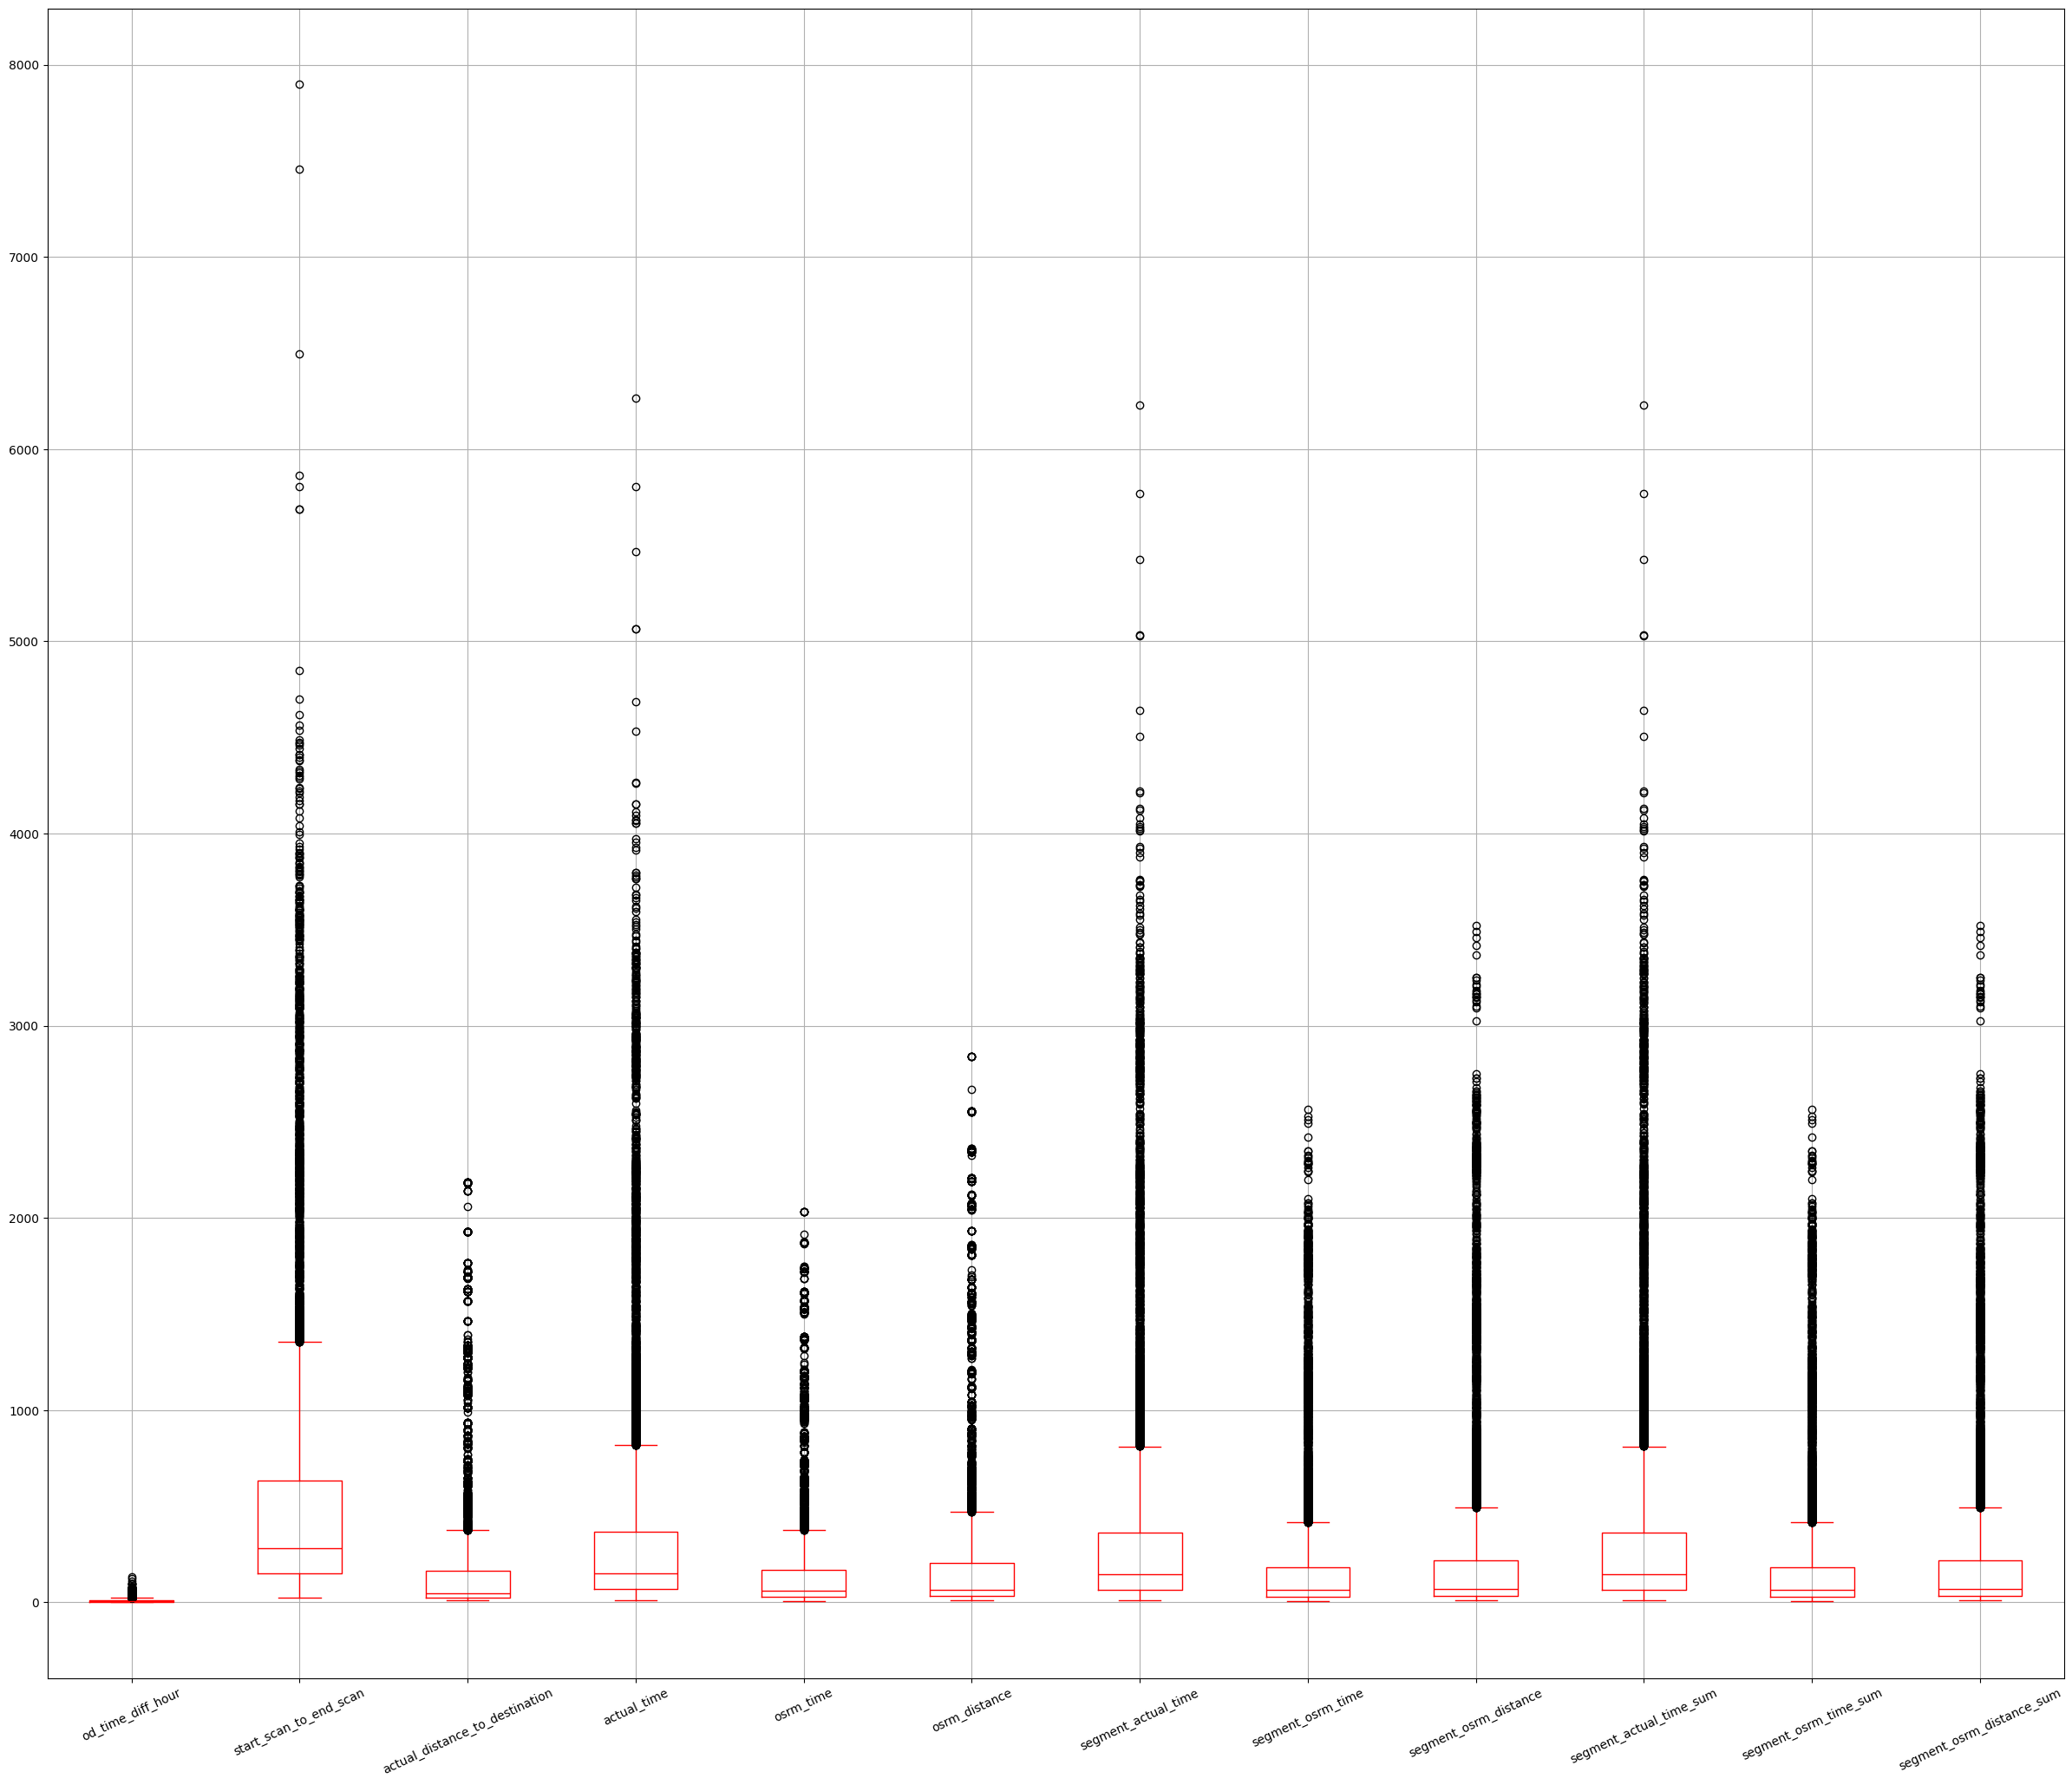

In [ ]:
plt.figure(figsize=(30, 25))
numerical_columns.boxplot(rot=25, figsize=(35,20), color = 'r')
plt.grid('off')
plt.show()

In [ ]:
num_cols = numerical_columns.columns.tolist()
num_cols

['od_time_diff_hour',
 'start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'segment_actual_time_sum',
 'segment_osrm_time_sum',
 'segment_osrm_distance_sum']

In [ ]:
#handling outliers using IQR method
# obtain the first quartile
Q1 = numerical_columns.quantile(0.25)

# obtain the third quartile
Q3 = numerical_columns.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

od_time_diff_hour                   8.063987
start_scan_to_end_scan            483.000000
actual_distance_to_destination    140.814159
actual_time                       300.000000
osrm_time                         139.000000
osrm_distance                     175.887300
segment_actual_time               298.000000
segment_osrm_time                 154.000000
segment_osrm_distance             183.981750
segment_actual_time_sum           298.000000
segment_osrm_time_sum             154.000000
segment_osrm_distance_sum         183.981750
dtype: float64


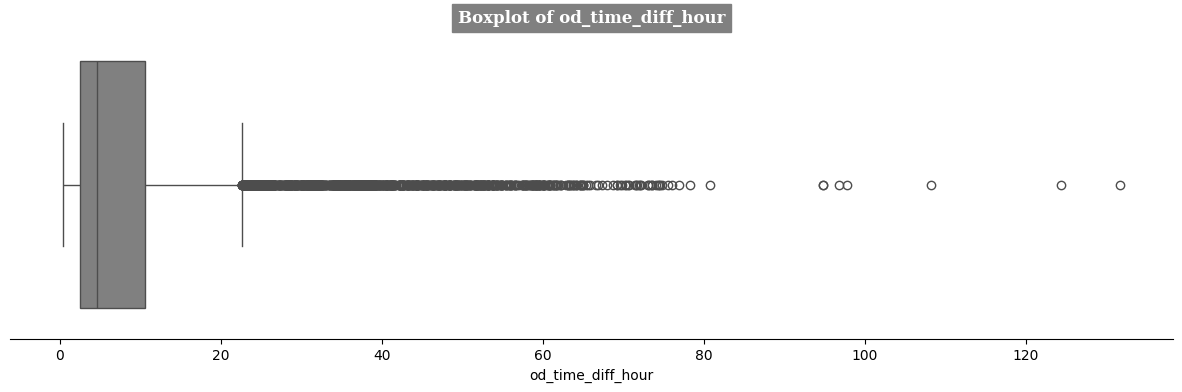

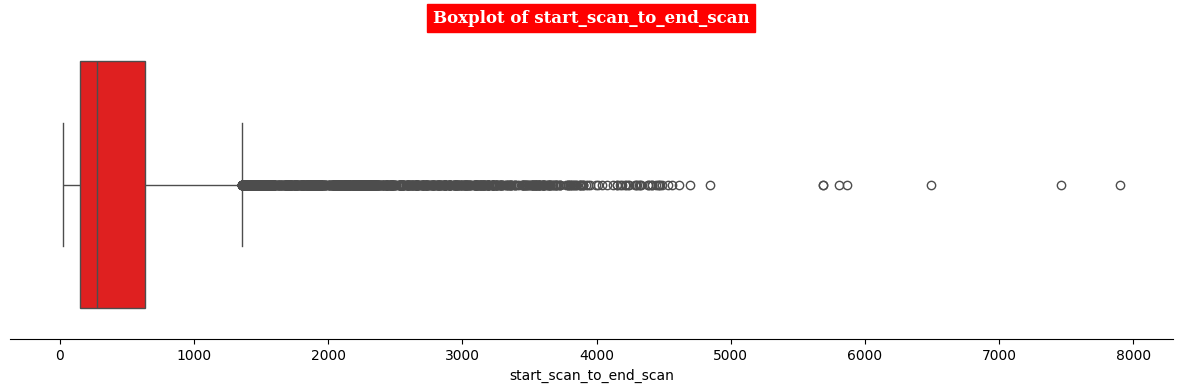

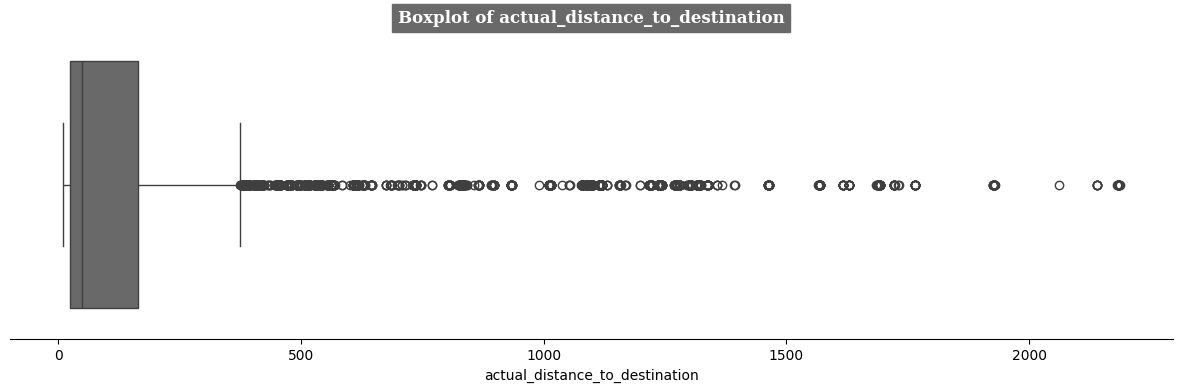

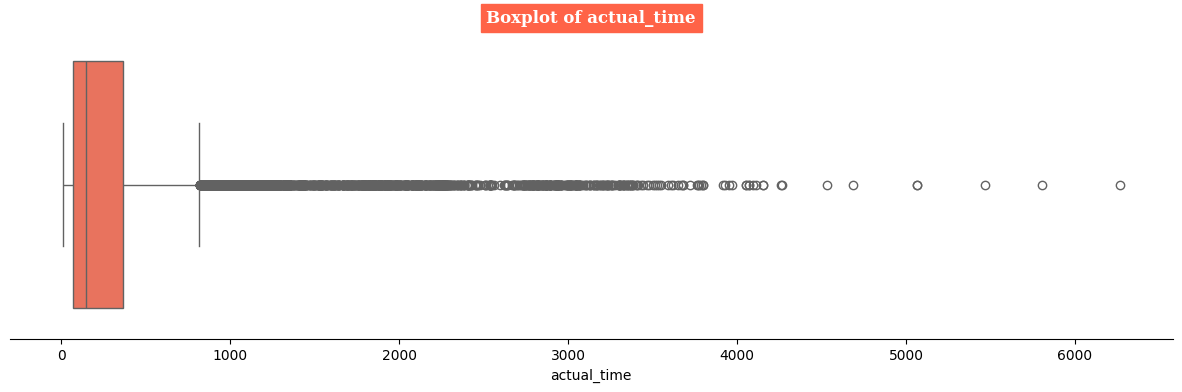

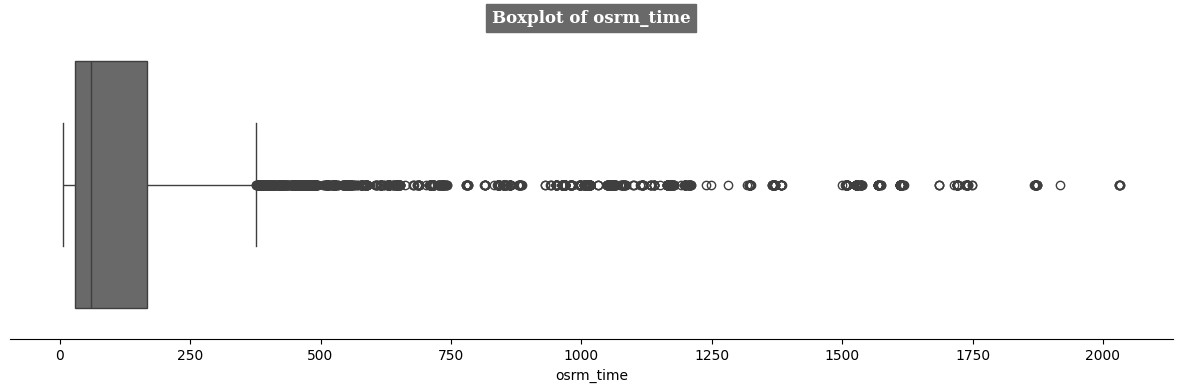

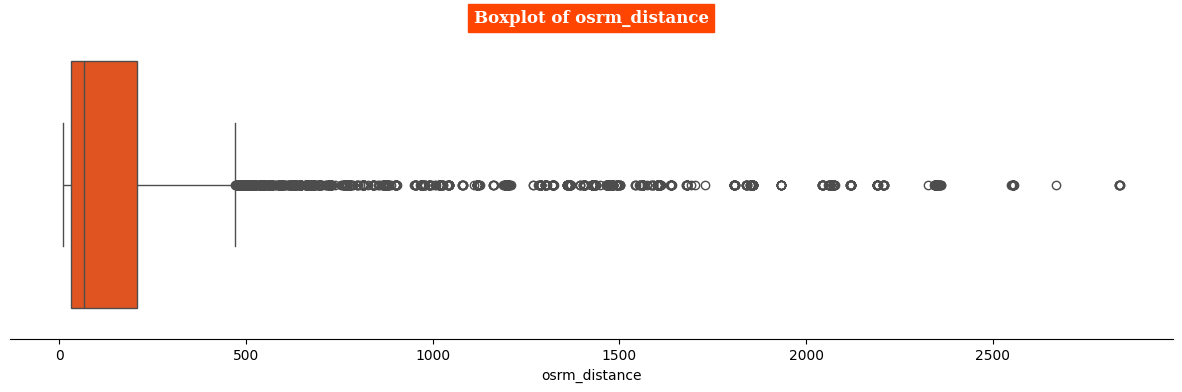

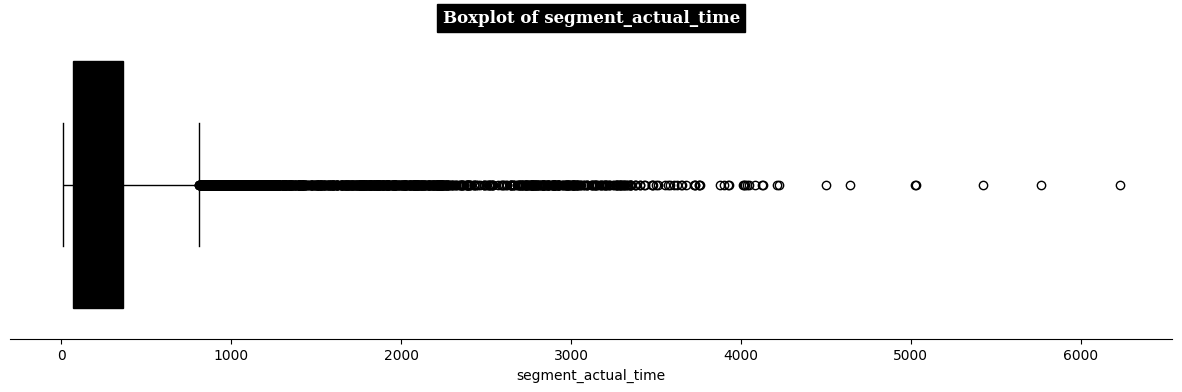

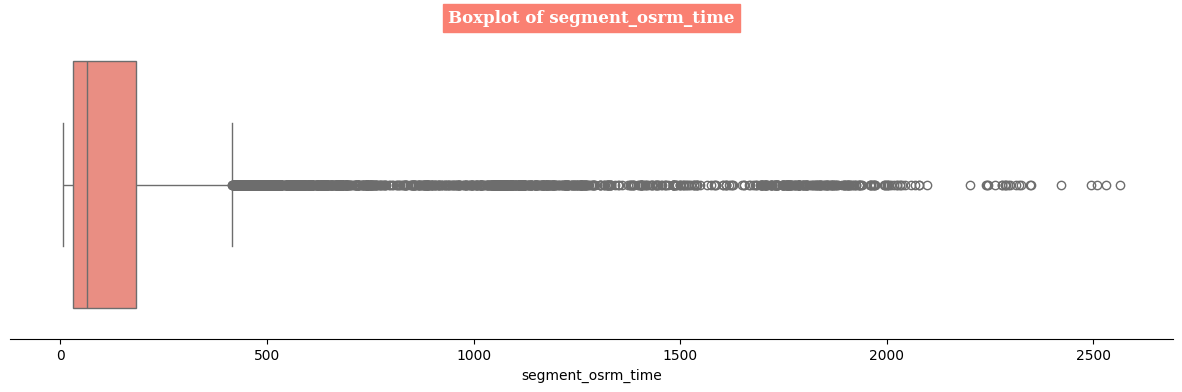

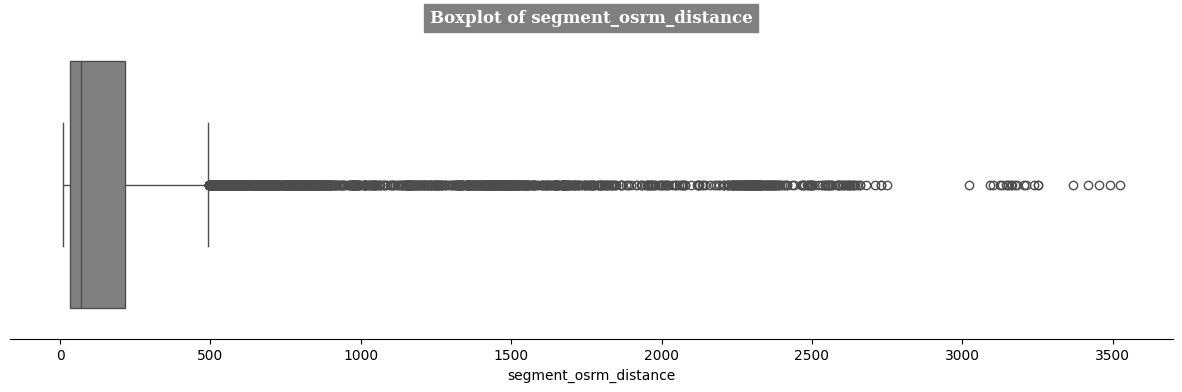

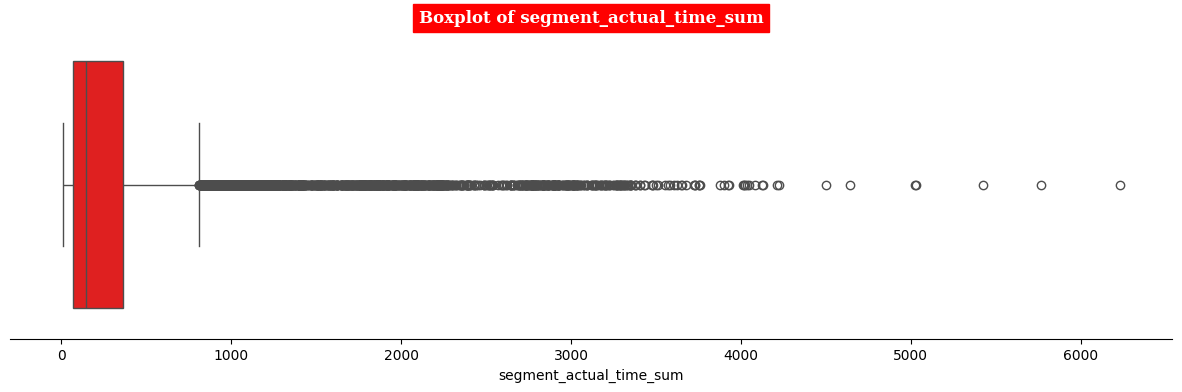

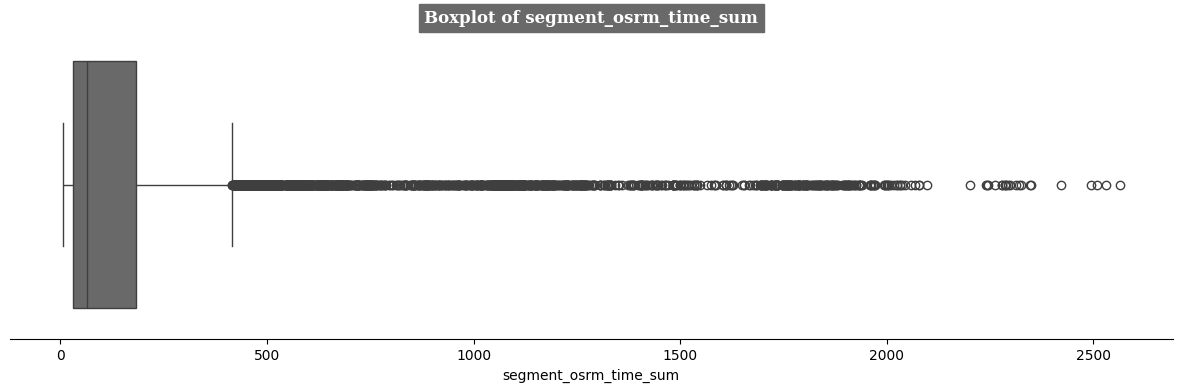

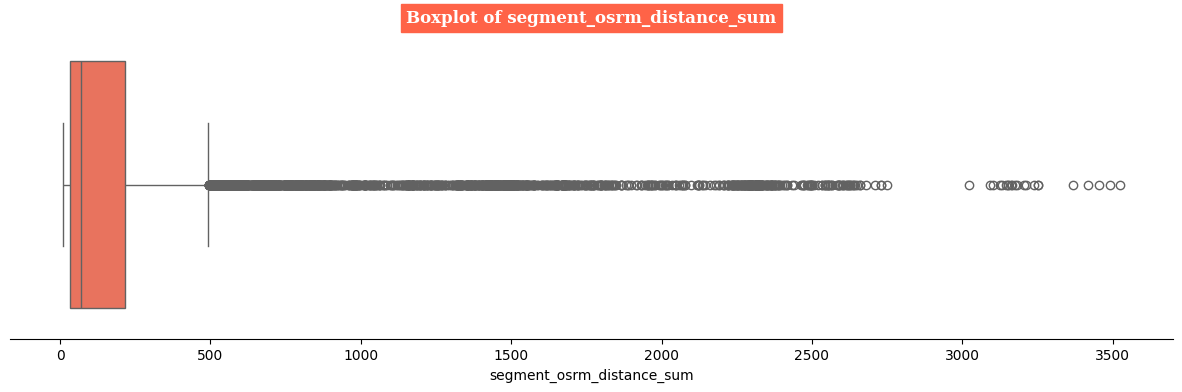

In [ ]:
for i,col in enumerate(numerical_columns):
    plt.figure(figsize=(15,4))
    sns.boxplot(x=col, data=numerical_columns,color=cp[i])
    sns.despine(left=True)
    plt.yticks([])
    plt.title(f'Boxplot of {col}',fontfamily='serif',fontweight='bold',fontsize=12,backgroundcolor=cp[i],color='w')
    plt.show()

od_time_diff_hour
0              37.668497
1               3.026865
2              65.572709
3               1.674916
4              11.972484
...                  ...
14782           4.300482
14783           1.009842
14784           7.035331
14785           5.808548
14786           5.906793

[14787 rows x 1 columns]

Clipped data of od_time_diff_hour


od_time_diff_hour
0              22.654942
1               3.026865
2              22.654942
3               1.674916
4              11.972484
...                  ...
14782           4.300482
14783           1.009842
14784           7.035331
14785           5.808548
14786           5.906793

[14787 rows x 1 columns]


Filtered data of od_time_diff_hour


od_time_diff_hour
0              37.668497
1               3.026865
2              65.572709
3               1.674916
4              11.972484
...                  ...
14782           4.300482
14783           1.009842
14784           7.035331
14785           5.808548
14786           5.906793

[14787 rows x 1 columns]

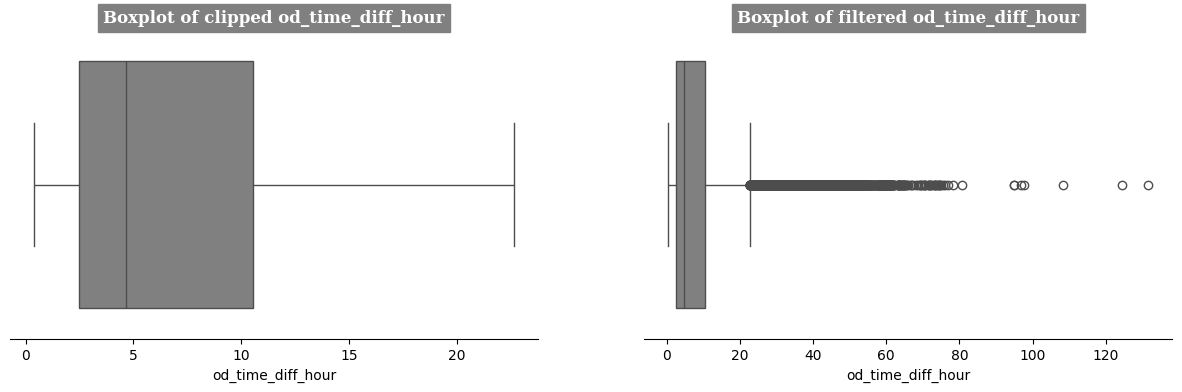

start_scan_to_end_scan
0                      2259.0
1                       180.0
2                      3933.0
3                       100.0
4                       717.0
...                       ...
14782                   257.0
14783                    60.0
14784                   421.0
14785                   347.0
14786                   353.0

[14787 rows x 1 columns]

Clipped data of start_scan_to_end_scan


start_scan_to_end_scan
0                      1356.5
1                       180.0
2                      1356.5
3                       100.0
4                       717.0
...                       ...
14782                   257.0
14783                    60.0
14784                   421.0
14785                   347.0
14786                   353.0

[14787 rows x 1 columns]


Filtered data of start_scan_to_end_scan


start_scan_to_end_scan
0                      2259.0
1                       180.0
2                      3933.0
3                       100.0
4                       717.0
...                       ...
14782                   257.0
14783                    60.0
14784                   421.0
14785                   347.0
14786                   353.0

[14787 rows x 1 columns]

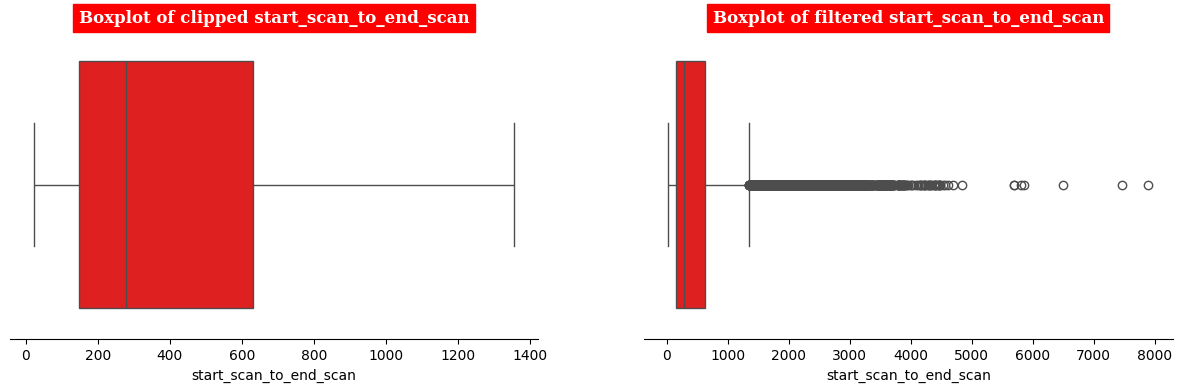

actual_distance_to_destination
0                          824.732854
1                           73.186911
2                         1927.404273
3                           17.175274
4                          127.448500
...                               ...
14782                       57.762332
14783                       15.513784
14784                       38.684839
14785                      134.723836
14786                       66.081533

[14787 rows x 1 columns]

Clipped data of actual_distance_to_destination


actual_distance_to_destination
0                          374.812497
1                           73.186911
2                          374.812497
3                           17.175274
4                          127.448500
...                               ...
14782                       57.762332
14783                       15.513784
14784                       38.684839
14785                      134.723836
14786                       66.081533

[14787 rows x 1 columns]


Filtered data of actual_distance_to_destination


actual_distance_to_destination
0                          824.732854
1                           73.186911
2                         1927.404273
3                           17.175274
4                          127.448500
...                               ...
14782                       57.762332
14783                       15.513784
14784                       38.684839
14785                      134.723836
14786                       66.081533

[14787 rows x 1 columns]

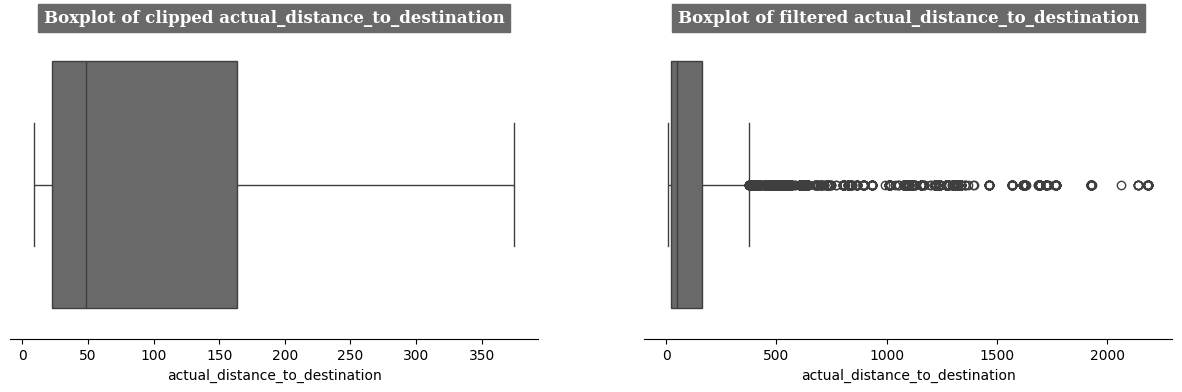

actual_time
0           1562.0
1            143.0
2           3347.0
3             59.0
4            341.0
...            ...
14782         83.0
14783         21.0
14784        282.0
14785        264.0
14786        275.0

[14787 rows x 1 columns]

Clipped data of actual_time


actual_time
0            817.0
1            143.0
2            817.0
3             59.0
4            341.0
...            ...
14782         83.0
14783         21.0
14784        282.0
14785        264.0
14786        275.0

[14787 rows x 1 columns]


Filtered data of actual_time


actual_time
0           1562.0
1            143.0
2           3347.0
3             59.0
4            341.0
...            ...
14782         83.0
14783         21.0
14784        282.0
14785        264.0
14786        275.0

[14787 rows x 1 columns]

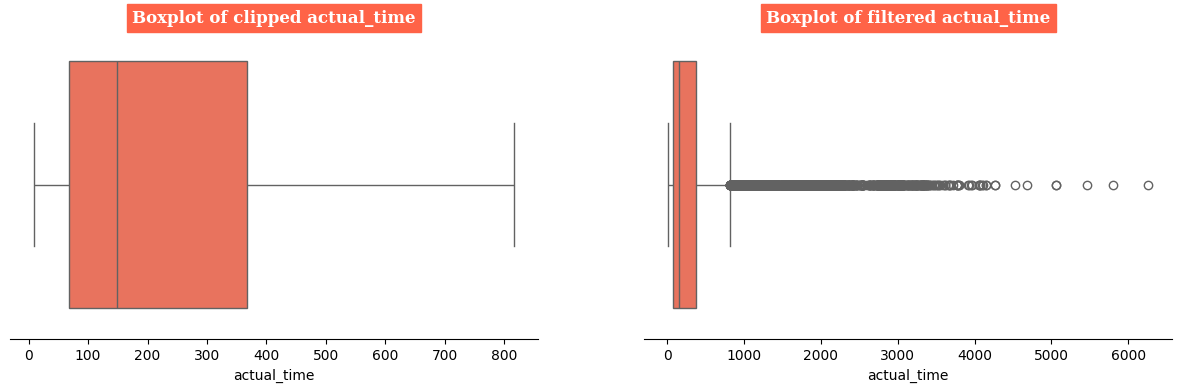

osrm_time
0          717.0
1           68.0
2         1740.0
3           15.0
4          117.0
...          ...
14782       62.0
14783       12.0
14784       48.0
14785      179.0
14786       68.0

[14787 rows x 1 columns]

Clipped data of osrm_time


osrm_time
0          376.5
1           68.0
2          376.5
3           15.0
4          117.0
...          ...
14782       62.0
14783       12.0
14784       48.0
14785      179.0
14786       68.0

[14787 rows x 1 columns]


Filtered data of osrm_time


osrm_time
0          717.0
1           68.0
2         1740.0
3           15.0
4          117.0
...          ...
14782       62.0
14783       12.0
14784       48.0
14785      179.0
14786       68.0

[14787 rows x 1 columns]

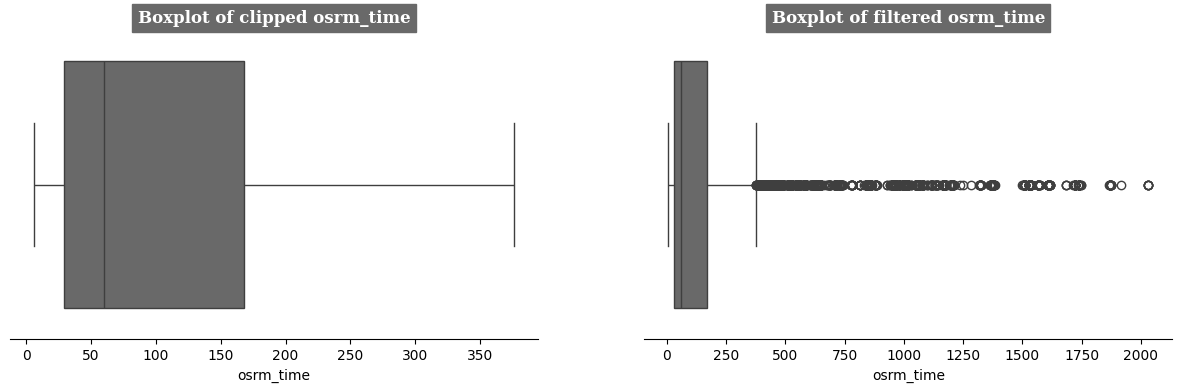

osrm_distance
0           991.3523
1            85.1110
2          2354.0665
3            19.6800
4           146.7918
...              ...
14782        73.4630
14783        16.0882
14784        58.9037
14785       171.1103
14786        80.5787

[14787 rows x 1 columns]

Clipped data of osrm_distance


osrm_distance
0          470.47515
1           85.11100
2          470.47515
3           19.68000
4          146.79180
...              ...
14782       73.46300
14783       16.08820
14784       58.90370
14785      171.11030
14786       80.57870

[14787 rows x 1 columns]


Filtered data of osrm_distance


osrm_distance
0           991.3523
1            85.1110
2          2354.0665
3            19.6800
4           146.7918
...              ...
14782        73.4630
14783        16.0882
14784        58.9037
14785       171.1103
14786        80.5787

[14787 rows x 1 columns]

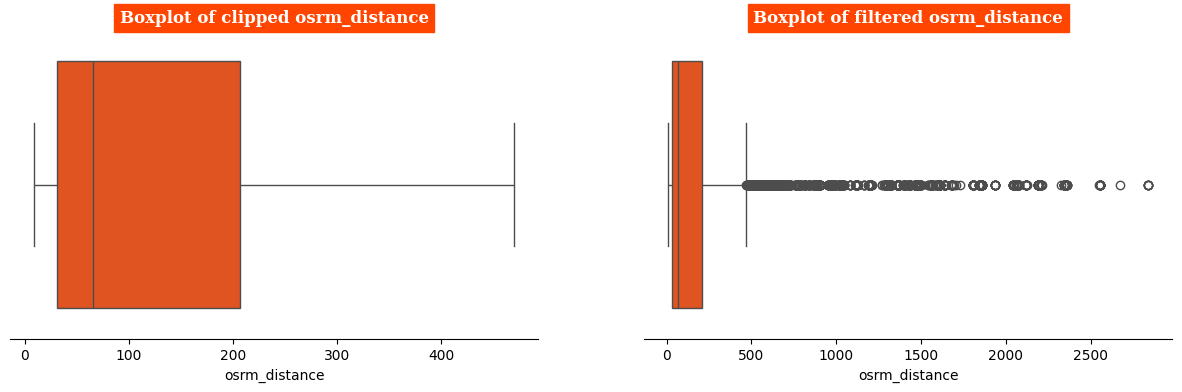

segment_actual_time
0                   1548.0
1                    141.0
2                   3308.0
3                     59.0
4                    340.0
...                    ...
14782                 82.0
14783                 21.0
14784                281.0
14785                258.0
14786                274.0

[14787 rows x 1 columns]

Clipped data of segment_actual_time


segment_actual_time
0                    811.0
1                    141.0
2                    811.0
3                     59.0
4                    340.0
...                    ...
14782                 82.0
14783                 21.0
14784                281.0
14785                258.0
14786                274.0

[14787 rows x 1 columns]


Filtered data of segment_actual_time


segment_actual_time
0                   1548.0
1                    141.0
2                   3308.0
3                     59.0
4                    340.0
...                    ...
14782                 82.0
14783                 21.0
14784                281.0
14785                258.0
14786                274.0

[14787 rows x 1 columns]

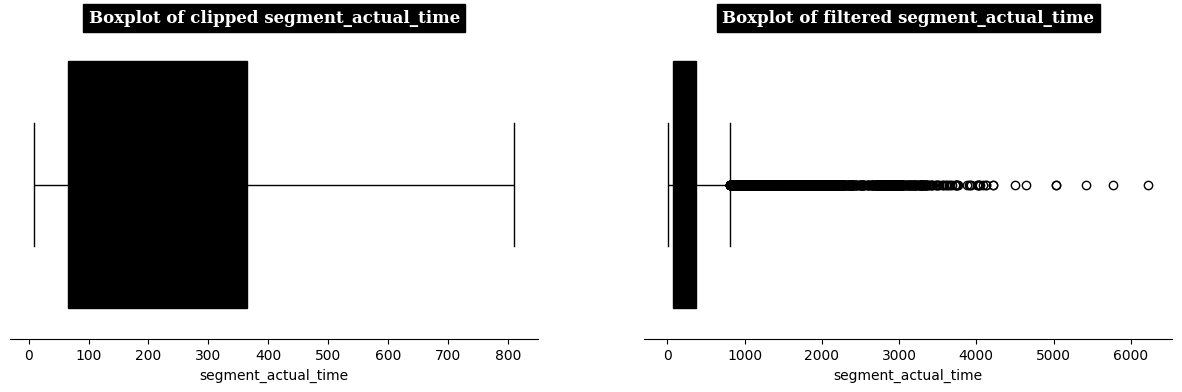

segment_osrm_time
0                 1008.0
1                   65.0
2                 1941.0
3                   16.0
4                  115.0
...                  ...
14782               62.0
14783               11.0
14784               88.0
14785              221.0
14786               67.0

[14787 rows x 1 columns]

Clipped data of segment_osrm_time


segment_osrm_time
0                  415.0
1                   65.0
2                  415.0
3                   16.0
4                  115.0
...                  ...
14782               62.0
14783               11.0
14784               88.0
14785              221.0
14786               67.0

[14787 rows x 1 columns]


Filtered data of segment_osrm_time


segment_osrm_time
0                 1008.0
1                   65.0
2                 1941.0
3                   16.0
4                  115.0
...                  ...
14782               62.0
14783               11.0
14784               88.0
14785              221.0
14786               67.0

[14787 rows x 1 columns]

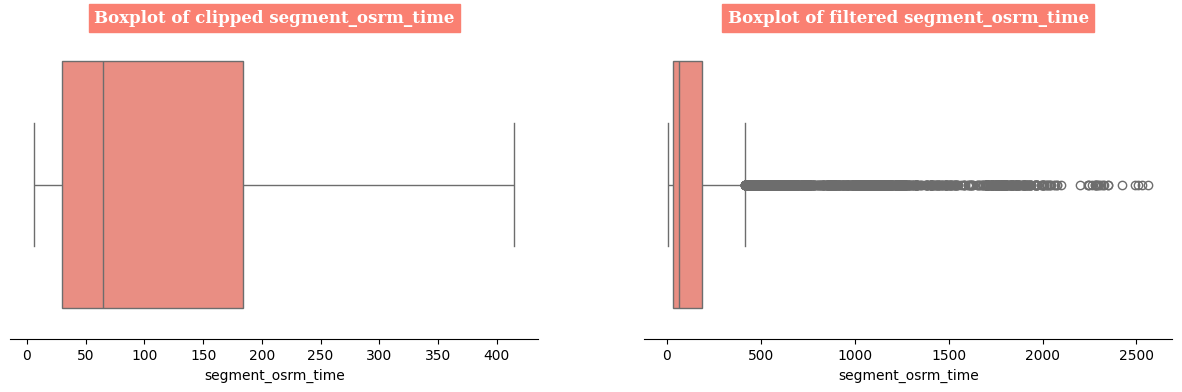

segment_osrm_distance
0                  1320.4733
1                    84.1894
2                  2545.2678
3                    19.8766
4                   146.7919
...                      ...
14782                64.8551
14783                16.0883
14784               104.8866
14785               223.5324
14786                80.5787

[14787 rows x 1 columns]

Clipped data of segment_osrm_distance


segment_osrm_distance
0                 492.533225
1                  84.189400
2                 492.533225
3                  19.876600
4                 146.791900
...                      ...
14782              64.855100
14783              16.088300
14784             104.886600
14785             223.532400
14786              80.578700

[14787 rows x 1 columns]


Filtered data of segment_osrm_distance


segment_osrm_distance
0                  1320.4733
1                    84.1894
2                  2545.2678
3                    19.8766
4                   146.7919
...                      ...
14782                64.8551
14783                16.0883
14784               104.8866
14785               223.5324
14786                80.5787

[14787 rows x 1 columns]

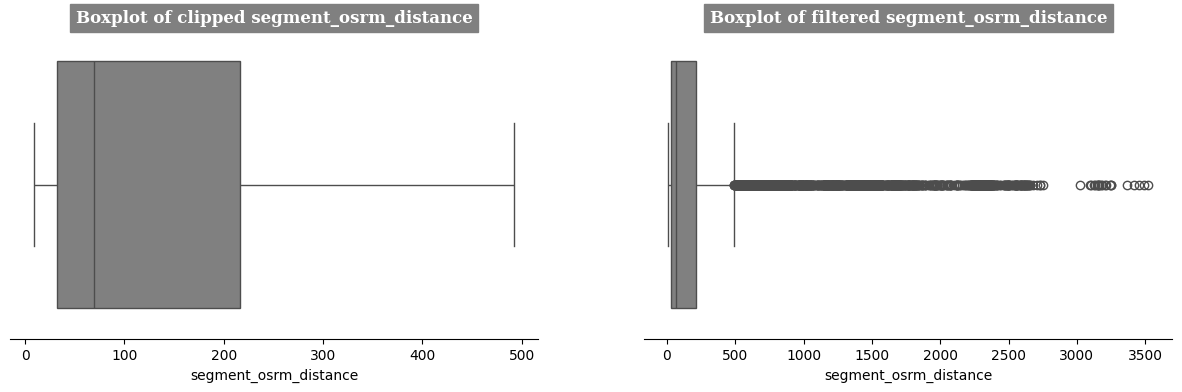

segment_actual_time_sum
0                       1548.0
1                        141.0
2                       3308.0
3                         59.0
4                        340.0
...                        ...
14782                     82.0
14783                     21.0
14784                    281.0
14785                    258.0
14786                    274.0

[14787 rows x 1 columns]

Clipped data of segment_actual_time_sum


segment_actual_time_sum
0                        811.0
1                        141.0
2                        811.0
3                         59.0
4                        340.0
...                        ...
14782                     82.0
14783                     21.0
14784                    281.0
14785                    258.0
14786                    274.0

[14787 rows x 1 columns]


Filtered data of segment_actual_time_sum


segment_actual_time_sum
0                       1548.0
1                        141.0
2                       3308.0
3                         59.0
4                        340.0
...                        ...
14782                     82.0
14783                     21.0
14784                    281.0
14785                    258.0
14786                    274.0

[14787 rows x 1 columns]

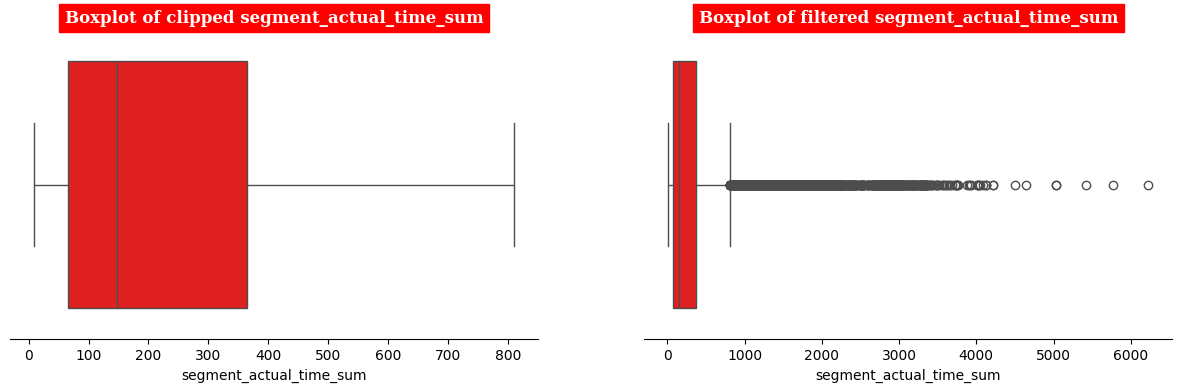

segment_osrm_time_sum
0                     1008.0
1                       65.0
2                     1941.0
3                       16.0
4                      115.0
...                      ...
14782                   62.0
14783                   11.0
14784                   88.0
14785                  221.0
14786                   67.0

[14787 rows x 1 columns]

Clipped data of segment_osrm_time_sum


segment_osrm_time_sum
0                      415.0
1                       65.0
2                      415.0
3                       16.0
4                      115.0
...                      ...
14782                   62.0
14783                   11.0
14784                   88.0
14785                  221.0
14786                   67.0

[14787 rows x 1 columns]


Filtered data of segment_osrm_time_sum


segment_osrm_time_sum
0                     1008.0
1                       65.0
2                     1941.0
3                       16.0
4                      115.0
...                      ...
14782                   62.0
14783                   11.0
14784                   88.0
14785                  221.0
14786                   67.0

[14787 rows x 1 columns]

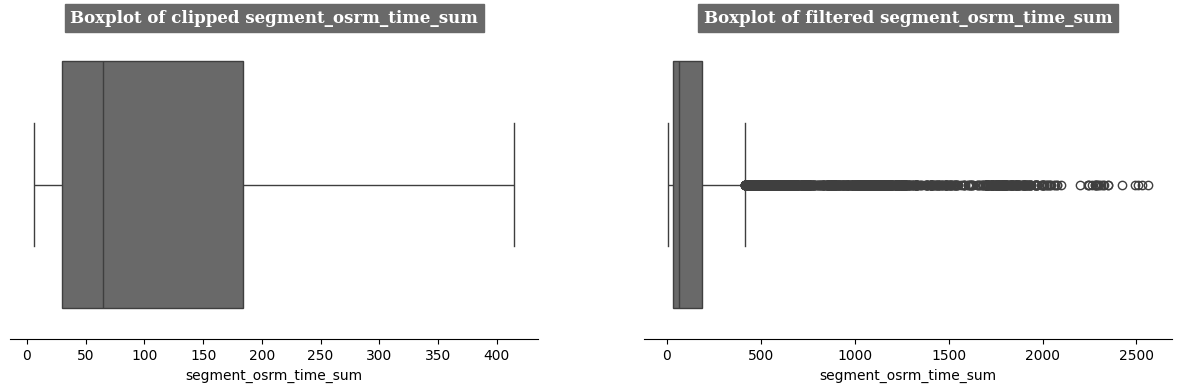

segment_osrm_distance_sum
0                      1320.4733
1                        84.1894
2                      2545.2678
3                        19.8766
4                       146.7919
...                          ...
14782                    64.8551
14783                    16.0883
14784                   104.8866
14785                   223.5324
14786                    80.5787

[14787 rows x 1 columns]

Clipped data of segment_osrm_distance_sum


segment_osrm_distance_sum
0                     492.533225
1                      84.189400
2                     492.533225
3                      19.876600
4                     146.791900
...                          ...
14782                  64.855100
14783                  16.088300
14784                 104.886600
14785                 223.532400
14786                  80.578700

[14787 rows x 1 columns]


Filtered data of segment_osrm_distance_sum


segment_osrm_distance_sum
0                      1320.4733
1                        84.1894
2                      2545.2678
3                        19.8766
4                       146.7919
...                          ...
14782                    64.8551
14783                    16.0883
14784                   104.8866
14785                   223.5324
14786                    80.5787

[14787 rows x 1 columns]

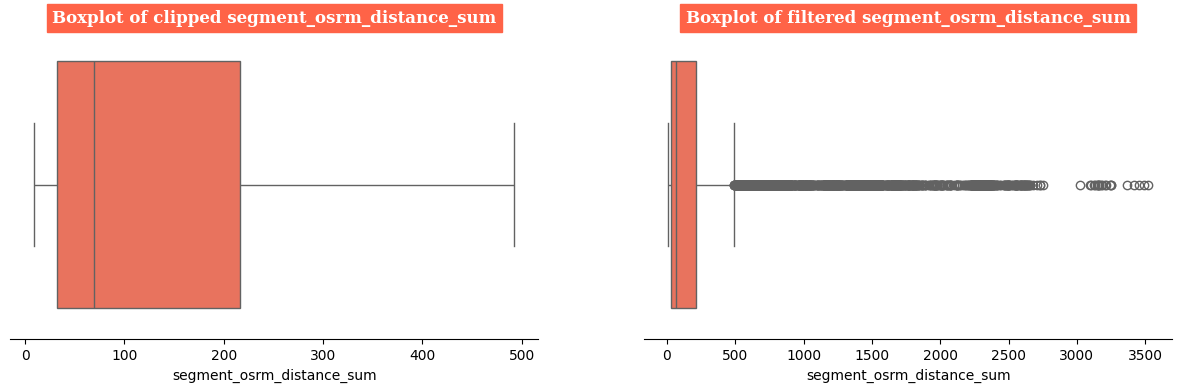

In [ ]:
#Outlier Removal

for i, col in enumerate(numerical_columns):

    data = trip_df[col]
    display(data.to_frame())


    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1


    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    clipped_data = np.clip(data, lower_bound, upper_bound)
    print(f'Clipped data of {col}')
    display(clipped_data.to_frame())
    print()

    # Plot boxplot of the clipped data
    plt.figure(figsize=(15, 4))
    plt.subplot(121)
    sns.boxplot(x=clipped_data, color=cp[i])
    sns.despine(left=True)
    plt.yticks([])
    plt.title(f'Boxplot of clipped {col}', fontfamily='serif', fontweight='bold', fontsize=12, backgroundcolor=cp[i], color='w')

    filtered_data = data.loc[(data >= lower_bound) | (data <= upper_bound)]
    print(f'Filtered data of {col}')
    display(filtered_data.to_frame())
    print()

    plt.subplot(122)
    sns.boxplot(x=filtered_data, color=cp[i])
    sns.despine(left=True)
    plt.yticks([])
    plt.title(f'Boxplot of filtered {col}', fontfamily='serif', fontweight='bold', fontsize=12, backgroundcolor=cp[i], color='w')

    plt.show()

**Understanding:**
Here we see that the data after removing outliers has outliers.

It has to be understood that q1 and q3 dont have to be always 25th percentile and 75th percentile.

Clipped data replaces the outlier values with specified values.
Here, proceeded with both clipped and filtered data(with reduced outliers) for further analysis.

In [ ]:
num_df = numerical_columns.copy()
num_df

od_time_diff_hour  start_scan_to_end_scan  \
0              37.668497                  2259.0   
1               3.026865                   180.0   
2              65.572709                  3933.0   
3               1.674916                   100.0   
4              11.972484                   717.0   
...                  ...                     ...   
14782           4.300482                   257.0   
14783           1.009842                    60.0   
14784           7.035331                   421.0   
14785           5.808548                   347.0   
14786           5.906793                   353.0   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                          824.732854       1562.0      717.0       991.3523   
1                           73.186911        143.0       68.0        85.1110   
2                         1927.404273       3347.0     1740.0      2354.0665   
3                           17.175274         59.0       15.0        19.6800   
4                          127.448500        341.0      117.0       146.7918   
...                               ...          ...        ...            ...   
14782                       57.762332         83.0       62.0        73.4630   
14783                       15.513784         21.0       12.0        16.0882   
14784                       38.684839        282.0       48.0        58.9037   
14785                      134.723836        264.0      179.0       171.1103   
14786                       66.081533        275.0       68.0        80.5787   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0                   1548.0             1008.0              1320.4733   
1                    141.0               65.0                84.1894   
2                   3308.0             1941.0              2545.2678   
3                     59.0               16.0                19.8766   
4                    340.0              115.0               146.7919   
...                    ...                ...                    ...   
14782                 82.0               62.0                64.8551   
14783                 21.0               11.0                16.0883   
14784                281.0               88.0               104.8866   
14785                258.0              221.0               223.5324   
14786                274.0               67.0                80.5787   

       segment_actual_time_sum  segment_osrm_time_sum  \
0                       1548.0                 1008.0   
1                        141.0                   65.0   
2                       3308.0                 1941.0   
3                         59.0                   16.0   
4                        340.0                  115.0   
...                        ...                    ...   
14782                     82.0                   62.0   
14783                     21.0                   11.0   
14784                    281.0                   88.0   
14785                    258.0                  221.0   
14786                    274.0                   67.0   

       segment_osrm_distance_sum  
0                      1320.4733  
1                        84.1894  
2                      2545.2678  
3                        19.8766  
4                       146.7919  
...                          ...  
14782                    64.8551  
14783                    16.0883  
14784                   104.8866  
14785                   223.5324  
14786                    80.5787  

[14787 rows x 12 columns]

In [ ]:
Q1 = np.percentile(num_df[num_cols], 25)
Q3 = np.percentile(num_df[num_cols], 75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

clipped_num_df = np.clip(num_df[num_cols], lower_bound, upper_bound)
display(clipped_num_df)

filtered_num_df = num_df[num_cols][(num_df[num_cols] >= lower_bound) | (num_df[num_cols] <= upper_bound)]
display(filtered_num_df)

od_time_diff_hour  start_scan_to_end_scan  \
0              37.668497              543.285287   
1               3.026865              180.000000   
2              65.572709              543.285287   
3               1.674916              100.000000   
4              11.972484              543.285287   
...                  ...                     ...   
14782           4.300482              257.000000   
14783           1.009842               60.000000   
14784           7.035331              421.000000   
14785           5.808548              347.000000   
14786           5.906793              353.000000   

       actual_distance_to_destination  actual_time   osrm_time  osrm_distance  \
0                          543.285287   543.285287  543.285287     543.285287   
1                           73.186911   143.000000   68.000000      85.111000   
2                          543.285287   543.285287  543.285287     543.285287   
3                           17.175274    59.000000   15.000000      19.680000   
4                          127.448500   341.000000  117.000000     146.791800   
...                               ...          ...         ...            ...   
14782                       57.762332    83.000000   62.000000      73.463000   
14783                       15.513784    21.000000   12.000000      16.088200   
14784                       38.684839   282.000000   48.000000      58.903700   
14785                      134.723836   264.000000  179.000000     171.110300   
14786                       66.081533   275.000000   68.000000      80.578700   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0               543.285287         543.285287             543.285287   
1               141.000000          65.000000              84.189400   
2               543.285287         543.285287             543.285287   
3                59.000000          16.000000              19.876600   
4               340.000000         115.000000             146.791900   
...                    ...                ...                    ...   
14782            82.000000          62.000000              64.855100   
14783            21.000000          11.000000              16.088300   
14784           281.000000          88.000000             104.886600   
14785           258.000000         221.000000             223.532400   
14786           274.000000          67.000000              80.578700   

       segment_actual_time_sum  segment_osrm_time_sum  \
0                   543.285287             543.285287   
1                   141.000000              65.000000   
2                   543.285287             543.285287   
3                    59.000000              16.000000   
4                   340.000000             115.000000   
...                        ...                    ...   
14782                82.000000              62.000000   
14783                21.000000              11.000000   
14784               281.000000              88.000000   
14785               258.000000             221.000000   
14786               274.000000              67.000000   

       segment_osrm_distance_sum  
0                     543.285287  
1                      84.189400  
2                     543.285287  
3                      19.876600  
4                     146.791900  
...                          ...  
14782                  64.855100  
14783                  16.088300  
14784                 104.886600  
14785                 223.532400  
14786                  80.578700  

[14787 rows x 12 columns]

od_time_diff_hour  start_scan_to_end_scan  \
0              37.668497                  2259.0   
1               3.026865                   180.0   
2              65.572709                  3933.0   
3               1.674916                   100.0   
4              11.972484                   717.0   
...                  ...                     ...   
14782           4.300482                   257.0   
14783           1.009842                    60.0   
14784           7.035331                   421.0   
14785           5.808548                   347.0   
14786           5.906793                   353.0   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                          824.732854       1562.0      717.0       991.3523   
1                           73.186911        143.0       68.0        85.1110   
2                         1927.404273       3347.0     1740.0      2354.0665   
3                           17.175274         59.0       15.0        19.6800   
4                          127.448500        341.0      117.0       146.7918   
...                               ...          ...        ...            ...   
14782                       57.762332         83.0       62.0        73.4630   
14783                       15.513784         21.0       12.0        16.0882   
14784                       38.684839        282.0       48.0        58.9037   
14785                      134.723836        264.0      179.0       171.1103   
14786                       66.081533        275.0       68.0        80.5787   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0                   1548.0             1008.0              1320.4733   
1                    141.0               65.0                84.1894   
2                   3308.0             1941.0              2545.2678   
3                     59.0               16.0                19.8766   
4                    340.0              115.0               146.7919   
...                    ...                ...                    ...   
14782                 82.0               62.0                64.8551   
14783                 21.0               11.0                16.0883   
14784                281.0               88.0               104.8866   
14785                258.0              221.0               223.5324   
14786                274.0               67.0                80.5787   

       segment_actual_time_sum  segment_osrm_time_sum  \
0                       1548.0                 1008.0   
1                        141.0                   65.0   
2                       3308.0                 1941.0   
3                         59.0                   16.0   
4                        340.0                  115.0   
...                        ...                    ...   
14782                     82.0                   62.0   
14783                     21.0                   11.0   
14784                    281.0                   88.0   
14785                    258.0                  221.0   
14786                    274.0                   67.0   

       segment_osrm_distance_sum  
0                      1320.4733  
1                        84.1894  
2                      2545.2678  
3                        19.8766  
4                       146.7919  
...                          ...  
14782                    64.8551  
14783                    16.0883  
14784                   104.8866  
14785                   223.5324  
14786                    80.5787  

[14787 rows x 12 columns]

In [ ]:
clipped_df_corr = clipped_num_df.corr()
clipped_df_corr

filtered_df_corr = filtered_num_df.corr()
filtered_df_corr

od_time_diff_hour  start_scan_to_end_scan  \
od_time_diff_hour                        1.000000                0.999837   
start_scan_to_end_scan                   0.999837                1.000000   
actual_distance_to_destination           0.918644                0.919159   
actual_time                              0.961223                0.961612   
osrm_time                                0.926973                0.927471   
osrm_distance                            0.924683                0.925205   
segment_actual_time                      0.961288                0.961634   
segment_osrm_time                        0.918921                0.919429   
segment_osrm_distance                    0.919665                0.920191   
segment_actual_time_sum                  0.961288                0.961634   
segment_osrm_time_sum                    0.918921                0.919429   
segment_osrm_distance_sum                0.919665                0.920191   

                                actual_distance_to_destination  actual_time  \
od_time_diff_hour                                     0.918644     0.961223   
start_scan_to_end_scan                                0.919159     0.961612   
actual_distance_to_destination                        1.000000     0.953920   
actual_time                                           0.953920     1.000000   
osrm_time                                             0.993568     0.958781   
osrm_distance                                         0.997268     0.959398   
segment_actual_time                                   0.952987     0.999989   
segment_osrm_time                                     0.987542     0.954044   
segment_osrm_distance                                 0.993068     0.957151   
segment_actual_time_sum                               0.952987     0.999989   
segment_osrm_time_sum                                 0.987542     0.954044   
segment_osrm_distance_sum                             0.993068     0.957151   

                                osrm_time  osrm_distance  segment_actual_time  \
od_time_diff_hour                0.926973       0.924683             0.961288   
start_scan_to_end_scan           0.927471       0.925205             0.961634   
actual_distance_to_destination   0.993568       0.997268             0.952987   
actual_time                      0.958781       0.959398             0.999989   
osrm_time                        1.000000       0.997588             0.957955   
osrm_distance                    0.997588       1.000000             0.958540   
segment_actual_time              0.957955       0.958540             1.000000   
segment_osrm_time                0.993263       0.991802             0.953214   
segment_osrm_distance            0.991624       0.994712             0.956293   
segment_actual_time_sum          0.957955       0.958540             1.000000   
segment_osrm_time_sum            0.993263       0.991802             0.953214   
segment_osrm_distance_sum        0.991624       0.994712             0.956293   

                                segment_osrm_time  segment_osrm_distance  \
od_time_diff_hour                        0.918921               0.919665   
start_scan_to_end_scan                   0.919429               0.920191   
actual_distance_to_destination           0.987542               0.993068   
actual_time                              0.954044               0.957151   
osrm_time                                0.993263               0.991624   
osrm_distance                            0.991802               0.994712   
segment_actual_time                      0.953214               0.956293   
segment_osrm_time                        1.000000               0.996098   
segment_osrm_distance                    0.996098               1.000000   
segment_actual_time_sum                  0.953214               0.956293   
segment_osrm_time_sum                    1.000000               0.996098   
segment_osrm_distance_sum           

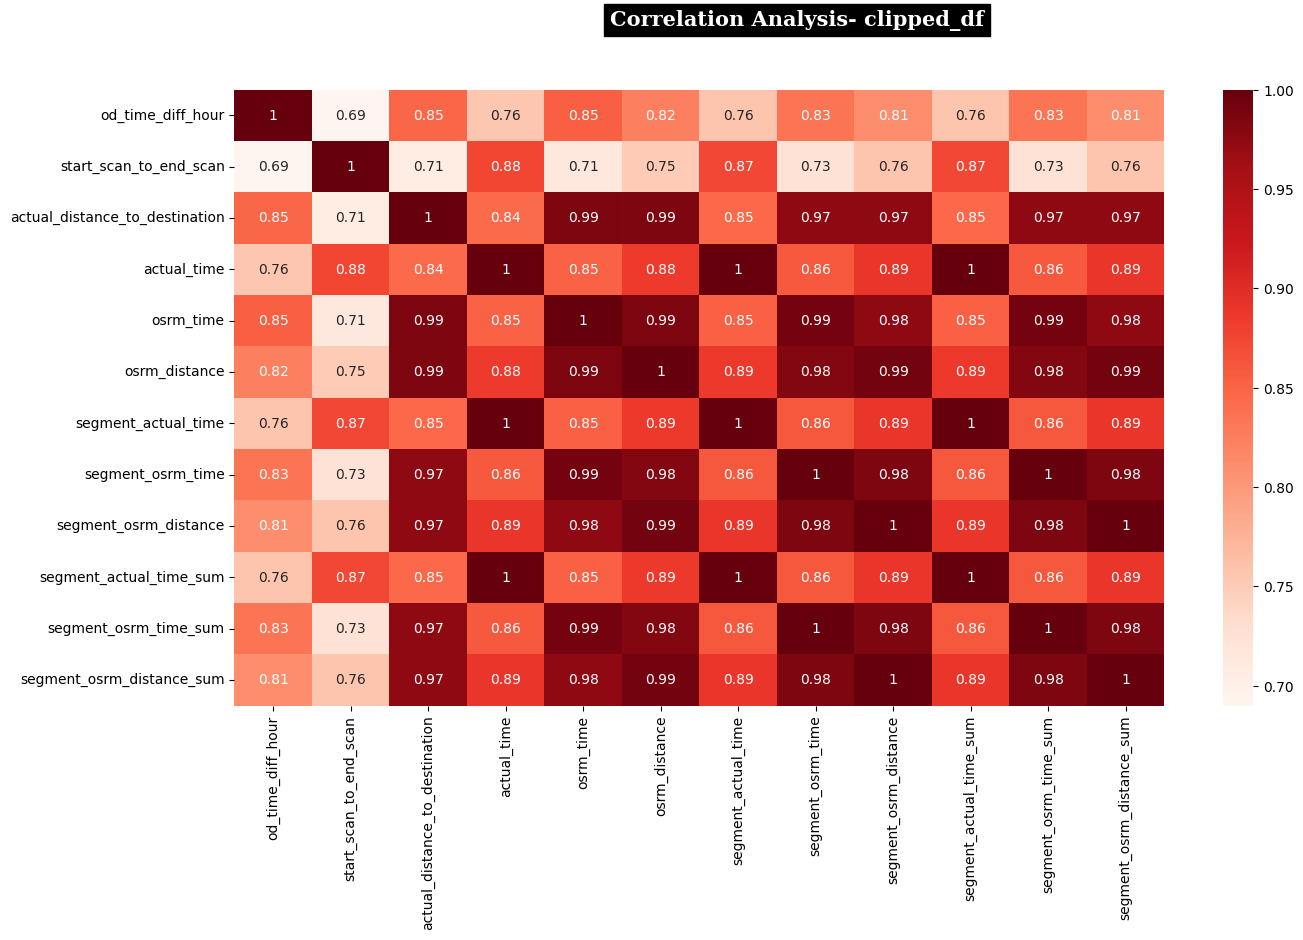

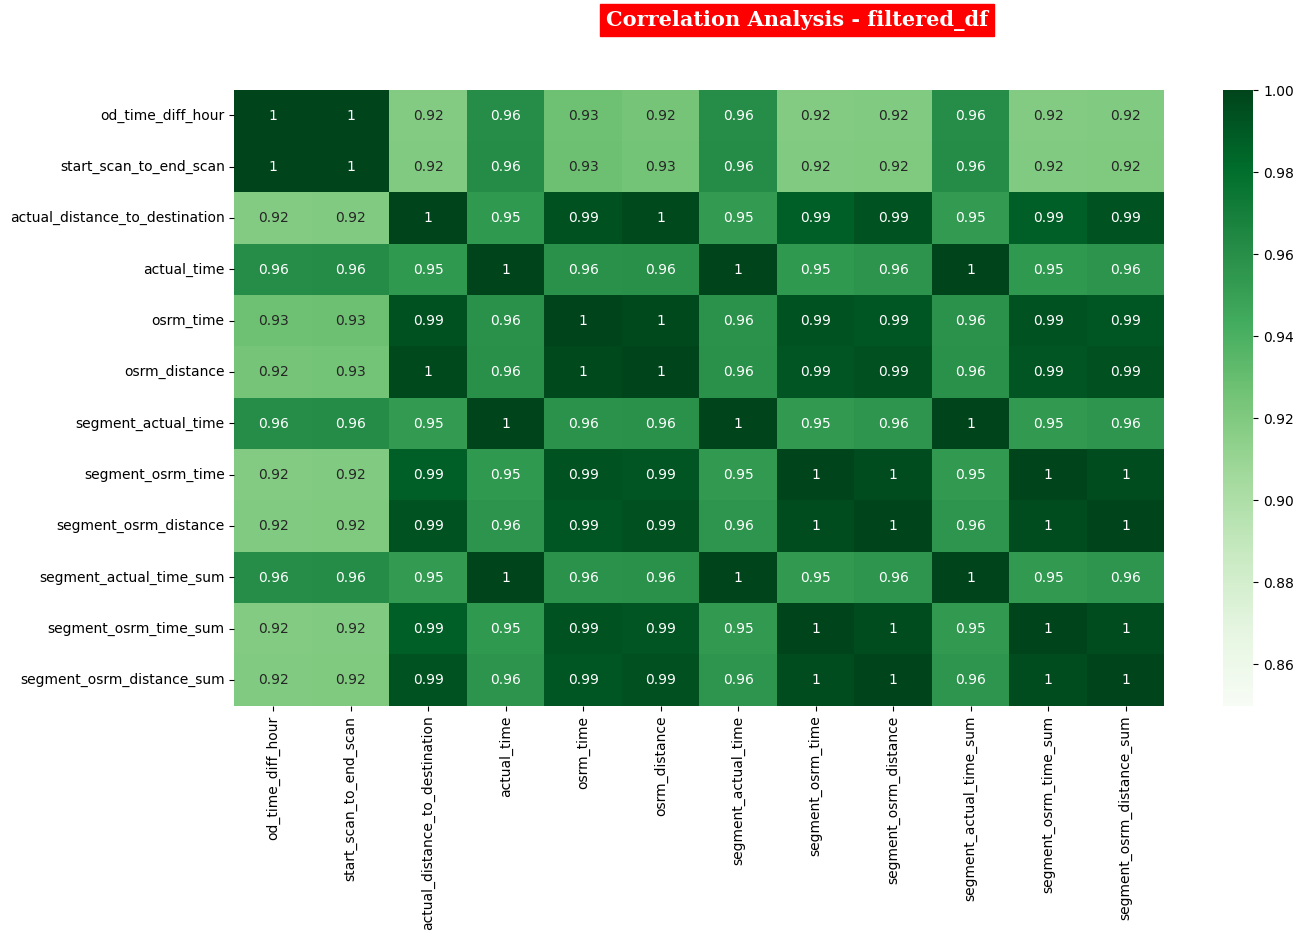

In [ ]:
plt.figure(figsize = (15,8))
plt.suptitle(f'Correlation Analysis- clipped_df',fontfamily='serif',fontweight='bold',fontsize=15,backgroundcolor='k',color='w')
sns.heatmap(data = clipped_df_corr,vmin=0.69, annot = True, cmap='Reds')
plt.show()

plt.figure(figsize = (15,8))
plt.suptitle(f'Correlation Analysis - filtered_df',fontfamily='serif',fontweight='bold',fontsize=15,backgroundcolor='r',color='w')
sns.heatmap(data = filtered_df_corr,vmin=0.85, annot = True, cmap='Greens')
plt.show()

Very High Correlation exists between all the numerical columns.

In [ ]:
trip_df.skew(numeric_only = True)

od_time_diff_hour                  2.89355
trip_creation_month               2.337439
trip_creation_year                     0.0
trip_creation_day                -0.695241
trip_creation_hour               -0.206092
trip_creation_weekday             0.065904
trip_creation_week                0.181308
start_scan_to_end_scan            2.895337
actual_distance_to_destination    3.562931
actual_time                       3.375178
osrm_time                         3.455256
osrm_distance                     3.553619
segment_actual_time               3.372042
segment_osrm_time                 3.602915
segment_osrm_distance             3.714017
segment_actual_time_sum           3.372042
segment_osrm_time_sum             3.602915
segment_osrm_distance_sum         3.714017
trip_creation_dayofdate          -0.695241
dtype: Float64

We can see that Many of the data is Right-Skewed.

# **One-Hot encoding**

In [ ]:
categorical_cols = ['data','route_type']

In [ ]:
# one hot encoding the categorical features
ohe = OneHotEncoder(sparse_output=False)
encoded_cat_cols = ohe.fit_transform(trip_df[categorical_cols])

categorical_encoded_df = pd.DataFrame(encoded_cat_cols, columns=ohe.get_feature_names_out(categorical_cols))
display(categorical_encoded_df)

encoded_df = pd.concat([trip_df,categorical_encoded_df],axis=1)
encoded_df

data_test  data_training  route_type_Carting  route_type_FTL
0            0.0            1.0                 0.0             1.0
1            0.0            1.0                 1.0             0.0
2            0.0            1.0                 0.0             1.0
3            0.0            1.0                 1.0             0.0
4            0.0            1.0                 0.0             1.0
...          ...            ...                 ...             ...
14782        1.0            0.0                 1.0             0.0
14783        1.0            0.0                 1.0             0.0
14784        1.0            0.0                 1.0             0.0
14785        1.0            0.0                 1.0             0.0
14786        1.0            0.0                 0.0             1.0

[14787 rows x 4 columns]

trip_uuid      data route_type  \
0      trip-153671041653548748  training        FTL   
1      trip-153671042288605164  training    Carting   
2      trip-153671043369099517  training        FTL   
3      trip-153671046011330457  training    Carting   
4      trip-153671052974046625  training        FTL   
...                        ...       ...        ...   
14782  trip-153861095625827784      test    Carting   
14783  trip-153861104386292051      test    Carting   
14784  trip-153861106442901555      test    Carting   
14785  trip-153861115439069069      test    Carting   
14786  trip-153861118270144424      test        FTL   

                   od_start_time                od_end_time  \
0     2018-09-12 16:39:46.858469 2018-09-12 16:39:46.858469   
1     2018-09-12 02:03:09.655591 2018-09-12 02:03:09.655591   
2     2018-09-14 03:40:17.106733 2018-09-14 03:40:17.106733   
3     2018-09-12 00:01:00.113710 2018-09-12 01:41:29.809822   
4     2018-09-12 00:02:09.740725 2018-09-12 03:54:43.114421   
...                          ...                        ...   
14782 2018-10-03 23:55:56.258533 2018-10-04 06:41:25.409035   
14783 2018-10-03 23:57:23.863155 2018-10-04 00:57:59.294434   
14784 2018-10-04 02:51:27.075797 2018-10-04 02:51:27.075797   
14785 2018-10-03 23:59:14.390954 2018-10-04 02:29:04.272194   
14786 2018-10-04 03:58:40.726547 2018-10-04 03:58:40.726547   

       od_time_diff_hour         trip_creation_time  trip_creation_month  \
0              37.668497 2018-09-12 00:00:16.535741                    9   
1               3.026865 2018-09-12 00:00:22.886430                    9   
2              65.572709 2018-09-12 00:00:33.691250                    9   
3               1.674916 2018-09-12 00:01:00.113710                    9   
4              11.972484 2018-09-12 00:02:09.740725                    9   
...                  ...                        ...                  ...   
14782           4.300482 2018-10-03 23:55:56.258533                   10   
14783           1.009842 2018-10-03 23:57:23.863155                   10   
14784           7.035331 2018-10-03 23:57:44.429324                   10   
14785           5.808548 2018-10-03 23:59:14.390954                   10   
14786           5.906793 2018-10-03 23:59:42.701692                   10   

       trip_creation_year  trip_creation_day  ...  destination_place  \
0                    2018                 12  ...        Bilaspur_HB   
1                    2018                 12  ...         ShntiSgr_D   
2                    2018                 12  ...         Mehmdpur_H   
3                    2018                 12  ...          MiraRd_IP   
4                    2018                 12  ...             Hospet   
...                   ...                ...  ...                ...   
14782                2018                  3  ...                 DC   
14783                2018                  3  ...         Blbgarh_DC   
14784                2018                  3  ...        Central_H_6   
14785                2018                  3  ...         Busstand_D   
14786                2018                  3  ...                 Dc   

                                                corridor  \
0      Kanpur_Central_H_6 (Uttar Pradesh) <---> Gurga...   
1      Doddablpur_ChikaDPP_D (Karnataka) <---> Chikbl...   
2      Gurgaon_Bilaspur_HB (Haryana) <---> Chandigarh...   
3      Mumbai Hub (Maharashtra) <---> Mumbai_MiraRd_I...   
4        Bellary_Dc (Karnataka) <---> Hospet (Karnataka)   
...                                                  ...   
14782  Chandigarh_Mehmdpur_H (Punjab) <---> Zirakpur_...   
14783  FBD_Balabhgarh_DPC (Haryana) <---> Faridabad_B...   
14784  Kanpur_GovndNgr_DC (Uttar Pradesh) <---> Kanpu...   
14785  Tirunelveli_VdkkuSrt_I (Tamil Nadu) <---> Eral...   
14786  Sandur_WrdN1DPP_D (Karnataka) <---> Bellary_Dc...   

                                          state_corridor  \
0           Uttar Pradesh--Kanpur <---> Hary

# **Minmax scaler**

Most appropriate since the data is not gaussian

In [ ]:
# Normalizing/Standardizing the numerical features using MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaled_numerical = min_max_scaler.fit_transform(trip_df[num_cols])

# Converting the scaled features back to a dataframe
min_max_scaled_df = pd.DataFrame(min_max_scaled_numerical, columns=num_cols)
min_max_scaled_df

od_time_diff_hour  start_scan_to_end_scan  \
0               0.284016                0.283937   
1               0.020082                0.019937   
2               0.496617                0.496508   
3               0.009782                0.009778   
4               0.088239                0.088127   
...                  ...                     ...   
14782           0.029786                0.029714   
14783           0.004715                0.004698   
14784           0.050623                0.050540   
14785           0.041276                0.041143   
14786           0.042024                0.041905   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                            0.374613     0.248242   0.350938       0.346972   
1                            0.029476     0.021419   0.030602       0.026859   
2                            0.880999     0.533568   0.855874       0.828325   
3                            0.003753     0.007992   0.004442       0.003747   
4                            0.054395     0.053069   0.054788       0.048647   
...                               ...          ...        ...            ...   
14782                        0.022392     0.011829   0.027641       0.022745   
14783                        0.002990     0.001918   0.002962       0.002478   
14784                        0.013631     0.043638   0.020731       0.017602   
14785                        0.057736     0.040761   0.085390       0.057237   
14786                        0.026213     0.042519   0.030602       0.025258   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0                 0.247388           0.391712               0.373134   
1                 0.021218           0.023065               0.021373   
2                 0.530301           0.756450               0.721625   
3                 0.008037           0.003909               0.003074   
4                 0.053207           0.042611               0.039185   
...                    ...                ...                    ...   
14782             0.011734           0.021892               0.015872   
14783             0.001929           0.001955               0.001996   
14784             0.043723           0.032056               0.027262   
14785             0.040026           0.084050               0.061020   
14786             0.042598           0.023847               0.020346   

       segment_actual_time_sum  segment_osrm_time_sum  \
0                     0.247388               0.391712   
1                     0.021218               0.023065   
2                     0.530301               0.756450   
3                     0.008037               0.003909   
4                     0.053207               0.042611   
...                        ...                    ...   
14782                 0.011734               0.021892   
14783                 0.001929               0.001955   
14784                 0.043723               0.032056   
14785                 0.040026               0.084050   
14786                 0.042598               0.023847   

       segment_osrm_distance_sum  
0                       0.373134  
1                       0.021373  
2                       0.721625  
3                       0.003074  
4                       0.039185  
...                          ...  
14782                   0.015872  
14783                   0.001996  
14784                   0.027262  
14785                   0.061020  
14786                   0.020346  

[14787 rows x 12 columns]

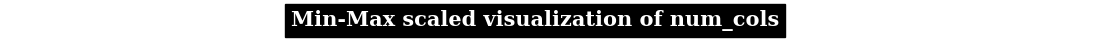

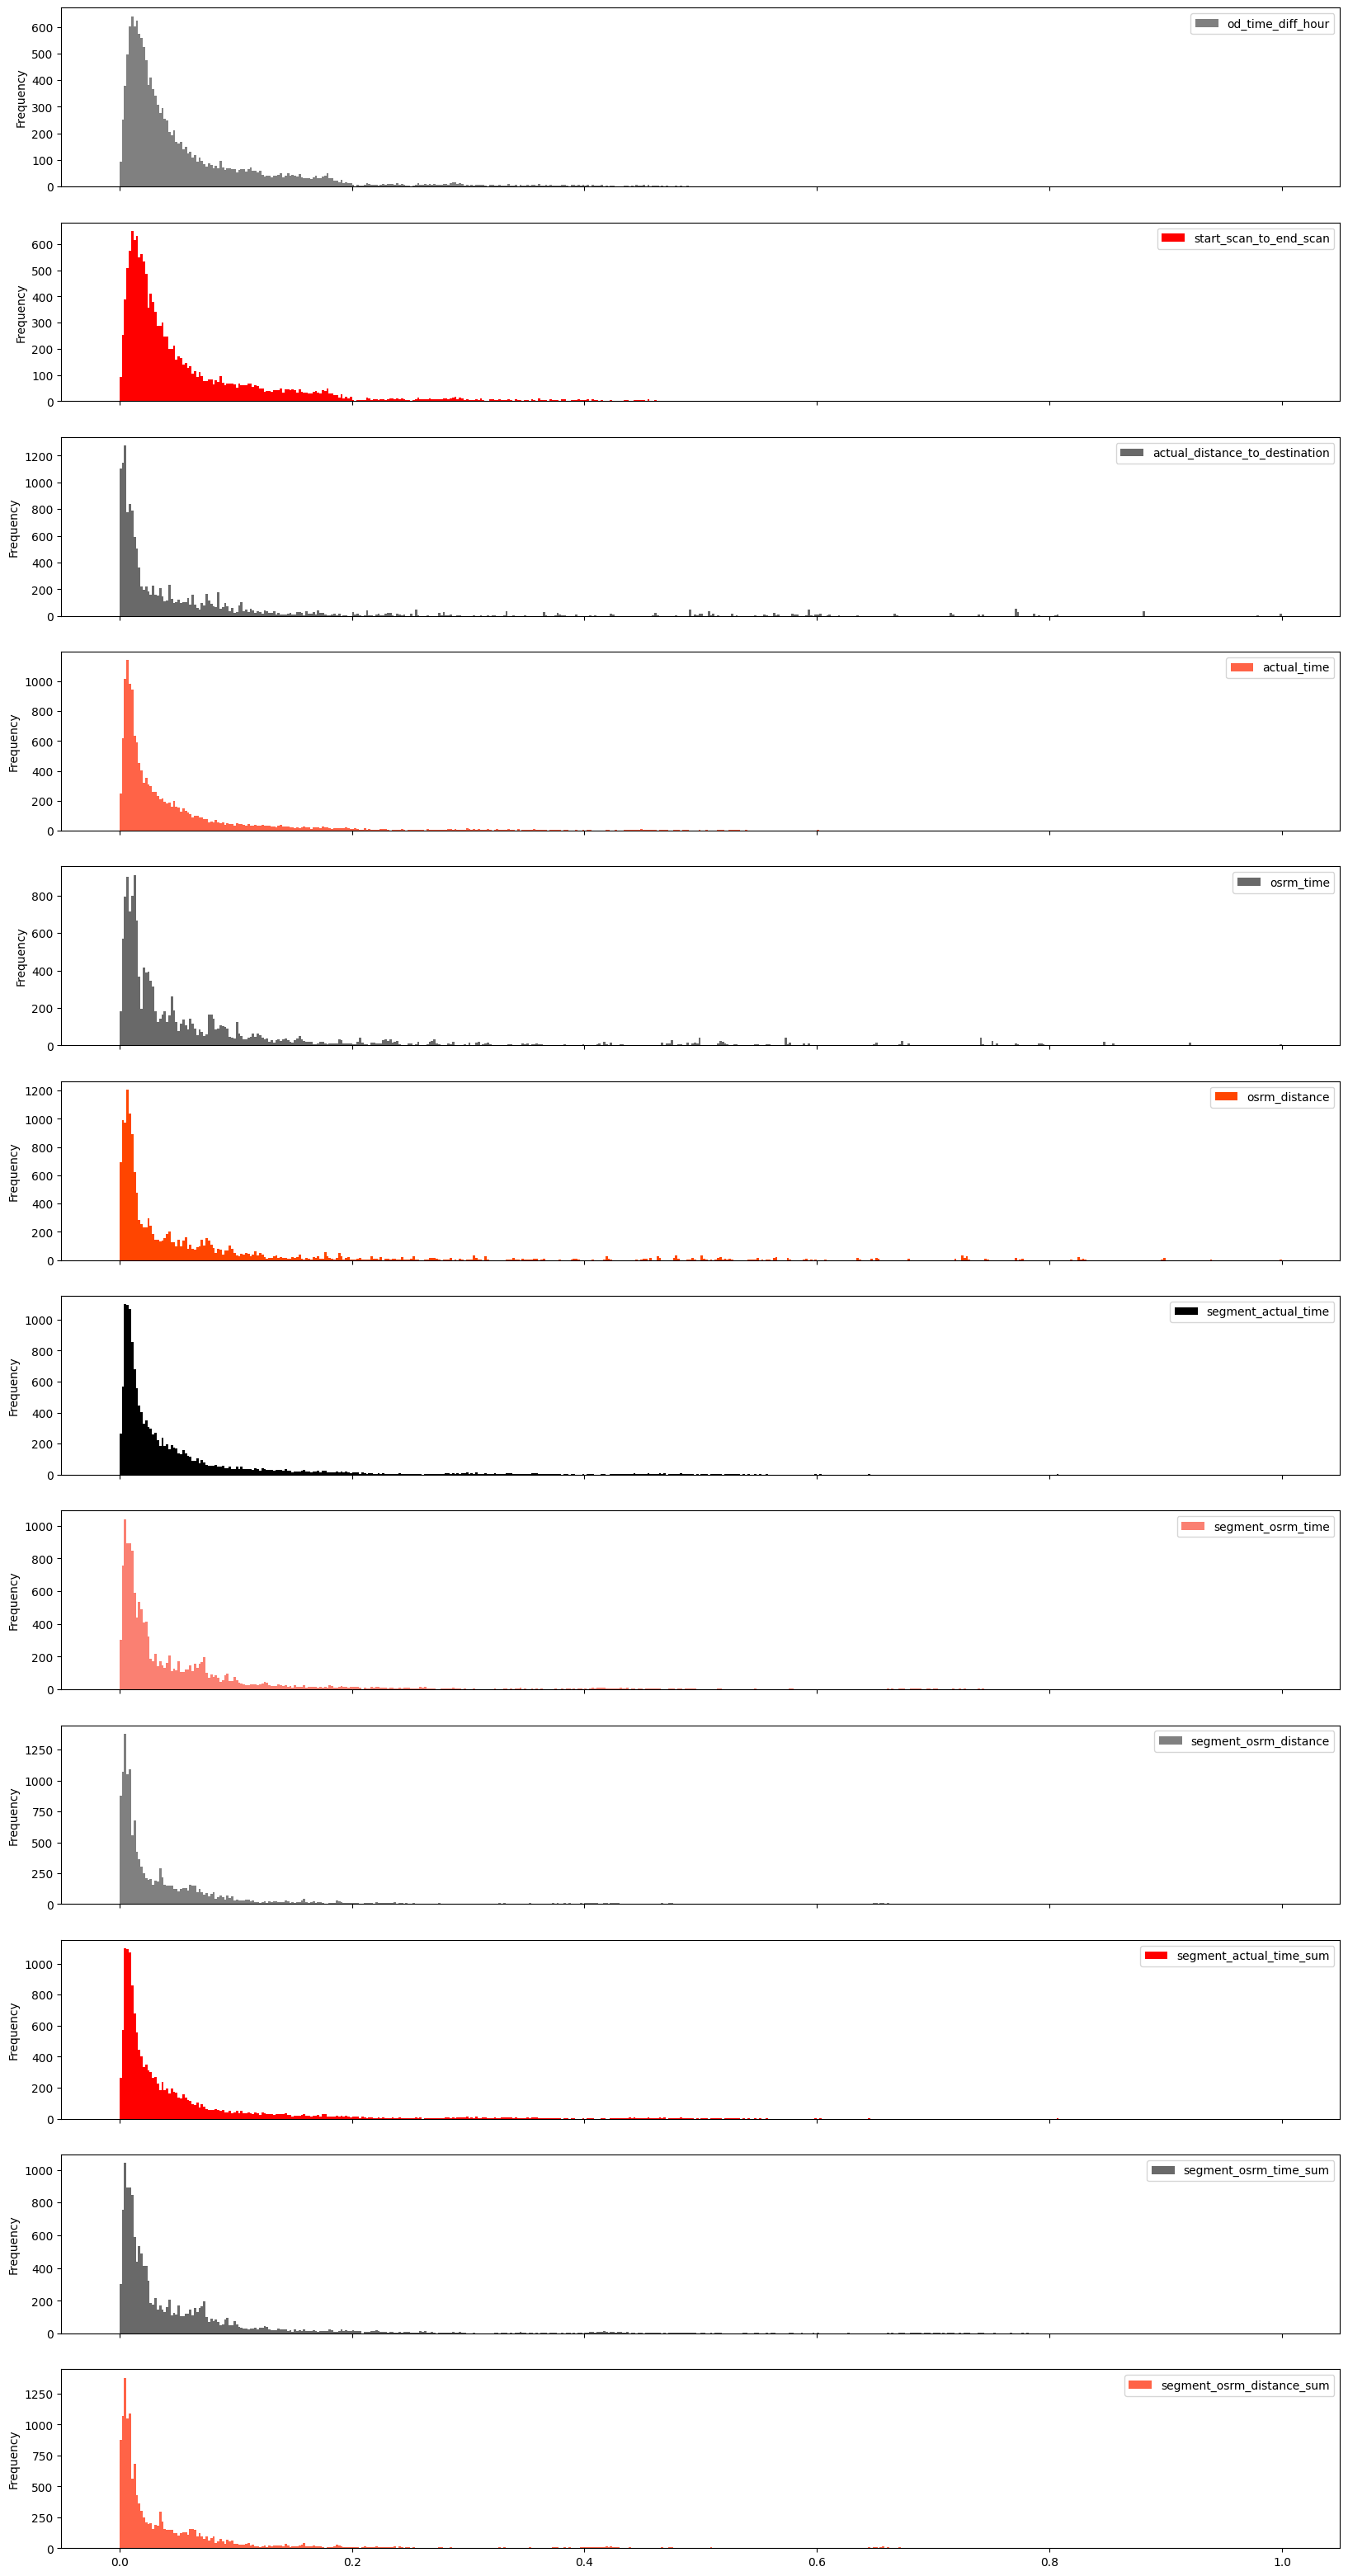

In [ ]:
plt.figure(figsize=(14,0.05))
plt.axis('off')
plt.suptitle(f'Min-Max scaled visualization of num_cols',fontfamily='serif',fontweight='bold',fontsize=15,backgroundcolor='k',color='w')
min_max_scaled_df.plot(kind='hist', figsize=(20,40),subplots=True,color=cp,bins=500)
plt.show()

In [ ]:
# Standardization works only with data which follows normal distribution
# Standardizing the numerical features using StandardScaler
std_scaler = StandardScaler()
std_scaled = std_scaler.fit_transform(trip_df[num_cols])

# Converting the scaled features back to a dataframe
std_scaled_df = pd.DataFrame(std_scaled, columns=num_cols)
std_scaled_df

od_time_diff_hour  start_scan_to_end_scan  \
0               2.625886                2.627598   
1              -0.529518               -0.530859   
2               5.167598                5.170772   
3              -0.652664               -0.652397   
4               0.285312                0.284962   
...                  ...                     ...   
14782          -0.413508               -0.413880   
14783          -0.713243               -0.713166   
14784          -0.164399               -0.164728   
14785          -0.276143               -0.277150   
14786          -0.267194               -0.268034   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                            2.162548     2.147277   2.048290       2.125107   
1                           -0.297563    -0.379887  -0.342571      -0.320538   
2                            5.772034     5.326268   5.816936       5.802622   
3                           -0.480911    -0.529486  -0.537818      -0.497115   
4                           -0.119943    -0.027259  -0.162059      -0.154082   
...                               ...          ...        ...            ...   
14782                       -0.348054    -0.486744  -0.364674      -0.351972   
14783                       -0.486350    -0.597162  -0.548870      -0.506808   
14784                       -0.410502    -0.132335  -0.416249      -0.391263   
14785                       -0.096128    -0.164392   0.066344      -0.088455   
14786                       -0.320822    -0.144802  -0.342571      -0.332769   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0                 2.147833           2.629714               2.633597   
1                -0.381163          -0.367090              -0.332307   
2                 5.311326           5.594737               5.571936   
3                -0.528553          -0.522809              -0.486596   
4                -0.023473          -0.208192              -0.182120   
...                    ...                ...                    ...   
14782            -0.487212          -0.376623              -0.378690   
14783            -0.596856          -0.538699              -0.495684   
14784            -0.129522          -0.293997              -0.282653   
14785            -0.170863           0.128670               0.001984   
14786            -0.142104          -0.360734              -0.340969   

       segment_actual_time_sum  segment_osrm_time_sum  \
0                     2.147833               2.629714   
1                    -0.381163              -0.367090   
2                     5.311326               5.594737   
3                    -0.528553              -0.522809   
4                    -0.023473              -0.208192   
...                        ...                    ...   
14782                -0.487212              -0.376623   
14783                -0.596856              -0.538699   
14784                -0.129522              -0.293997   
14785                -0.170863               0.128670   
14786                -0.142104              -0.360734   

       segment_osrm_distance_sum  
0                       2.633597  
1                      -0.332307  
2                       5.571936  
3                      -0.486596  
4                      -0.182120  
...                          ...  
14782                  -0.378690  
14783                  -0.495684  
14784                  -0.282653  
14785                   0.001984  
14786                  -0.340969  

[14787 rows x 12 columns]

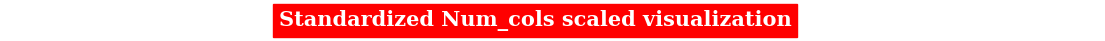

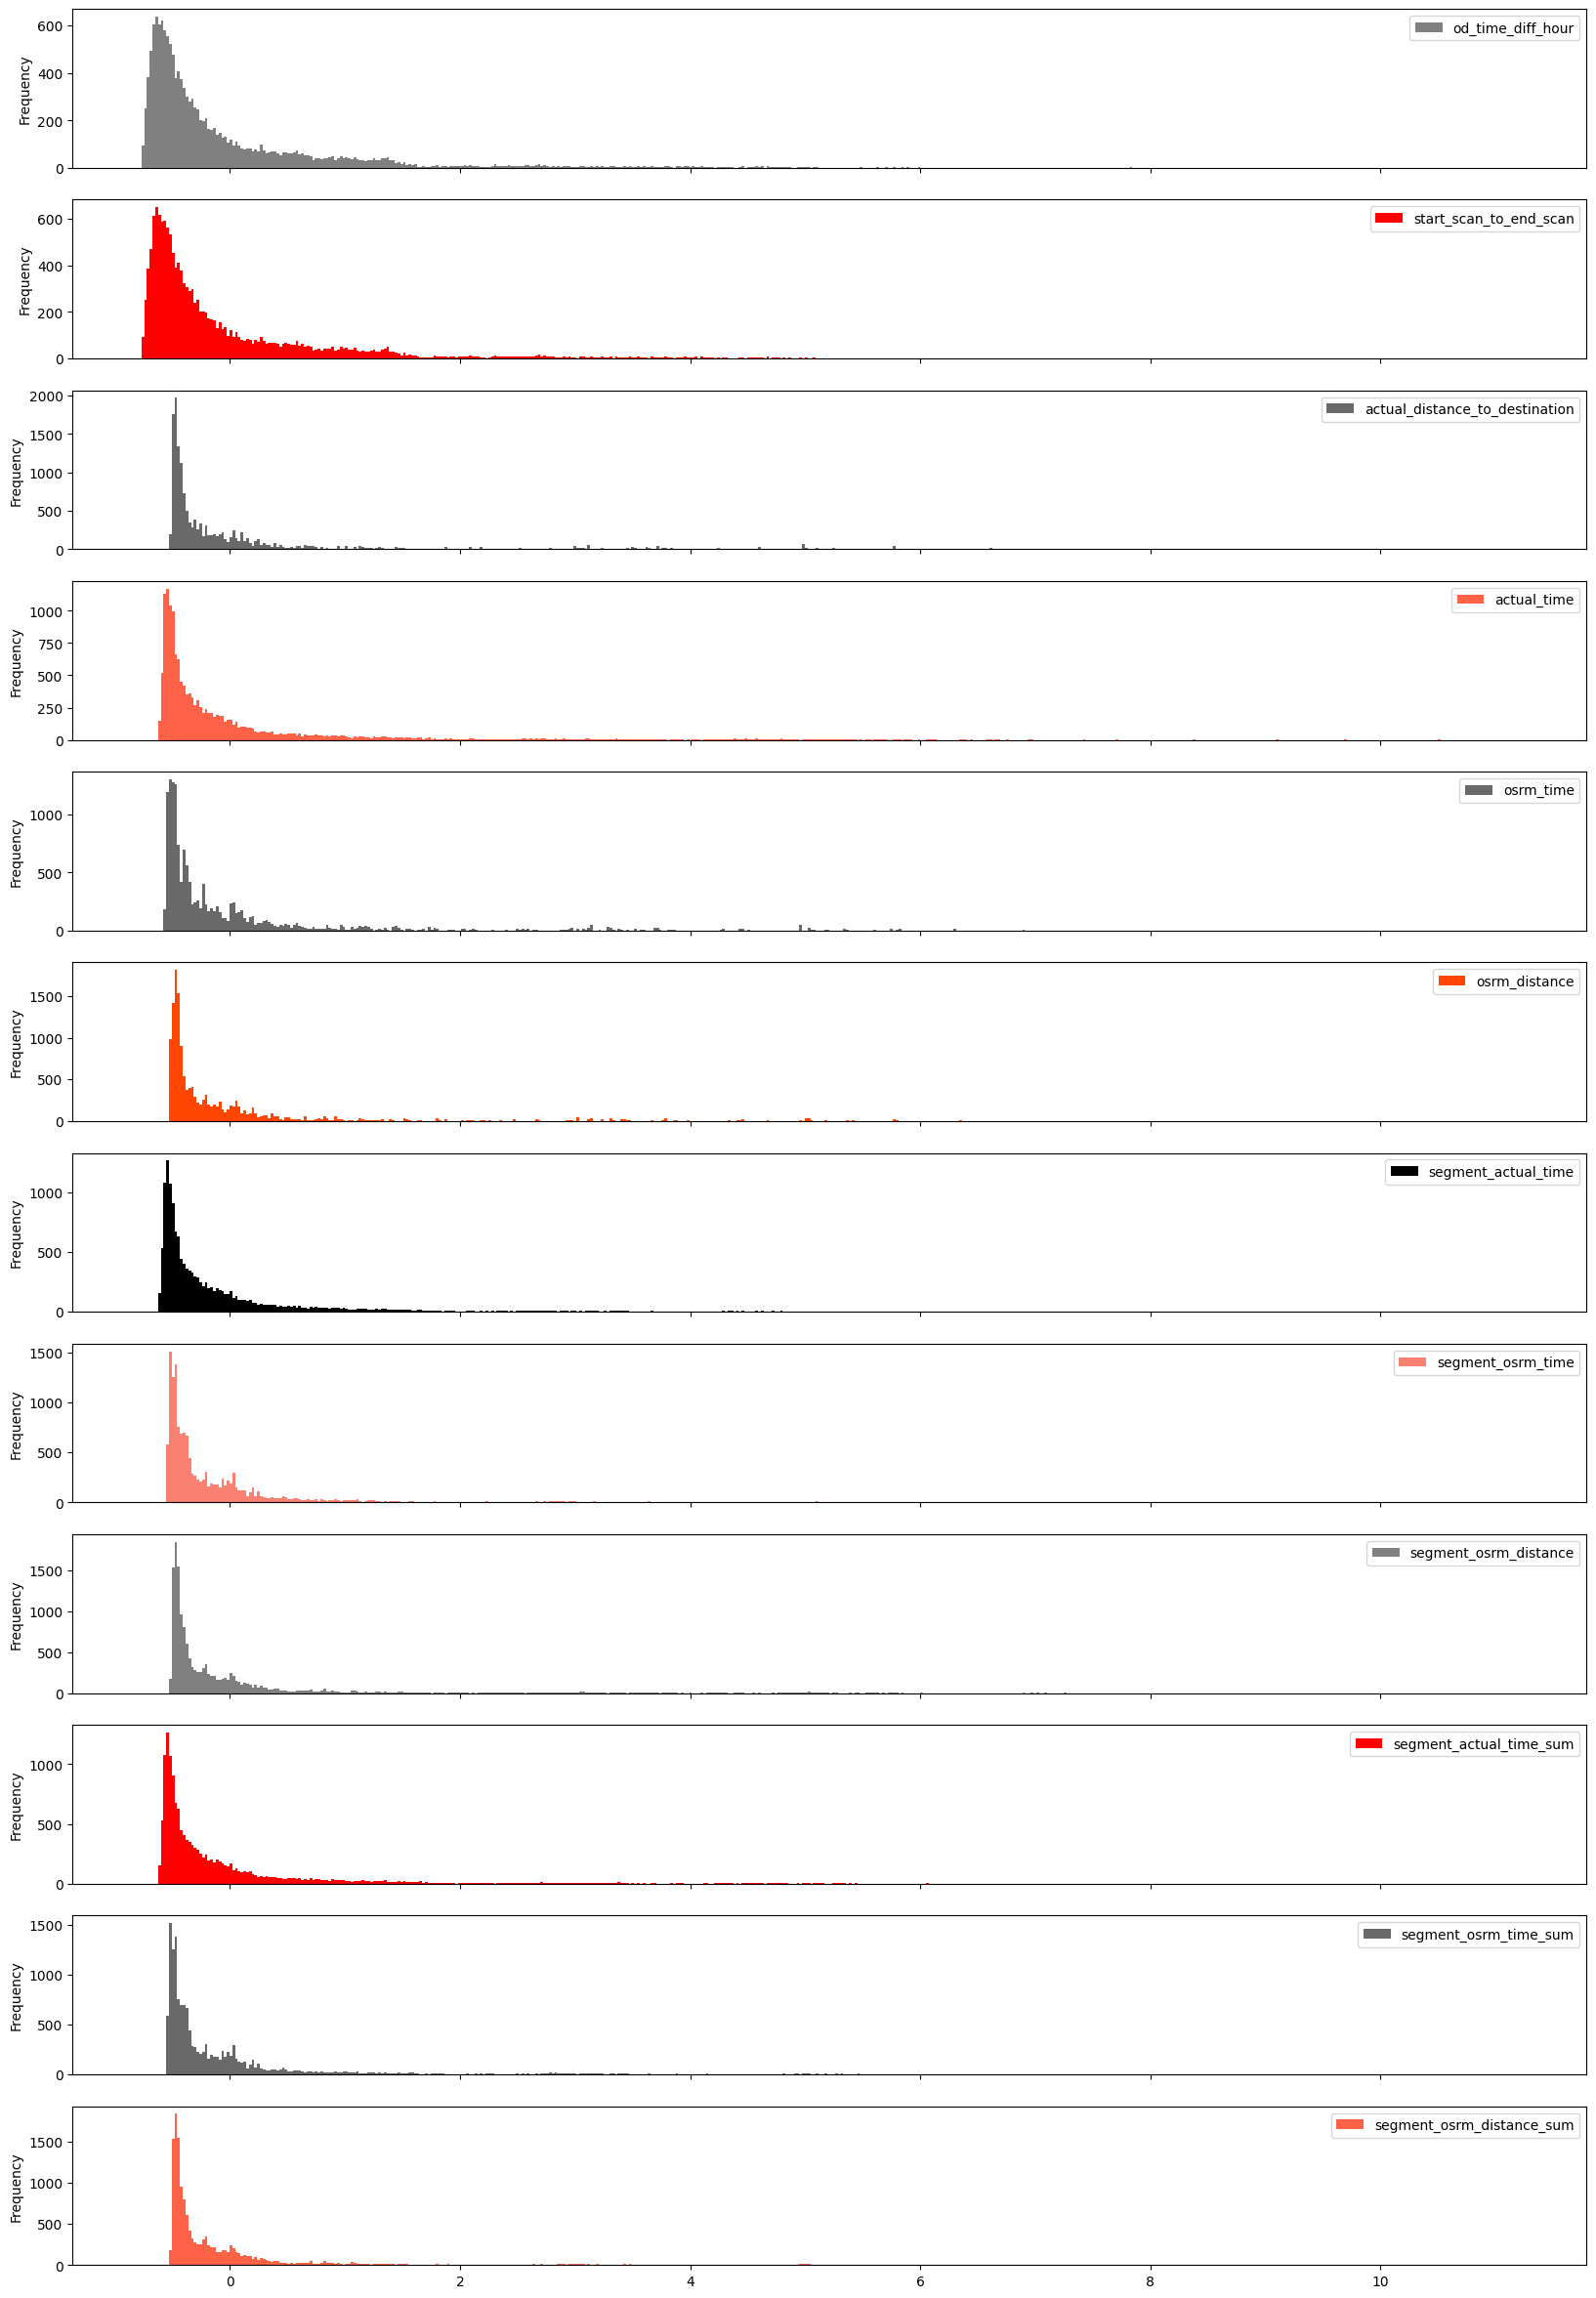

In [ ]:
plt.figure(figsize=(14,0.05))
plt.axis('off')
plt.suptitle(f'Standardized Num_cols scaled visualization',fontfamily='serif',fontweight='bold',fontsize=15,backgroundcolor='r',color='w')
std_scaled_df.plot(kind='hist', figsize=(20,30),subplots=True,color=cp,bins=500)
plt.show()

# **Hypothesis Testing**


Perform hypothesis testing / visual analysis between :

actual_time aggregated value and OSRM time aggregated value.

actual_time aggregated value and segment actual time aggregated value.

OSRM distance aggregated value and segment OSRM distance aggregated value.

OSRM time aggregated value and segment OSRM time aggregated value.

Note: Aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid.


**Assumptions of T-Test**

The sample size should be less than 30.

The population variance is unknown.

The population mean and standard deviation are finite.

The means of the two populations being compared should follow normal distributions.

If using Student's original definition of the t-test, the two populations being compared should have the same variance.

If the sample sizes in the two groups being compared are equal, Student's original t-test is highly robust to the presence of unequal variances.

**STEP-1 : Set up Null Hypothesis**

Null Hypothesis ( Ho ) - There is no significant difference in the mean values between column1 and column2

Alternate Hypothesis ( Ha ) - There is a significant difference in the mean values between column1 and column2


**STEP-2 : Checking for basic assumpitons for the hypothesis**

Distribution check using QQ Plot & prob Plot

Confirmation by Shapiro-wilks Test

Confirmation by Anderson-darling Test

Homogeneity of Variances using Levene's test

Normality checks

**STEP-3: Define Test statistics; Distribution of T under Ho.**

We know that the test statistic while performing a T-Test follows T-distribution.
for independent variables:
>If data follows normal distribution we go with ttest_ind
>Else we will go with Mannwhitney_u test (Non - Parametric test)

for dependent variables: (paired T-test)
>If data follows normal distribution we go with ttest_rel
>Else we will go with Wilcoxon signed rank test (Non - Parametric test)

**STEP-4: Decide the kind of test.**

We will be performing Two tailed t-test

**STEP-5: Compute the p-value and fix value of alpha.**

we will be computing the t-stat value using the ttest function using scipy.stats.

We set our alpha to be 0.05 (i.e) confidence level = 95%

**STEP-6: Compare p-value and alpha.**

Based on p-value, we will accept or reject H0.

p-val < alpha : Reject Ho

p-val > alpha : Accept Ho

In [ ]:
class Normality_check:
    def __init__(self, name, col):
        self.name = name
        self.col = col

    def shapiro_and_anderson(self):
        print(f"Performing SHAPIRO & ANDERSON-DARLING TEST for {self.name} column")
        print()

        # Shapiro-Wilk Test
        print('Shapiro-Wilk Test')
        shapiro_stat, p_val = shapiro(self.col)
        if p_val < 0.05:
            print(f'{self.name} - Data is not Gaussian')
        else:
            print(f'{self.name} - Data is Gaussian')
        print()

        # Using Anderson-Darling Test
        print("Since Shapiro-Wilk test is sensitive, we go with Anderson-Darling Test")
        result = anderson(self.col)
        if result.statistic > result.critical_values[2]:
            print(f"{self.name} - Data does not follow a normal distribution.")
        else:
            print(f"{self.name} - Data follows a normal distribution.")
        print()
        print('-'*50)

    def boxcox_transformation(self):
        print(f'Performing BOXCOX transformation on {self.name} column')
        transformed_data, best_lambda = boxcox(self.col)
        self.col = transformed_data  # Update column data with transformed data
        self.shapiro_and_anderson()  # Calling shapiro_and_anderson method after transformation



In [ ]:
def levene_test(name1,name2,col1,col2):

    levene_stat, p_value = levene(col1,col2)

    print(f'Performing Levene Test for {name1} & {name2}')

    if p_value < 0.05:
        print('Does not have Homogenous (different) Variance')
    else:
        print('Have Homogenous (similar) variance')
    print()
    print('-'*50)
    print()
    return ""

In [ ]:
## MannWhitney u Rank test
### Test statistics : Mann-Whitney U rank test for two independent samples

def mannwhitneyu_test(name1,name2,col1,col2):

    print(f'Performing Non-parametric Test - MannWhitneyU for {name1} & {name2}')
    test_stat, p_value = mannwhitneyu(col1,col2)

    if p_value < 0.05:
        print("Reject Null Hypothesis")
        print(f'There is a significant difference in the Mean values of {name1} and {name2}')
    else:
        print("Failed to Reject Null Hypothesis - Accept Ho")
        print(f'There is NO significant difference in the Mean values of {name1} and {name2}')

    print()
    print('-'*50)
    print()

    return ""

In [ ]:
def normality_plots(name1,name2,name3,name4,col1,col2,col3,col4):

    plt.figure(figsize = (20,10))
    plt.suptitle("Normality check - Histplot & QQ(prob)plot",fontsize=16,fontweight="bold",backgroundcolor=cp[5],color='w')

    plt.subplot(241)
    sns.histplot(col1, element = 'step', color =cp[1], kde = True, label = name1)
    plt.title(f'Histplot - {name1}',fontsize=10,fontweight="bold",backgroundcolor=cp[1],color='w')
    plt.legend()

    plt.subplot(242)
    sns.histplot(col3,element = 'step', color = cp[2], kde = True, label = name3 )
    plt.title(f'Histplot - {name3}',fontsize=10,fontweight="bold",backgroundcolor=cp[2],color='w')
    plt.legend()

    plt.subplot(243)
    probplot(col1, plot = plt, dist = 'norm')
    plt.title(f'Probplot - {name1}',fontsize=10,fontweight="bold",backgroundcolor=cp[1],color='w')

    plt.subplot(244)
    probplot(col3, plot = plt, dist = 'norm')
    plt.title(f'Probplot - {name3}',fontsize=10,fontweight="bold",backgroundcolor=cp[2],color='w')

    plt.subplot(245)
    sns.histplot(col2, element = 'step', color =cp[1], kde = True, label = name2 )
    plt.title(f'Histplot - {name2}',fontsize=10,fontweight="bold",backgroundcolor=cp[1],color='w')
    plt.legend()

    plt.subplot(246)
    sns.histplot(col4,element = 'step', color = cp[2], kde = True, label = name4)
    plt.title(f'Histplot - {name4}',fontsize=10,fontweight="bold",backgroundcolor=cp[2],color='w')
    plt.legend()

    plt.subplot(247)
    probplot(col2, plot = plt, dist = 'norm')
    plt.title(f'Probplot - {name2}',fontsize=10,fontweight="bold",backgroundcolor=cp[1],color='w')

    plt.subplot(248)
    probplot(col4, plot = plt, dist = 'norm')
    plt.title(f'Probplot - {name4}',fontsize=10,fontweight="bold",backgroundcolor=cp[2],color='w')

    sns.despine()
    plt.show()

**Hypothesis testing - actual_time aggregated value and OSRM time aggregated value**

In [ ]:
clipped_num_df[['actual_time','osrm_time']].describe().T

count        mean         std  min   25%    50%    75%  \
actual_time  14787.0  224.212575  185.922836  9.0  67.0  148.0  367.0   
osrm_time    14787.0  128.190911  150.301265  6.0  29.0   60.0  168.0   

                    max  
actual_time  543.285287  
osrm_time    543.285287

In [ ]:
filtered_num_df[['actual_time','osrm_time']].describe().T

count        mean         std  min   25%    50%    75%     max
actual_time  14787.0  356.306012  561.517936  9.0  67.0  148.0  367.0  6265.0
osrm_time    14787.0  160.990938  271.459495  6.0  29.0   60.0  168.0  2032.0

In [ ]:
actual_time = clipped_num_df['actual_time']
osrm_time = clipped_num_df['osrm_time']
fil_actual_time = filtered_num_df['actual_time']
fil_osrm_time = filtered_num_df['osrm_time']

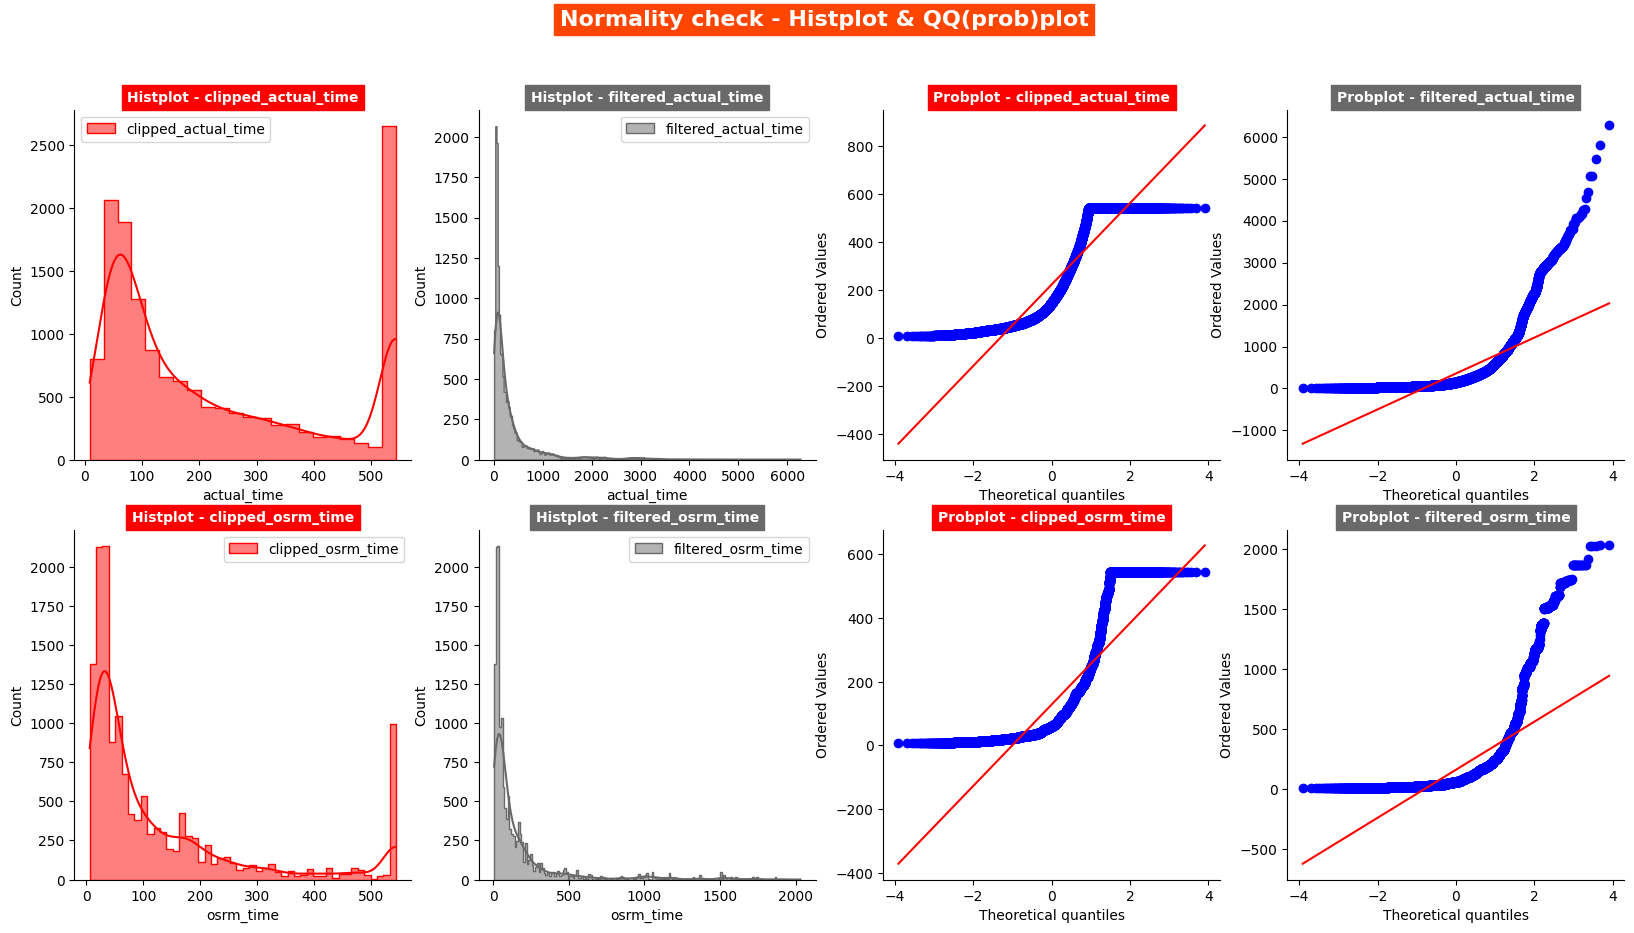

In [ ]:
normality_plots('clipped_actual_time','clipped_osrm_time','filtered_actual_time','filtered_osrm_time',actual_time,osrm_time,fil_actual_time,fil_osrm_time)

In [ ]:
col_names= ['clipped_actual_time','clipped_osrm_time','filtered_actual_time','filtered_osrm_time']
cols = [actual_time,osrm_time,fil_actual_time,fil_osrm_time]

for _ in zip(col_names,cols):
    normality = Normality_check(_[0],_[1])
    normality.shapiro_and_anderson()
    normality.boxcox_transformation()

Performing SHAPIRO & ANDERSON-DARLING TEST for clipped_actual_time column

Shapiro-Wilk Test
clipped_actual_time - Data is not Gaussian

Since Shapiro-Wilk test is sensitive, we go with Anderson-Darling Test
clipped_actual_time - Data does not follow a normal distribution.

--------------------------------------------------
Performing BOXCOX transformation on clipped_actual_time column
Performing SHAPIRO & ANDERSON-DARLING TEST for clipped_actual_time column

Shapiro-Wilk Test
clipped_actual_time - Data is not Gaussian

Since Shapiro-Wilk test is sensitive, we go with Anderson-Darling Test
clipped_actual_time - Data does not follow a normal distribution.

--------------------------------------------------
Performing SHAPIRO & ANDERSON-DARLING TEST for clipped_osrm_time column

Shapiro-Wilk Test
clipped_osrm_time - Data is not Gaussian

Since Shapiro-Wilk test is sensitive, we go with Anderson-Darling Test
clipped_osrm_time - Data does not follow a normal distribution.

----------------

In [ ]:
levene_test('clipped_actual_time','clipped_osrm_time',actual_time,osrm_time),
levene_test('filtered_actual_time','filtered_osrm_time',fil_actual_time,fil_osrm_time)

Performing Levene Test for clipped_actual_time & clipped_osrm_time
Does not have Homogenous (different) Variance

--------------------------------------------------

Performing Levene Test for filtered_actual_time & filtered_osrm_time
Does not have Homogenous (different) Variance

--------------------------------------------------



''

**Wilcoxon signed rank test:**

In [ ]:
## with clipped data

# H0 : aggregated actual time is same as aggregated osrm time
# Ha : aggregated actual time is more than the aggregated osrm time

alpha = 0.05  #testing at 95% confidence

test_stat , p_value = wilcoxon(actual_time,osrm_time,alternative='greater')

if p_value < alpha:
    print("Reject Null Hypothesis - The Aggregated Actual_time is More than the Aggregated OSRM_time")
else:
    print("Fail to Reject Null Hypothesis - The Aggregated Actual_time is same as the Aggregated OSRM_time")

Reject Null Hypothesis - The Aggregated Actual_time is More than the Aggregated OSRM_time


In [ ]:
## with filtered data

alpha = 0.05  #testing at 95% confidence

test_stat , p_value = wilcoxon(fil_actual_time,fil_osrm_time,alternative='greater')

if p_value < alpha:
    print("Reject Null Hypothesis - The Aggregated Actual_time is More than the Aggregated OSRM_time")
else:
    print("Fail to Reject Null Hypothesis - The Aggregated Actual_time is same as the Aggregated OSRM_time")

Reject Null Hypothesis - The Aggregated Actual_time is More than the Aggregated OSRM_time


In [ ]:
### MannWhitney u Rank test

test_cols = [('clipped_actual_time','clipped_osrm_time',actual_time,osrm_time),
       ('filtered_actual_time','filtered_osrm_time',fil_actual_time,fil_osrm_time)]

for _ in test_cols:
    mannwhitneyu_test(_[0],_[1],_[2],_[3])

Performing Non-parametric Test - MannWhitneyU for clipped_actual_time & clipped_osrm_time
Reject Null Hypothesis
There is a significant difference in the Mean values of clipped_actual_time and clipped_osrm_time

--------------------------------------------------

Performing Non-parametric Test - MannWhitneyU for filtered_actual_time & filtered_osrm_time
Reject Null Hypothesis
There is a significant difference in the Mean values of filtered_actual_time and filtered_osrm_time

--------------------------------------------------



**Insights:**

It is confirmed that There is a significant difference in the Mean values of Aggregated actual_time and Aggregated osrm_time through MannwhitneyU test.

Further, it is found that The Aggregated Actual_time is More than the Aggregated OSRM_time through Wilcoxon signed Rank test.

# **Actual_time aggregated value and Segment actual time aggregated value.**


In [ ]:
clipped_num_df[['actual_time','segment_actual_time']].describe().T

count        mean         std  min   25%    50%    75%  \
actual_time          14787.0  224.212575  185.922836  9.0  67.0  148.0  367.0   
segment_actual_time  14787.0  222.904641  185.796999  9.0  66.0  147.0  364.0   

                            max  
actual_time          543.285287  
segment_actual_time  543.285287

In [ ]:
filtered_num_df[['actual_time','segment_actual_time']].describe().T

count        mean         std  min   25%    50%    75%  \
actual_time          14787.0  356.306012  561.517936  9.0  67.0  148.0  367.0   
segment_actual_time  14787.0  353.059174  556.365911  9.0  66.0  147.0  364.0   

                        max  
actual_time          6265.0  
segment_actual_time  6230.0

In [ ]:
clipped_actual_time = clipped_num_df['actual_time']
clipped_segmented_actual_time = clipped_num_df['segment_actual_time']
filtered_actual_time = filtered_num_df['actual_time']
filtered_segmented_actual_time = filtered_num_df['segment_actual_time']

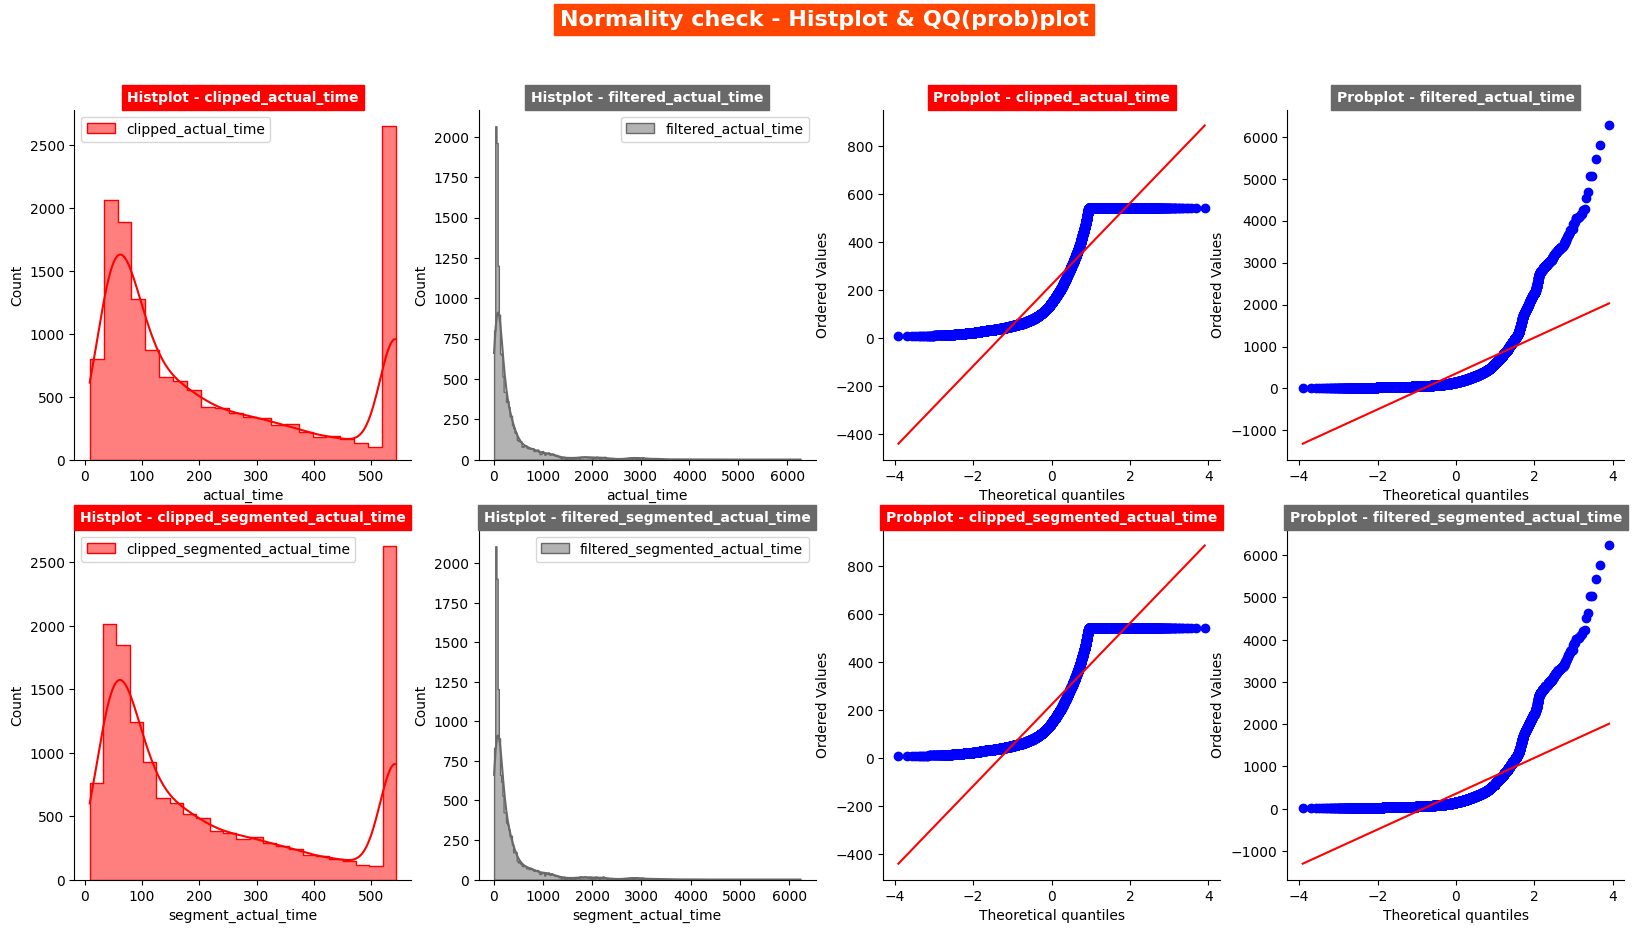

In [ ]:
normality_plots("clipped_actual_time","clipped_segmented_actual_time","filtered_actual_time","filtered_segmented_actual_time",
                clipped_actual_time,clipped_segmented_actual_time,filtered_actual_time,filtered_segmented_actual_time)


In [ ]:
col_names= ["clipped_actual_time","clipped_segmented_actual_time","filtered_actual_time","filtered_segmented_actual_time"]
cols = [clipped_actual_time,clipped_segmented_actual_time,filtered_actual_time,filtered_segmented_actual_time]

for _ in zip(col_names,cols):
    normality = Normality_check(_[0],_[1])
    normality.shapiro_and_anderson()
    normality.boxcox_transformation()

Performing SHAPIRO & ANDERSON-DARLING TEST for clipped_actual_time column

Shapiro-Wilk Test
clipped_actual_time - Data is not Gaussian

Since Shapiro-Wilk test is sensitive, we go with Anderson-Darling Test
clipped_actual_time - Data does not follow a normal distribution.

--------------------------------------------------
Performing BOXCOX transformation on clipped_actual_time column
Performing SHAPIRO & ANDERSON-DARLING TEST for clipped_actual_time column

Shapiro-Wilk Test
clipped_actual_time - Data is not Gaussian

Since Shapiro-Wilk test is sensitive, we go with Anderson-Darling Test
clipped_actual_time - Data does not follow a normal distribution.

--------------------------------------------------
Performing SHAPIRO & ANDERSON-DARLING TEST for clipped_segmented_actual_time column

Shapiro-Wilk Test
clipped_segmented_actual_time - Data is not Gaussian

Since Shapiro-Wilk test is sensitive, we go with Anderson-Darling Test
clipped_segmented_actual_time - Data does not follow a no

In [ ]:
levene_test("clipped_actual_time","clipped_segmented_actual_time",clipped_actual_time,clipped_segmented_actual_time),
levene_test("filtered_actual_time","filtered_segmented_actual_time",filtered_actual_time,filtered_segmented_actual_time)

Performing Levene Test for clipped_actual_time & clipped_segmented_actual_time
Have Homogenous (similar) variance

--------------------------------------------------

Performing Levene Test for filtered_actual_time & filtered_segmented_actual_time
Have Homogenous (similar) variance

--------------------------------------------------



''

In [ ]:
### MannWhitney u Rank test

test_cols = [("clipped_actual_time","clipped_segmented_actual_time",clipped_actual_time,clipped_segmented_actual_time),
       ("filtered_actual_time","filtered_segmented_actual_time",filtered_actual_time,filtered_segmented_actual_time)]

for _ in test_cols:
    mannwhitneyu_test(_[0],_[1],_[2],_[3])

Performing Non-parametric Test - MannWhitneyU for clipped_actual_time & clipped_segmented_actual_time
Failed to Reject Null Hypothesis - Accept Ho
There is NO significant difference in the Mean values of clipped_actual_time and clipped_segmented_actual_time

--------------------------------------------------

Performing Non-parametric Test - MannWhitneyU for filtered_actual_time & filtered_segmented_actual_time
Failed to Reject Null Hypothesis - Accept Ho
There is NO significant difference in the Mean values of filtered_actual_time and filtered_segmented_actual_time

--------------------------------------------------



**Insights:**

Even thought data is not gaussian , though it has similar variance (confirmed by Levene's test)

It is confirmed that There is NO significant difference in the Mean values of Aggregated actual_time and segmented_actual_time through MannWHitneyU test.

# **OSRM distance aggregated value and segment OSRM distance aggregated value.**

In [ ]:
clipped_num_df[['osrm_distance','segment_osrm_distance']].describe().T

count        mean         std     min       25%  \
osrm_distance          14787.0  144.551530  162.880432  9.0729  30.75690   
segment_osrm_distance  14787.0  150.959152  165.473077  9.0729  32.57885   

                           50%       75%         max  
osrm_distance          65.3028  206.6442  543.285287  
segment_osrm_distance  69.7842  216.5606  543.285287

In [ ]:
filtered_num_df[['osrm_distance','segment_osrm_distance']].describe().T

count        mean         std     min       25%  \
osrm_distance          14787.0  203.887411  370.565564  9.0729  30.75690   
segment_osrm_distance  14787.0  222.705466  416.846279  9.0729  32.57885   

                           50%       75%        max  
osrm_distance          65.3028  206.6442  2840.0810  
segment_osrm_distance  69.7842  216.5606  3523.6324

In [ ]:
clipped_osrm_distance = clipped_num_df['osrm_distance']
clipped_segmented_osrm_distance = clipped_num_df['segment_osrm_distance']
filtered_osrm_distance = filtered_num_df['osrm_distance']
filtered_segmented_osrm_distance = filtered_num_df['segment_osrm_distance']

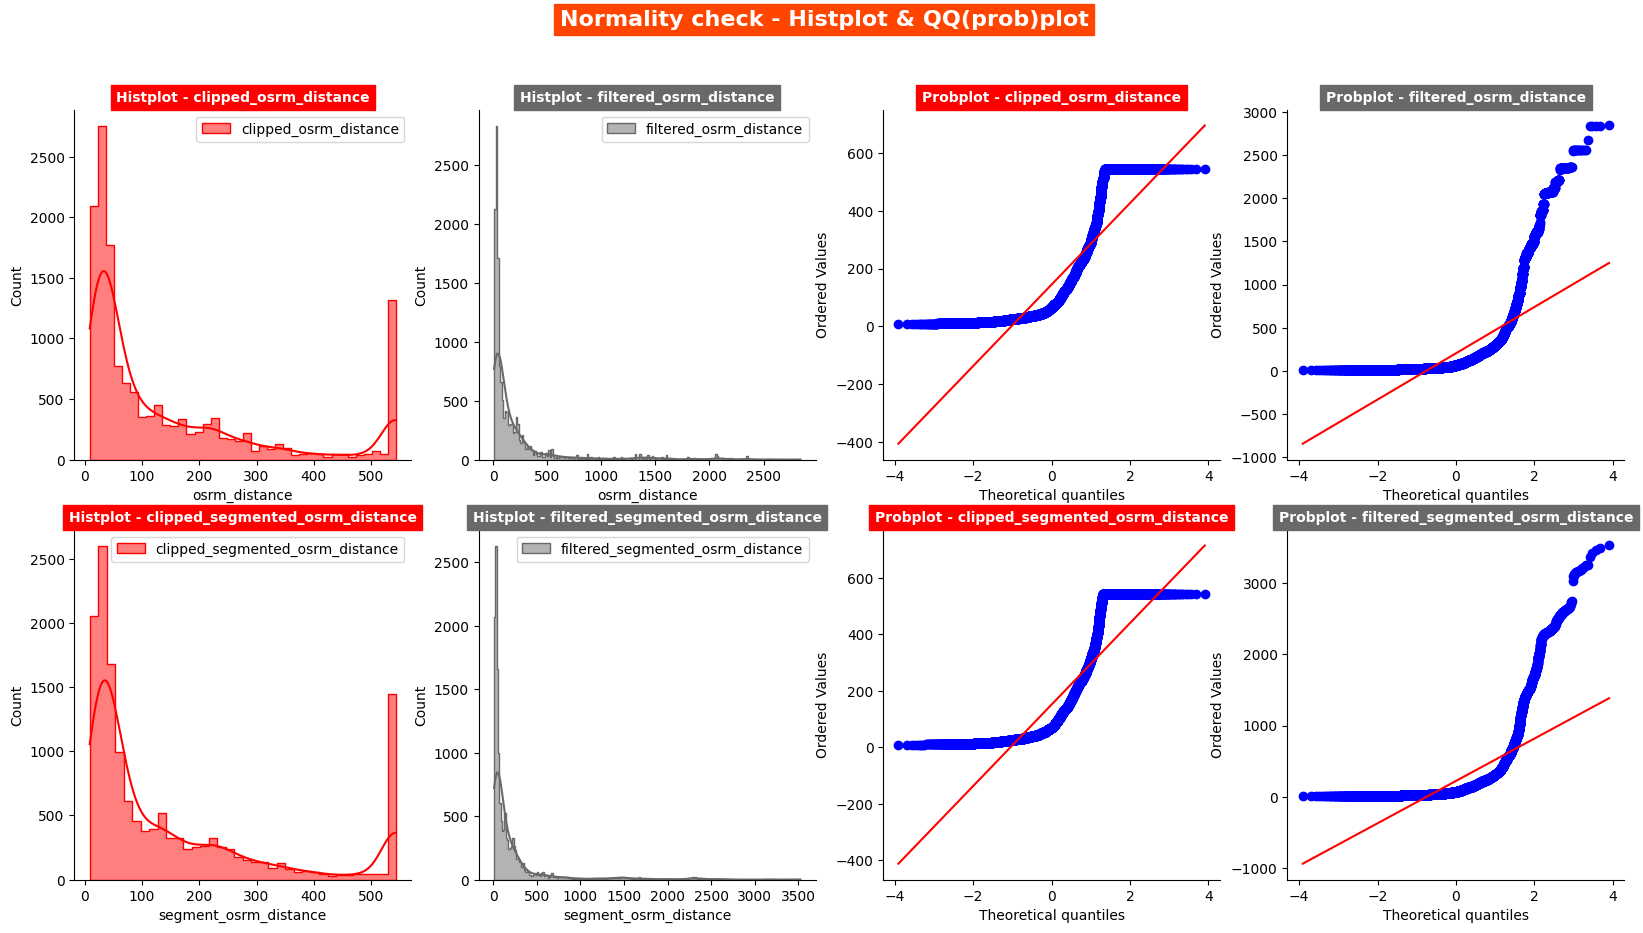

In [ ]:
normality_plots("clipped_osrm_distance","clipped_segmented_osrm_distance","filtered_osrm_distance","filtered_segmented_osrm_distance",
                clipped_osrm_distance,clipped_segmented_osrm_distance,filtered_osrm_distance,filtered_segmented_osrm_distance)


In [ ]:
col_names= ["clipped_osrm_distance","clipped_segmented_osrm_distance","filtered_osrm_distance","filtered_segmented_osrm_distance"]
cols = [clipped_osrm_distance,clipped_segmented_osrm_distance,filtered_osrm_distance,filtered_segmented_osrm_distance]

for _ in zip(col_names,cols):
    normality = Normality_check(_[0],_[1])
    normality.shapiro_and_anderson()
    normality.boxcox_transformation()

Performing SHAPIRO & ANDERSON-DARLING TEST for clipped_osrm_distance column

Shapiro-Wilk Test
clipped_osrm_distance - Data is not Gaussian

Since Shapiro-Wilk test is sensitive, we go with Anderson-Darling Test
clipped_osrm_distance - Data does not follow a normal distribution.

--------------------------------------------------
Performing BOXCOX transformation on clipped_osrm_distance column
Performing SHAPIRO & ANDERSON-DARLING TEST for clipped_osrm_distance column

Shapiro-Wilk Test
clipped_osrm_distance - Data is not Gaussian

Since Shapiro-Wilk test is sensitive, we go with Anderson-Darling Test
clipped_osrm_distance - Data does not follow a normal distribution.

--------------------------------------------------
Performing SHAPIRO & ANDERSON-DARLING TEST for clipped_segmented_osrm_distance column

Shapiro-Wilk Test
clipped_segmented_osrm_distance - Data is not Gaussian

Since Shapiro-Wilk test is sensitive, we go with Anderson-Darling Test
clipped_segmented_osrm_distance - Data 

In [ ]:
levene_test("clipped_osrm_distance","clipped_segmented_osrm_distance",clipped_osrm_distance,clipped_segmented_osrm_distance),
levene_test("filtered_osrm_distance","filtered_segmented_osrm_distance",filtered_osrm_distance,filtered_segmented_osrm_distance)

Performing Levene Test for clipped_osrm_distance & clipped_segmented_osrm_distance
Does not have Homogenous (different) Variance

--------------------------------------------------

Performing Levene Test for filtered_osrm_distance & filtered_segmented_osrm_distance
Does not have Homogenous (different) Variance

--------------------------------------------------



''

In [ ]:
### MannWhitney u Rank test

test_cols = [("clipped_osrm_distance","clipped_segmented_osrm_distance",clipped_osrm_distance,clipped_segmented_osrm_distance),
       ("filtered_osrm_distance","filtered_segmented_osrm_distance",filtered_osrm_distance,filtered_segmented_osrm_distance)]

for _ in test_cols:
    mannwhitneyu_test(_[0],_[1],_[2],_[3])

Performing Non-parametric Test - MannWhitneyU for clipped_osrm_distance & clipped_segmented_osrm_distance
Reject Null Hypothesis
There is a significant difference in the Mean values of clipped_osrm_distance and clipped_segmented_osrm_distance

--------------------------------------------------

Performing Non-parametric Test - MannWhitneyU for filtered_osrm_distance & filtered_segmented_osrm_distance
Reject Null Hypothesis
There is a significant difference in the Mean values of filtered_osrm_distance and filtered_segmented_osrm_distance

--------------------------------------------------



# Insights:

It is confirmed that There is a significant difference in the Mean values of osrm_distance and segmented_osrm_distance aggregated through MannwhitneyU test.

# **OSRM time aggregated value and segment OSRM time aggregated value.**

In [ ]:
clipped_num_df[['osrm_time','segment_osrm_time']].describe().T

count        mean         std  min   25%   50%    75%  \
osrm_time          14787.0  128.190911  150.301265  6.0  29.0  60.0  168.0   
segment_osrm_time  14787.0  136.843817  155.422252  6.0  30.0  65.0  184.0   

                          max  
osrm_time          543.285287  
segment_osrm_time  543.285287

In [ ]:
filtered_num_df[['osrm_time','segment_osrm_time']].describe().T

count        mean         std  min   25%   50%    75%  \
osrm_time          14787.0  160.990938  271.459495  6.0  29.0  60.0  168.0   
segment_osrm_time  14787.0  180.511598  314.679279  6.0  30.0  65.0  184.0   

                      max  
osrm_time          2032.0  
segment_osrm_time  2564.0

In [ ]:
clipped_osrm_time = clipped_num_df['osrm_time']
clipped_segmented_osrm_time = clipped_num_df['segment_osrm_time']
filtered_osrm_time = filtered_num_df['osrm_time']
filtered_segmented_osrm_time = filtered_num_df['segment_osrm_time']

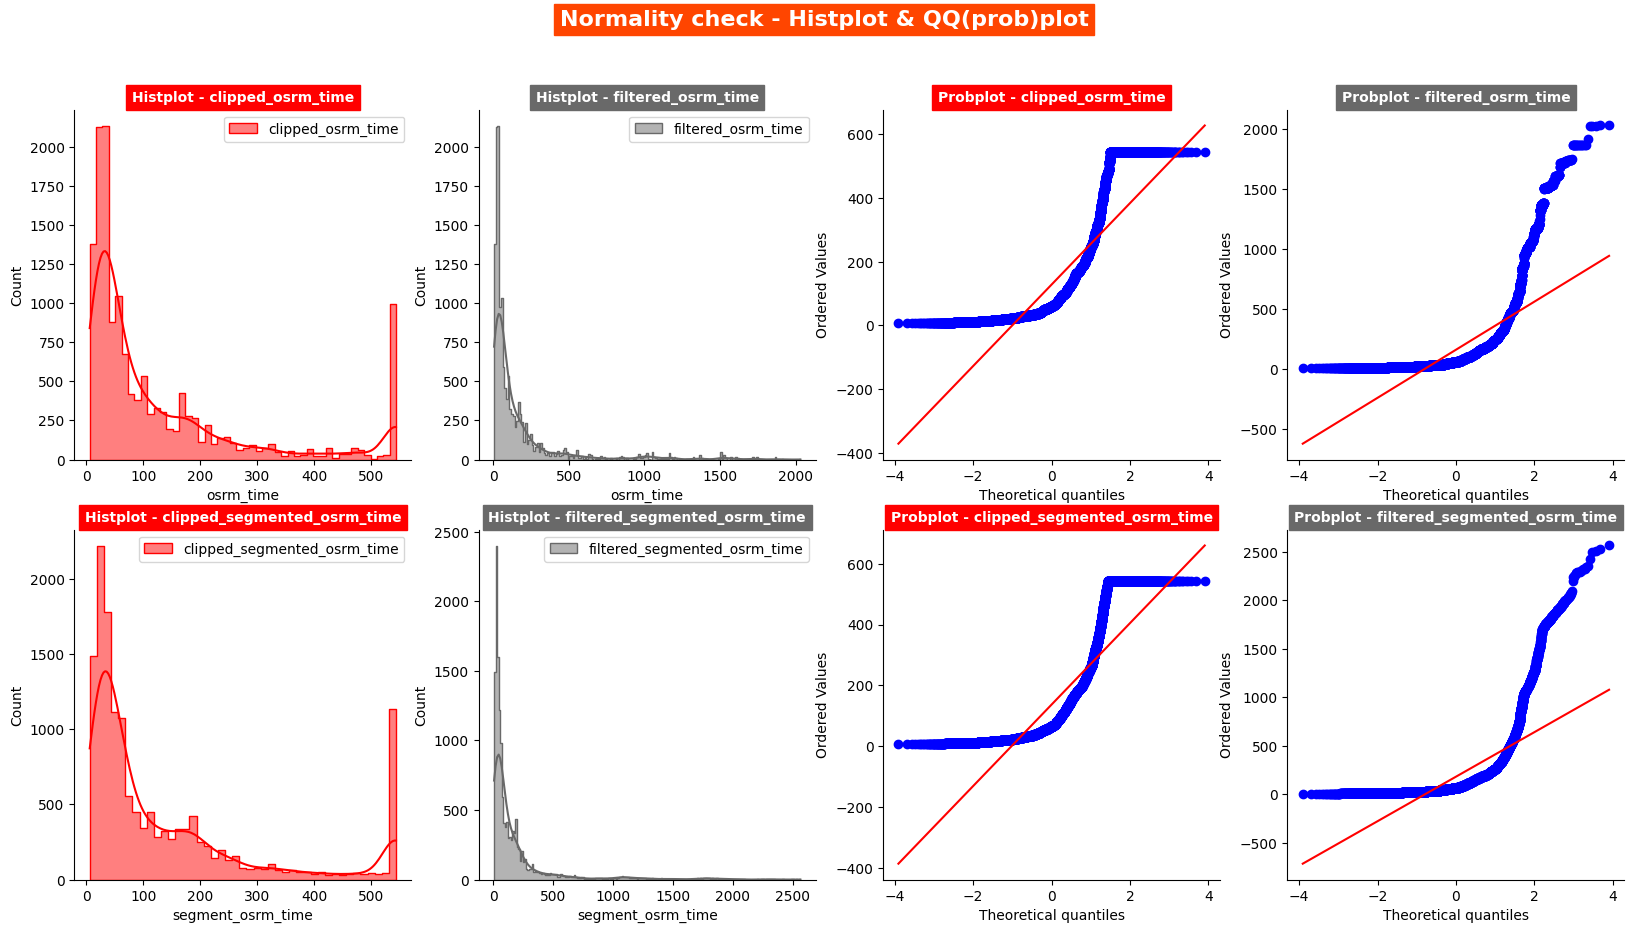

In [ ]:
normality_plots("clipped_osrm_time","clipped_segmented_osrm_time","filtered_osrm_time","filtered_segmented_osrm_time",
                clipped_osrm_time,clipped_segmented_osrm_time,filtered_osrm_time,filtered_segmented_osrm_time)

In [ ]:
col_names= ["clipped_osrm_time","clipped_segmented_osrm_time","filtered_osrm_time","filtered_segmented_osrm_time"]
cols = [clipped_osrm_time,clipped_segmented_osrm_time,filtered_osrm_time,filtered_segmented_osrm_time]

for _ in zip(col_names,cols):
    normality = Normality_check(_[0],_[1])
    normality.shapiro_and_anderson()
    normality.boxcox_transformation()

Performing SHAPIRO & ANDERSON-DARLING TEST for clipped_osrm_time column

Shapiro-Wilk Test
clipped_osrm_time - Data is not Gaussian

Since Shapiro-Wilk test is sensitive, we go with Anderson-Darling Test
clipped_osrm_time - Data does not follow a normal distribution.

--------------------------------------------------
Performing BOXCOX transformation on clipped_osrm_time column
Performing SHAPIRO & ANDERSON-DARLING TEST for clipped_osrm_time column

Shapiro-Wilk Test
clipped_osrm_time - Data is not Gaussian

Since Shapiro-Wilk test is sensitive, we go with Anderson-Darling Test
clipped_osrm_time - Data does not follow a normal distribution.

--------------------------------------------------
Performing SHAPIRO & ANDERSON-DARLING TEST for clipped_segmented_osrm_time column

Shapiro-Wilk Test
clipped_segmented_osrm_time - Data is not Gaussian

Since Shapiro-Wilk test is sensitive, we go with Anderson-Darling Test
clipped_segmented_osrm_time - Data does not follow a normal distribution.



In [ ]:
levene_test("clipped_osrm_time","clipped_segmented_osrm_time",clipped_osrm_time,clipped_segmented_osrm_time),
levene_test("filtered_osrm_time","filtered_segmented_osrm_time",filtered_osrm_time,filtered_segmented_osrm_time)

Performing Levene Test for clipped_osrm_time & clipped_segmented_osrm_time
Does not have Homogenous (different) Variance

--------------------------------------------------

Performing Levene Test for filtered_osrm_time & filtered_segmented_osrm_time
Does not have Homogenous (different) Variance

--------------------------------------------------



''

In [ ]:
### MannWhitney u Rank test

test_cols = [("clipped_osrm_time","clipped_segmented_osrm_time",clipped_osrm_time,clipped_segmented_osrm_time),
       ("filtered_osrm_time","filtered_segmented_osrm_time",filtered_osrm_time,filtered_segmented_osrm_time)]

for _ in test_cols:
    mannwhitneyu_test(_[0],_[1],_[2],_[3])

Performing Non-parametric Test - MannWhitneyU for clipped_osrm_time & clipped_segmented_osrm_time
Reject Null Hypothesis
There is a significant difference in the Mean values of clipped_osrm_time and clipped_segmented_osrm_time

--------------------------------------------------

Performing Non-parametric Test - MannWhitneyU for filtered_osrm_time & filtered_segmented_osrm_time
Reject Null Hypothesis
There is a significant difference in the Mean values of filtered_osrm_time and filtered_segmented_osrm_time

--------------------------------------------------



**Insights:**
It is confirmed that There is a significant difference in the Mean values of Aggregated osrm_time and segmented_osrm_time aggregated through MannwhitneyU test.

In [ ]:
# To find the busiest corridor, we'll look at the most common combinations of source and destination states
corridor_counts = trip_df.groupby(['source_state', 'destination_state']).size().reset_index(name='count')
busiest_corridor = corridor_counts.sort_values(by='count', ascending=False).head(1)

# Average distance and time taken for the busiest corridor
busiest_corridor_details = busiest_corridor.merge(trip_df, on=['source_state', 'destination_state'])
average_distance = busiest_corridor_details['actual_distance_to_destination'].mean()
average_time = busiest_corridor_details['od_time_diff_hour'].mean()

print("Busiest corridor:  ")
display(busiest_corridor)
print("Average distance:  ",average_distance)
print("Average time (in hours):  ",average_time)

Busiest corridor:  


source_state destination_state  count
85  Maharashtra       Maharashtra   2458

Average distance:   74.85284867694604
Average time (in hours):   5.346577921457034


# **Buisness Insights**


Based on EDA:

The Timeframe of the data is '2018-09-12' to '2018-10-08' i.e(26 days).

88% of the trips are from October Month & remaining are from November

The entire data is heavily right skewed

Almost all the features are heavy positively correleated with each other & which is intutive as well.

Start & End dates of the months have less percent of trips compare to mid of the month.

Most orders come mid-month. That means customers usually make more orders in the mid of the month.

**Route type:**

The analysis reveals that a higher proportion of shipments are routed through Full Truck Load (FTL) as opposed to carting. This has important implications for the efficiency and speed of the delivery process.

**Geographical Focus:**

Understanding the busiest routes and distances can help in optimizing logistics operations, improving transportation efficiency, and potentially reducing costs.

**State:** The states of Haryana, Maharashtra, and Karnataka are not only busy source states but also emerge as the busiest source states, indicating a high demand or significant business activities originating from these regions.

**source city:** Gurgaon, Bangalore, and Bhiwandi are identified as the busiest source cities, suggesting that these cities play a crucial role in contributing to the overall business operations or transportation activities.

**Destination city:** Gurgaon, Bangalore, and Hyderabad are identified as the busiest destination cities, underscoring their significance in terms of business activities or population movement.

**Busiest corridor:** Overall, the busiest corridor is Mumbai_Maharashtra and Bangalore_Karnataka which has the maximum trips.

Average distance: 74.852844 kms
Average time (in hours): 5.346577921457034


**Delivery Time & Distance Accuracy:**


**OSRM Time vs. Actual Time:**

The difference between the mean values of estimated delivery time and actual delivery time suggests that there may be variations or delays in the actual delivery process compared to the initial estimates.
The fact that the mean of OSRM time is less than the mean of actual delivery time indicates that the estimated times provided by the OSRM (Open Source Routing Machine) service tend to be optimistic.


**OSRM Distance vs. Actual Distance:**

The mean of OSRM distance being greater than the mean of actual distance to the destination suggests that the OSRM might overestimate the distances. This could impact route planning and fuel efficiency calculations.


**Segment-wise time Analysis:**

The equality in the mean values of actual time and segment actual time suggests that the time measurements are consistent across different segments of the delivery process

**Segment-wise distance Analysis:**

The mean of segment OSRM distance being greater than the mean of OSRM distance implies that the OSRM might provide more conservative estimates for distance within individual segments.

**Further look into :**

As its depicted from the analysis that there is absolutely no trip from 4th- 11th day of the month, The reason for that can be figured out and catered to receive the orders in the these dates as well.

More ways to promote FTL route handling system can be implemented to increase this percentage



#**Business Recommendations**



1. **Route Optimization**

	•	Focus on Karnataka: Since the busiest state route is in Karnataka, optimizing the transport network here is key. Implement route optimization algorithms and real-time traffic monitoring to improve efficiency and reduce congestion.

	•	Target Key Cities: Gurgaon (source) and Bangalore (destination) handle the highest traffic. Design city-specific strategies to manage and improve transportation in these hubs.

2. **Operational Efficiency**

	•	Set Realistic Delivery Times: The average OSRM (Open Source Routing Machine) time is lower than the actual delivery time. Use this gap to set more accurate delivery time expectations for customers.

	•	Improve Distance Accuracy: The OSRM distance is higher than the actual distance. Adjust these estimates to improve logistics planning and cost control.

	•	Segment-Specific Optimization: Segment-level OSRM distances are even greater. Combine this with the actual travel data to refine segment-specific route planning.

	•	Forecasting for Better Planning: Use advanced demand forecasting to predict peak times and optimize vehicle deployment, ensuring better resource management during busy hours.

3. **Customer Satisfaction**

	•	Better Estimates = Happier Customers: Improving the accuracy of delivery time and distance estimates can directly boost customer trust and satisfaction.

	•	Fast FTL Deliveries: Full Truck Load (FTL) shipments help deliver faster. Emphasizing FTL helps meet customer expectations for quick and timely deliveries.

	•	Customer Profiling by State: Focus on customer behavior in Maharashtra, Karnataka, Haryana, Tamil Nadu, and Uttar Pradesh—these states generate the most orders. Understanding why will help improve customer service and delivery experience.

4. **Cost Optimization**

	•	Use Data to Save Money: Analyzing the gap between estimated and actual times/distances helps in fine-tuning logistics. This leads to better resource usage and reduced costs.

	•	Plan Smarter: Accurate data helps allocate trucks, manpower, and fuel more effectively, contributing to cost savings.

5. **Strategic Decision-Making**

	•	FTL Preference Insight: Choosing FTL over smaller shipments is a strategic move. Regularly evaluate this choice to ensure it aligns with changing business needs and goals.

6. **Stakeholder Collaboration**

	•	Work Together for Better Results: Partner with government bodies, transport providers, and local communities to implement strategies that ease traffic and improve logistics in high-traffic zones like Gurgaon and Bangalore.
